## Business Objective

An E Commerce company or DTH (you can choose either of these two domains) provider is
facing a lot of competition in the current market and it has become a challenge to retain the
existing customers in the current situation. Hence, the company wants to develop a model
through which they can do churn prediction of the accounts and provide segmented offers to the
potential churners. In this company, account churn is a major thing because 1 account can have
multiple customers. hence by losing one account the company might be losing more than one
customer.

You have been assigned to develop a churn prediction model for this company and provide
business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because
your recommendation will go through the revenue assurance team. If they find that you are
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going
to approve your recommendation.

Hence be very careful while providing campaign recommendation.

### Data Dictionary
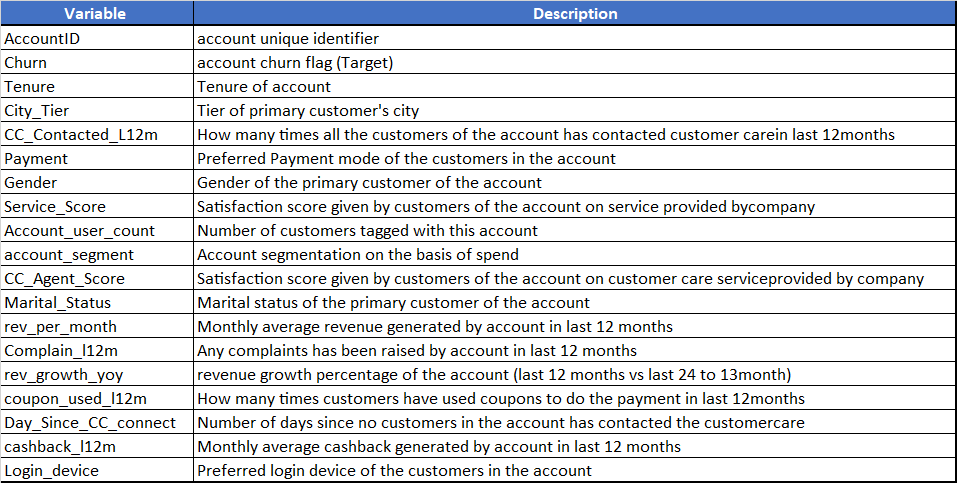

In [626]:
#Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

from scipy import stats

from sklearn.preprocessing import MinMaxScaler

from   scipy.stats        import    chi2_contingency

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.model_selection import train_test_split, GridSearchCV

from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from collections import Counter
from imblearn.over_sampling import SMOTE 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import statsmodels.formula.api as SM
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

### Reading Data and Preliminary Analysis

In [627]:
df = pd.read_excel('Customer Churn Data Original.xlsx')

In [628]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [629]:
df.shape

(11260, 19)

In [630]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

<AxesSubplot:>

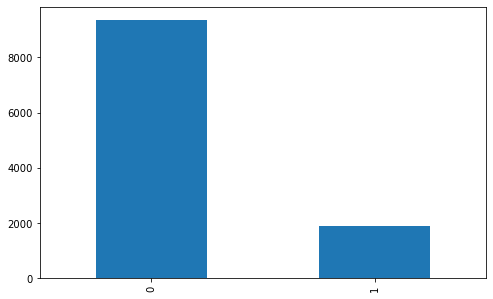

In [631]:
df['Churn'].value_counts().plot(kind='bar',figsize=(8,5))

In [632]:
df['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [646]:
df.describe(include='all').round(2).T

count  unique         top    freq     mean  \
AccountID                11260.0     NaN         NaN     NaN  25629.5   
Churn                    11260.0     NaN         NaN     NaN     0.17   
Tenure                   11158.0    38.0         1.0  1351.0      NaN   
City_Tier                11148.0     NaN         NaN     NaN     1.65   
CC_Contacted_LY          11158.0     NaN         NaN     NaN    17.87   
Payment                    11151       5  Debit Card    4587      NaN   
Gender                     11152       4        Male    6328      NaN   
Service_Score            11162.0     NaN         NaN     NaN      2.9   
Account_user_count       11148.0     7.0         4.0  4569.0      NaN   
account_segment            11163       7       Super    4062      NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN     3.07   
Marital_Status             11048       3     Married    5860      NaN   
rev_per_month            11158.0    59.0         3.0  1746.0      NaN   
Complain_ly              10903.0     NaN         NaN     NaN     0.29   
rev_growth_yoy           11260.0    20.0        14.0  1524.0      NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0      NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0      NaN   
cashback                 10789.0  5693.0      155.62    10.0      NaN   
Login_device               11039       3      Mobile    7482      NaN   

                             std      min       25%      50%       75%  \
AccountID                3250.63  20000.0  22814.75  25629.5  28444.25   
Churn                       0.37      0.0       0.0      0.0       0.0   
Tenure                       NaN      NaN       NaN      NaN       NaN   
City_Tier                   0.92      1.0       1.0      1.0       3.0   
CC_Contacted_LY             8.85      4.0      11.0     16.0      23.0   
Payment                      NaN      NaN       NaN      NaN       NaN   
Gender                       NaN      NaN       NaN      NaN       NaN   
Service_Score               0.73      0.0       2.0      3.0       3.0   
Account_user_count           NaN      NaN       NaN      NaN       NaN   
account_segment              NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score              1.38      1.0       2.0      3.0       4.0   
Marital_Status               NaN      NaN       NaN      NaN       NaN   
rev_per_month                NaN      NaN       NaN      NaN       NaN   
Complain_ly                 0.45      0.0       0.0      0.0       1.0   
rev_growth_yoy               NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment      NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect         NaN      NaN       NaN      NaN       NaN   
cashback                     NaN      NaN       NaN      NaN       NaN   
Login_device                 NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

In [647]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Treating Bad Data

##### Tenure Variable

In [648]:
df["Tenure"].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [649]:
df['Tenure'] = df['Tenure'].replace('#',np.NaN)

In [650]:
df["Tenure"].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

##### City_Tier Variable

In [651]:
df["City_Tier"].unique()

array([ 3.,  1., nan,  2.])

In [652]:
df["City_Tier"].value_counts(dropna=False)

1.0    7263
3.0    3405
2.0     480
NaN     112
Name: City_Tier, dtype: int64

##### CC_Contacted_LY Variable

In [653]:
df["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

##### Payment Variable

In [654]:
df["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [655]:
df["Payment"].value_counts(dropna=False)

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
NaN                  109
Name: Payment, dtype: int64

##### Gender Variable

In [656]:
df["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [657]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [658]:
df["Gender"].value_counts(dropna=False)

Male      6704
Female    4448
NaN        108
Name: Gender, dtype: int64

##### Service_Score

In [659]:
df["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [660]:
df.Service_Score.value_counts(dropna=False)

3.0    5490
2.0    3251
4.0    2331
NaN      98
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

##### Account_user_count

In [661]:
df["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [662]:
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)

In [663]:
df["Account_user_count"].value_counts(dropna=False)

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
NaN     444
6.0     315
Name: Account_user_count, dtype: int64

##### account_segment Variable

In [664]:
df["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [665]:
df["account_segment"] = df["account_segment"].replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [666]:
df["account_segment"].value_counts(dropna=False)

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
NaN               97
Name: account_segment, dtype: int64

##### CC_Agent_Score Variable

In [667]:
df["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [668]:
df["CC_Agent_Score"].value_counts(dropna=False)

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
NaN     116
Name: CC_Agent_Score, dtype: int64

##### Marital_Status Variable

In [669]:
df["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [670]:
df["Marital_Status"].value_counts(dropna=False)

Married     5860
Single      3520
Divorced    1668
NaN          212
Name: Marital_Status, dtype: int64

##### rev_per_month Variable

In [671]:
df["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [672]:
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)

In [673]:
df["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

##### Complain_ly Variable

In [674]:
df["Complain_ly"].unique()

array([ 1.,  0., nan])

In [675]:
df["Complain_ly"].value_counts(dropna=False)

0.0    7792
1.0    3111
NaN     357
Name: Complain_ly, dtype: int64

##### rev_growth_yoy Variable

In [676]:
df["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [677]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)

In [678]:
df["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

##### coupon_used_for_payment Variable

In [679]:
df["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [680]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN).replace('$',np.NaN).replace('*',np.NaN)

In [681]:
df["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

##### Day_Since_CC_connect Variable

In [682]:
df["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [683]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)

In [684]:
df["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

##### cashback Variable

In [685]:
df["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [686]:
df['cashback'] = df['cashback'].replace('$',np.NaN)

In [687]:
df["cashback"].unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

##### Login_device Variable

In [688]:
df["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [689]:
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)

In [690]:
df["Login_device"].value_counts(dropna=False)

Mobile      7482
Computer    3018
NaN          760
Name: Login_device, dtype: int64

In [691]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [693]:
df.describe(include = 'object').T

count unique           top  freq
Payment          11151      5    Debit Card  4587
Gender           11152      2          Male  6704
account_segment  11163      5  Regular Plus  4124
Marital_Status   11048      3       Married  5860
Login_device     10500      2        Mobile  7482

### Missing Value Treatment

In [694]:
#Percentage of Null Values
round((df.isnull().sum().sort_values(ascending = False)/df.index.size ) * 100, 2)

rev_per_month              7.02
Login_device               6.75
cashback                   4.20
Account_user_count         3.94
Day_Since_CC_connect       3.18
Complain_ly                3.17
Tenure                     1.94
Marital_Status             1.88
CC_Agent_Score             1.03
City_Tier                  0.99
Payment                    0.97
Gender                     0.96
CC_Contacted_LY            0.91
Service_Score              0.87
account_segment            0.86
coupon_used_for_payment    0.03
rev_growth_yoy             0.03
Churn                      0.00
AccountID                  0.00
dtype: float64

In [695]:
print("\nTotal number of nulls in all predictor fields:", (df.isnull().sum().sum()))


Total number of nulls in all predictor fields: 4361


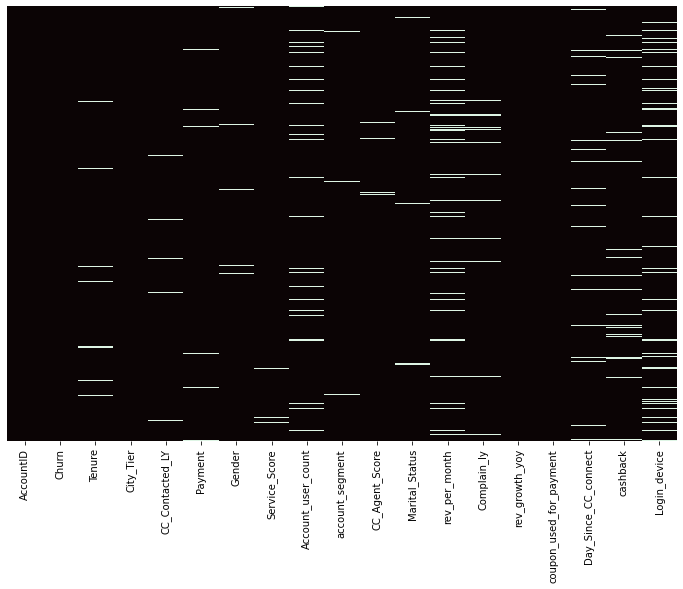

In [696]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'mako', yticklabels = False)
plt.show()

#### Missing Value Treatment: Numerical Columns

In [697]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [698]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [699]:
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())

In [700]:
df['rev_per_month'] = df['rev_per_month'].fillna(df['rev_per_month'].median())

In [701]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [702]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())

In [703]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())

In [704]:
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [705]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

#### Missing Value Treatment: Categorical Columns

In [706]:
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].median())

In [707]:
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])

In [708]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [709]:
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mode()[0])

In [710]:
df['Account_user_count'] = df['Account_user_count'].fillna(df['Account_user_count'].median())

In [711]:
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [712]:
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])

In [713]:
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [714]:
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])

In [715]:
df['Login_device'] = df['Login_device'].fillna(df['Login_device'].mode()[0])

In [716]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [717]:
df.head()

AccountID  Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1     4.0        3.0              6.0   Debit Card  Female   
1      20001      1     0.0        1.0              8.0          UPI    Male   
2      20002      1     0.0        1.0             30.0   Debit Card    Male   
3      20003      1     0.0        3.0             15.0   Debit Card    Male   
4      20004      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0    165.25       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

### Variable Removal

In [718]:
df = df.drop(["AccountID"], axis=1)
print('We have removed the AccountID column before further analysis as the variable does not seem to contribute in accurate inferences and business insights')

We have removed the AccountID column before further analysis as the variable does not seem to contribute in accurate inferences and business insights


In [719]:
df.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                      1.0                   5.0    159.93       Mobile  
1                      0.0                   0.0    120.90       Mobile  
2                      0.0                   3.0    165.25       Mobile  
3                      0.0                   3.0    134.07       Mobile  
4                      1.0                   3.0    129.60       Mobile

In [720]:
df.shape

(11260, 18)

In [721]:
df_num = df.drop(['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score','Marital_Status', 'Complain_ly', 'Login_device'], axis=1)

In [722]:
df_num.head()

Tenure  CC_Contacted_LY  rev_per_month  rev_growth_yoy  \
0     4.0              6.0            9.0            11.0   
1     0.0              8.0            7.0            15.0   
2     0.0             30.0            6.0            14.0   
3     0.0             15.0            8.0            23.0   
4     0.0             12.0            3.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  
0                      1.0                   5.0    159.93  
1                      0.0                   0.0    120.90  
2                      0.0                   3.0    165.25  
3                      0.0                   3.0    134.07  
4                      1.0                   3.0    129.60

In [723]:
df_cat = df.drop(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback'], axis=1)

In [724]:
df_cat.head()

Churn  City_Tier      Payment  Gender  Service_Score  Account_user_count  \
0      1        3.0   Debit Card  Female            3.0                 3.0   
1      1        1.0          UPI    Male            3.0                 4.0   
2      1        1.0   Debit Card    Male            2.0                 4.0   
3      1        3.0   Debit Card    Male            2.0                 4.0   
4      1        1.0  Credit Card    Male            2.0                 3.0   

  account_segment  CC_Agent_Score Marital_Status  Complain_ly Login_device  
0           Super             2.0         Single          1.0       Mobile  
1    Regular Plus             3.0         Single          1.0       Mobile  
2    Regular Plus             3.0         Single          1.0       Mobile  
3           Super             5.0         Single          0.0       Mobile  
4    Regular Plus             5.0         Single          0.0       Mobile

### Univariate Analysis

In [725]:
df_plots = df_num


def univariate(col):
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
    
    plt.suptitle('Univariate Analysis of ' +col, fontsize = 15)
    
    sns.histplot(df_plots[col], kde = True, ax = axs[0], color = 'purple')
    sns.boxplot(df_plots[col], ax = axs[1], notch = True)
    
    plt.tight_layout()

In [726]:
unilist = list(df_plots.columns.values)

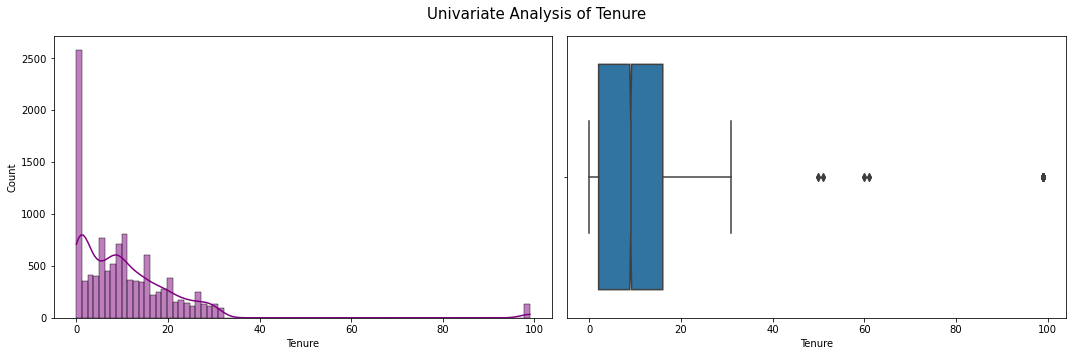

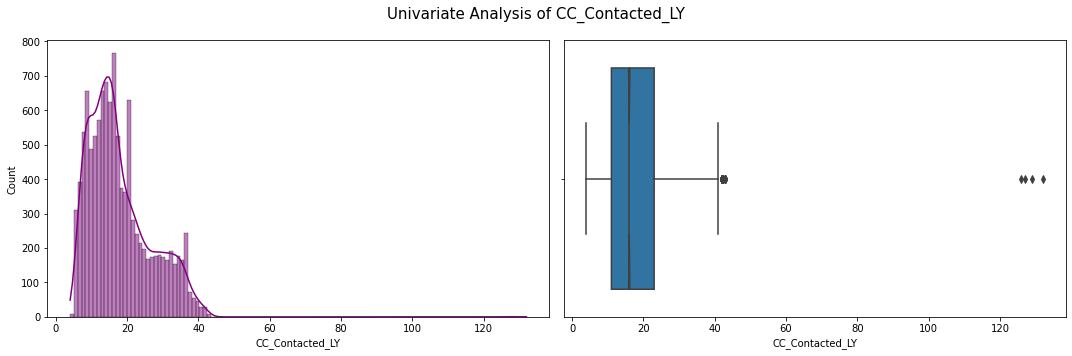

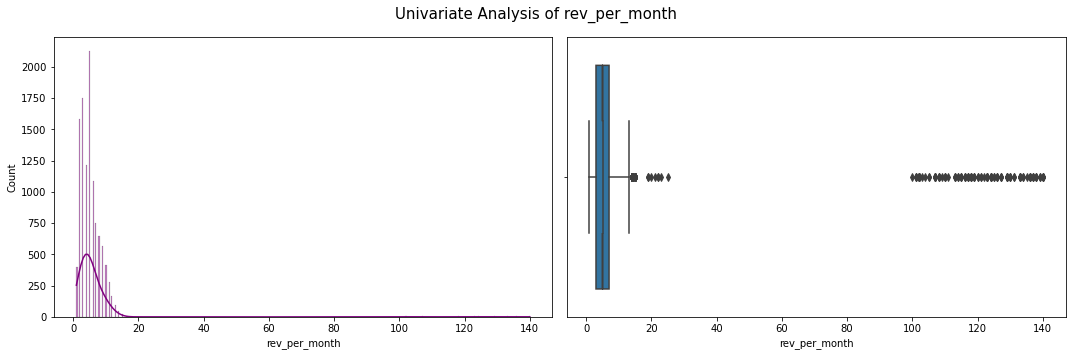

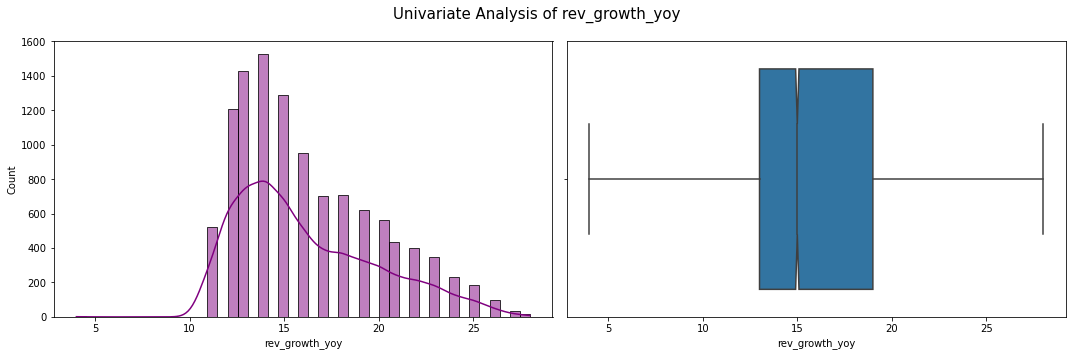

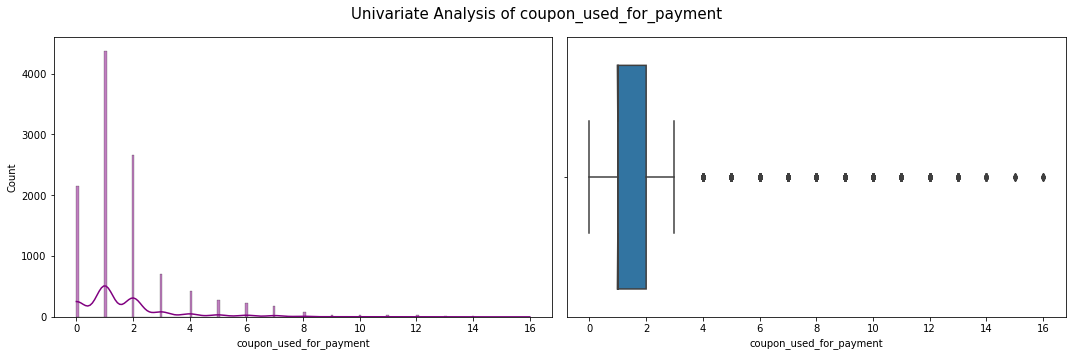

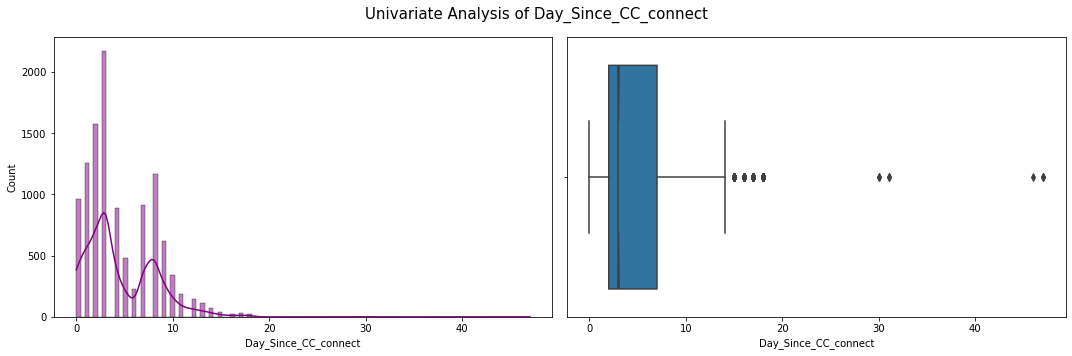

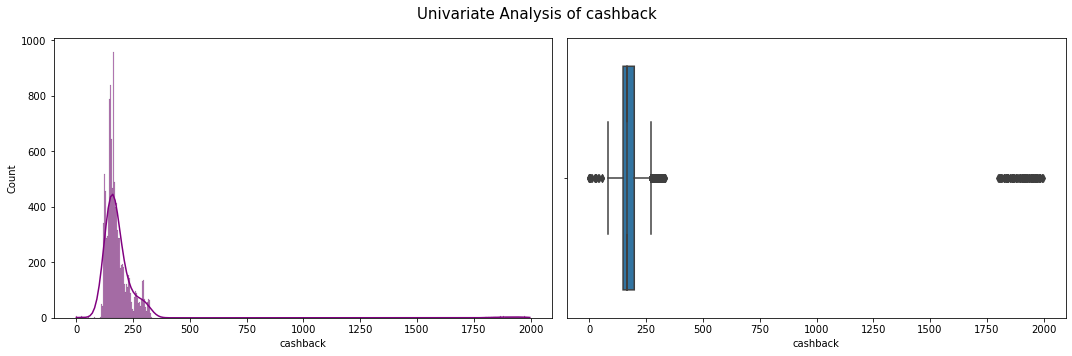

In [727]:
for i in unilist:
    univariate(i)

In [728]:
print('Data Skewness:')
pd.DataFrame(data = [df.skew()], index = ['Skewness']).T.round(2)

Data Skewness:


Skewness
Churn                        1.77
Tenure                       3.94
City_Tier                    0.75
CC_Contacted_LY              1.43
Service_Score                0.00
Account_user_count          -0.43
CC_Agent_Score              -0.14
rev_per_month                9.44
Complain_ly                  1.00
rev_growth_yoy               0.75
coupon_used_for_payment      2.58
Day_Since_CC_connect         1.32
cashback                     8.97

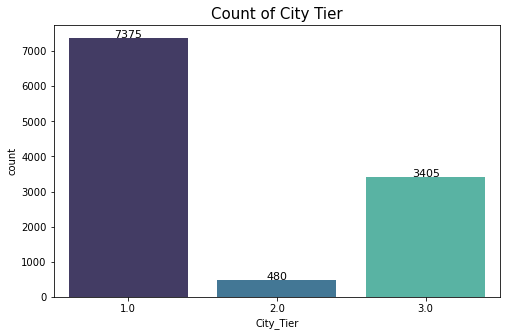

In [729]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['City_Tier'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Count of City Tier', fontsize=15);

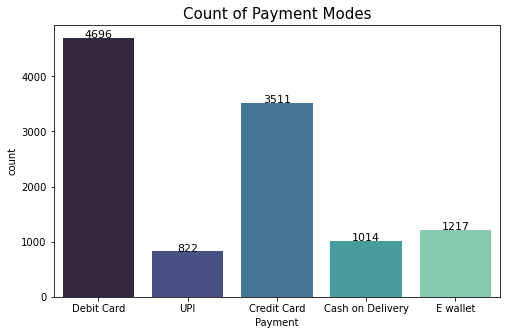

In [730]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Payment'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Count of Payment Modes', fontsize=15);

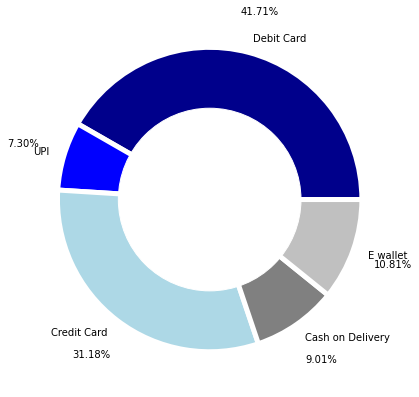

In [731]:
Debit_Card = df.Payment.value_counts()['Debit Card']
UPI = df.Payment.value_counts()['UPI']
Credit_Card = df.Payment.value_counts()['Credit Card']
COD = df.Payment.value_counts()['Cash on Delivery']
E_wallet = df.Payment.value_counts()['E wallet']

names = ['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
size = [Debit_Card, UPI, Credit_Card, COD, E_wallet]

plt.pie(size, labels = names, colors=['darkblue', 'blue', 'lightblue','grey', 'silver'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':5, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

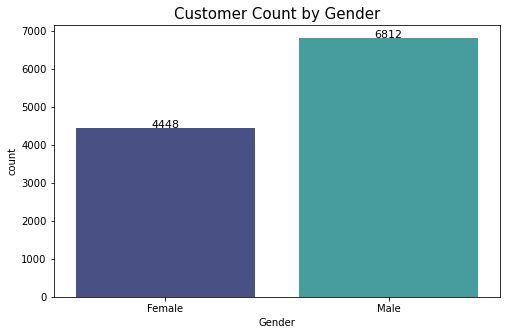

In [732]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Gender'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Customer Count by Gender', fontsize=15);

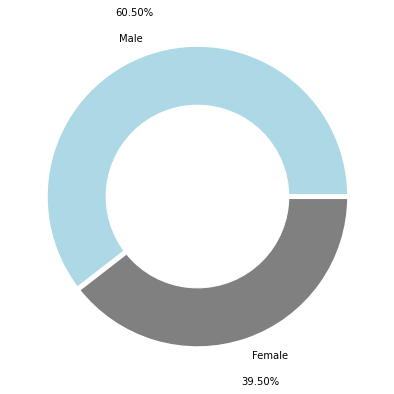

In [733]:
Male = df.Gender.value_counts()['Male']
Female = df.Gender.value_counts()['Female']

names = ['Male', 'Female']
size = [Male, Female]

plt.pie(size, labels = names, colors=['lightblue','grey'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':5, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

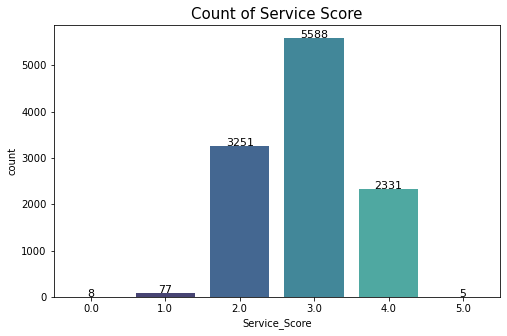

In [734]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Service_Score'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Count of Service Score', fontsize=15);

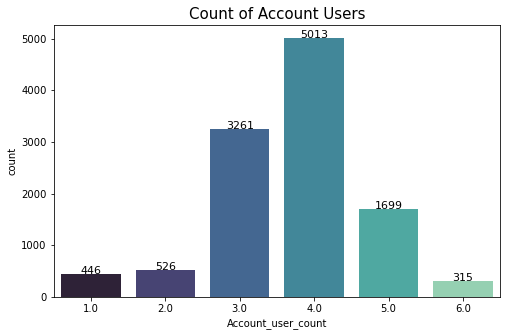

In [735]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Account_user_count'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt
   
plt.title('Count of Account Users', fontsize=15);

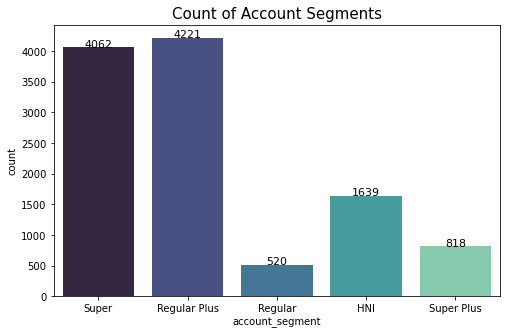

In [736]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['account_segment'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Count of Account Segments', fontsize=15);

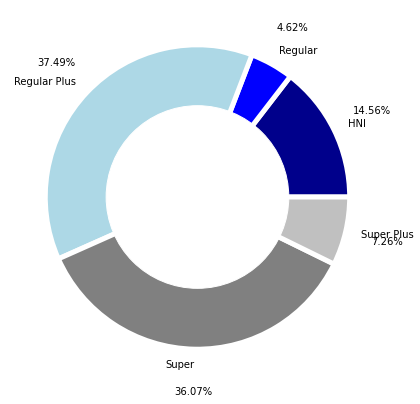

In [737]:
HNI = df.account_segment.value_counts()['HNI']
Regular = df.account_segment.value_counts()['Regular']
Regular_Plus = df.account_segment.value_counts()['Regular Plus']
Super = df.account_segment.value_counts()['Super']
Super_Plus = df.account_segment.value_counts()['Super Plus']

names = ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
size = [HNI, Regular, Regular_Plus, Super, Super_Plus]

plt.pie(size, labels = names, colors=['darkblue', 'blue', 'lightblue','grey', 'silver'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':5, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

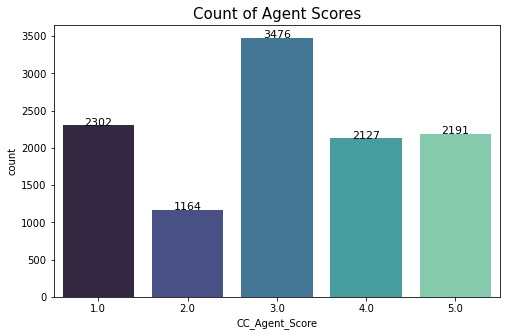

In [738]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['CC_Agent_Score'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Count of Agent Scores', fontsize=15);

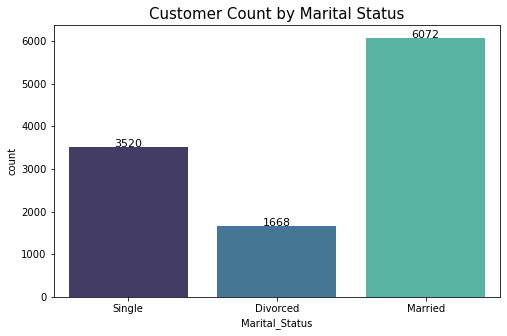

In [739]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Marital_Status'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Customer Count by Marital Status', fontsize=15);

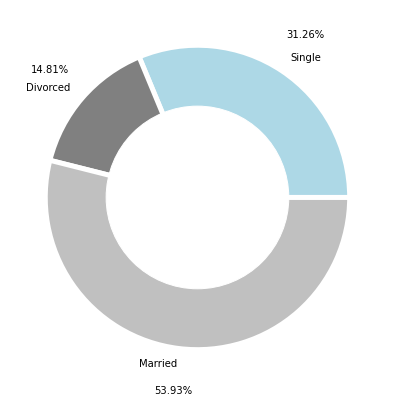

In [740]:
Single = df.Marital_Status.value_counts()['Single']
Divorced = df.Marital_Status.value_counts()['Divorced']
Married = df.Marital_Status.value_counts()['Married']

names = ['Single', 'Divorced', 'Married']
size = [Single, Divorced, Married]

plt.pie(size, labels = names, colors=['lightblue','grey', 'silver'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':5, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

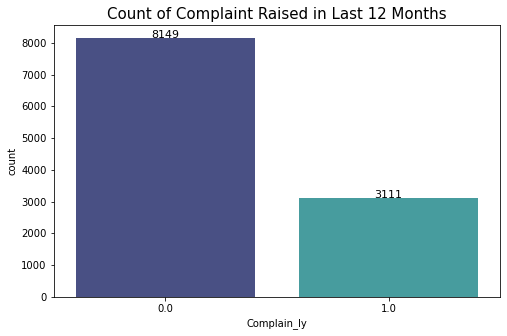

In [741]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Complain_ly'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Count of Complaint Raised in Last 12 Months', fontsize=15);

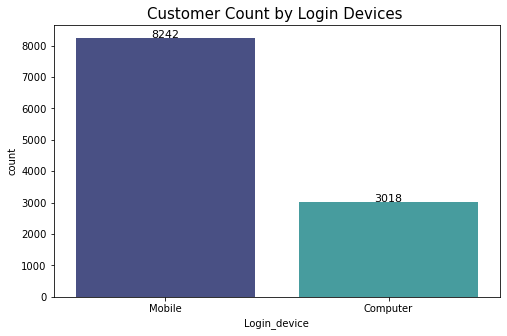

In [742]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Login_device'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Customer Count by Login Devices ', fontsize=15);

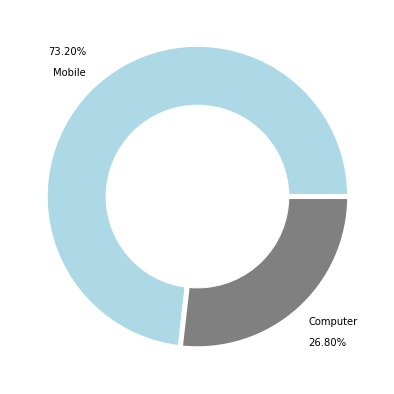

In [743]:
Mobile = df.Login_device.value_counts()['Mobile']
Computer = df.Login_device.value_counts()['Computer']

names = ['Mobile', 'Computer']
size = [Mobile, Computer]

plt.pie(size, labels = names, colors=['lightblue','grey'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':5, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

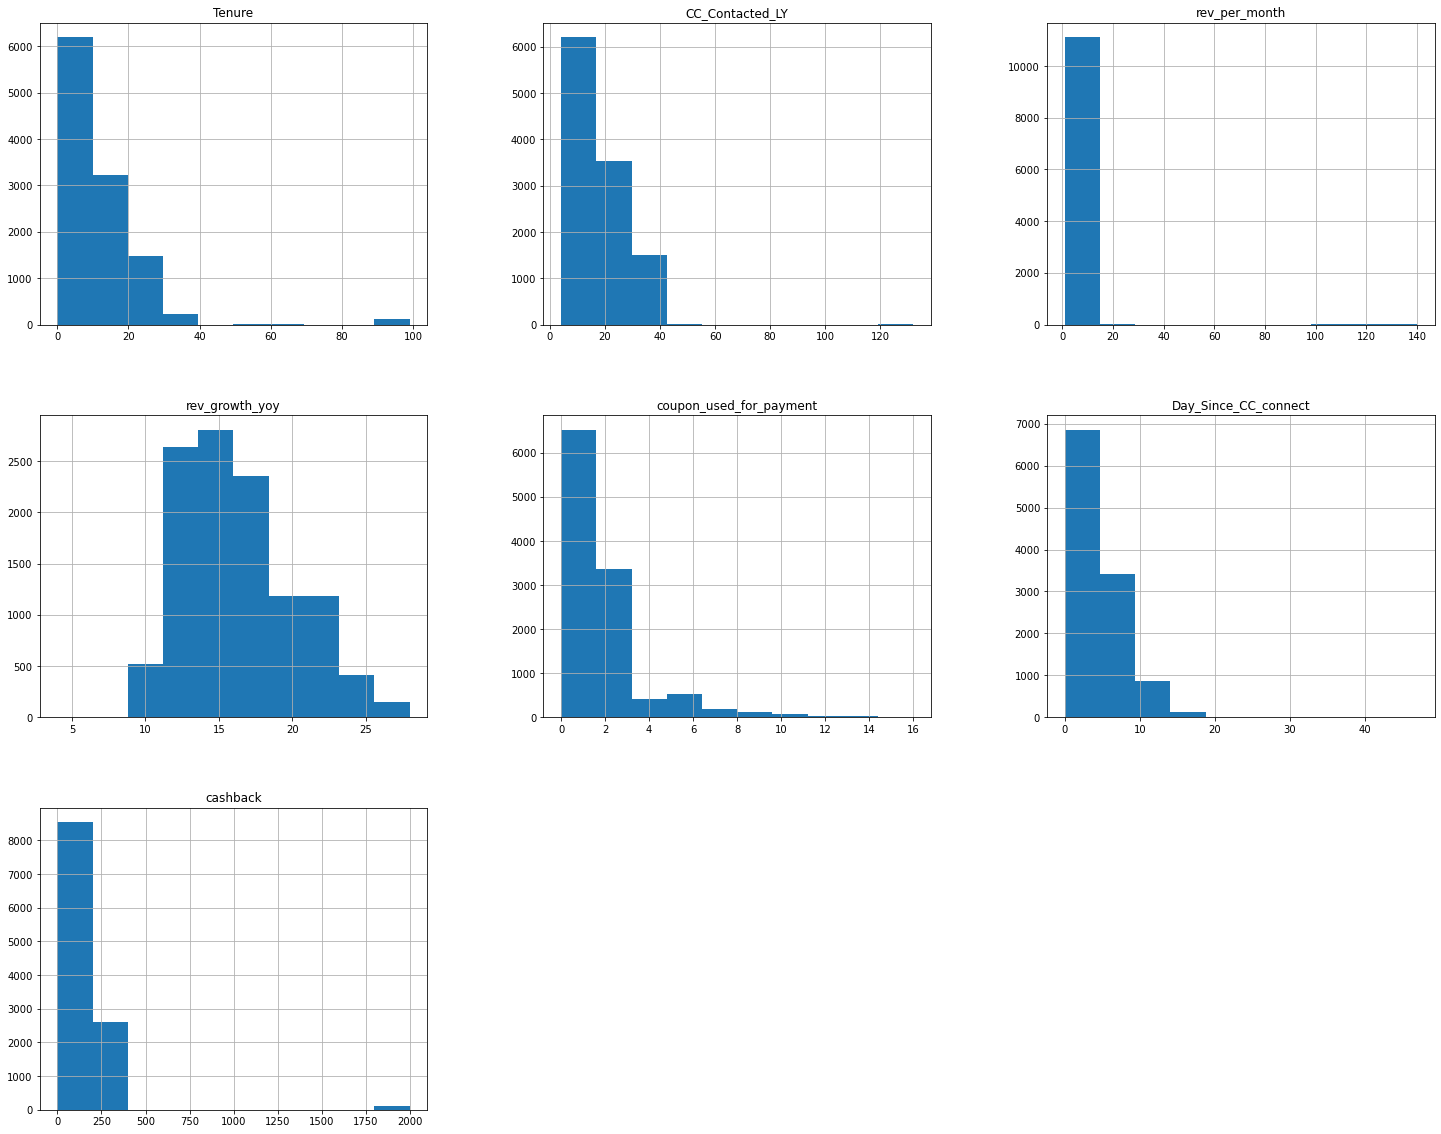

In [744]:
df_num.hist(figsize=(25,20));

### Bivariate and Multi-variate Analysis

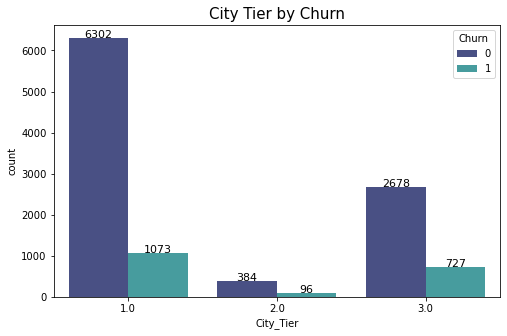

In [745]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['City_Tier'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('City Tier by Churn', fontsize=15);

In [746]:
pd.DataFrame(df.groupby('City_Tier')['Churn'].value_counts(1).round(2)*100)

Churn
City_Tier Churn       
1.0       0       85.0
          1       15.0
2.0       0       80.0
          1       20.0
3.0       0       79.0
          1       21.0

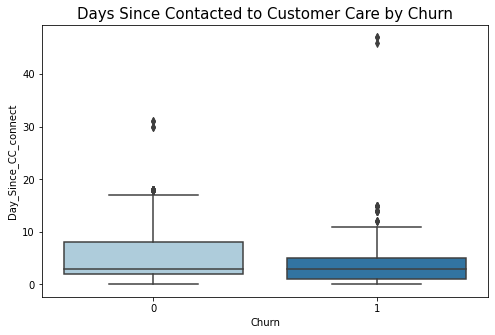

In [747]:
countplt, ax = plt.subplots(figsize=(8,5))
ax=sns.boxplot(y = 'Day_Since_CC_connect', x = 'Churn', data = df, palette = 'Paired');

plt.title('Days Since Contacted to Customer Care by Churn', fontsize=15);

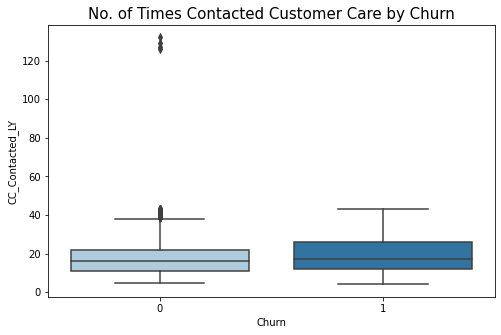

In [748]:
countplt, ax = plt.subplots(figsize=(8,5))
ax=sns.boxplot(y = 'CC_Contacted_LY', x = 'Churn', data = df, palette = 'Paired');
plt.title('No. of Times Contacted Customer Care by Churn', fontsize=15);

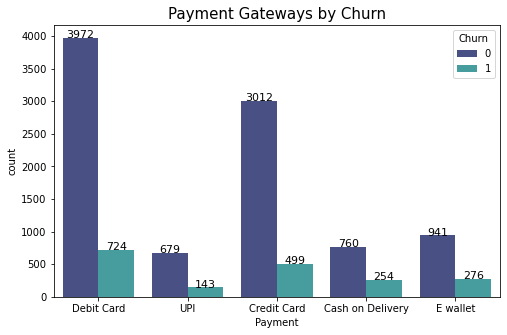

In [749]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Payment'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Payment Gateways by Churn', fontsize=15);

In [750]:
pd.DataFrame(df.groupby('Payment')['Churn'].value_counts(1).round(2)*100)

Churn
Payment          Churn       
Cash on Delivery 0       75.0
                 1       25.0
Credit Card      0       86.0
                 1       14.0
Debit Card       0       85.0
                 1       15.0
E wallet         0       77.0
                 1       23.0
UPI              0       83.0
                 1       17.0

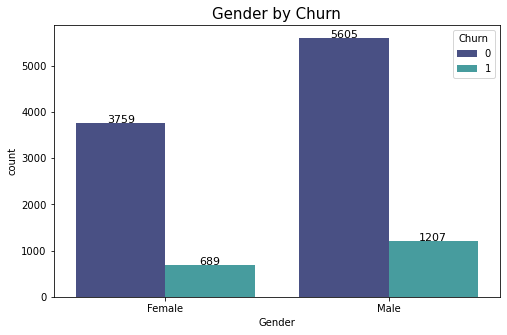

In [751]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Gender'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Gender by Churn', fontsize=15);

In [752]:
pd.DataFrame(df.groupby('Gender')['Churn'].value_counts(1).round(2)*100)

Churn
Gender Churn       
Female 0       85.0
       1       15.0
Male   0       82.0
       1       18.0

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


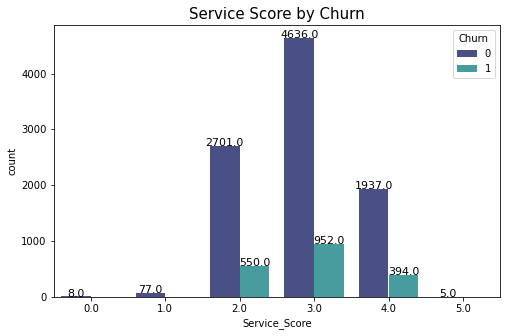

In [753]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Service_Score'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Service Score by Churn', fontsize=15);

In [754]:
pd.DataFrame(df.groupby('Service_Score')['Churn'].value_counts(1).round(2)*100)

Churn
Service_Score Churn       
0.0           0      100.0
1.0           0      100.0
2.0           0       83.0
              1       17.0
3.0           0       83.0
              1       17.0
4.0           0       83.0
              1       17.0
5.0           0      100.0

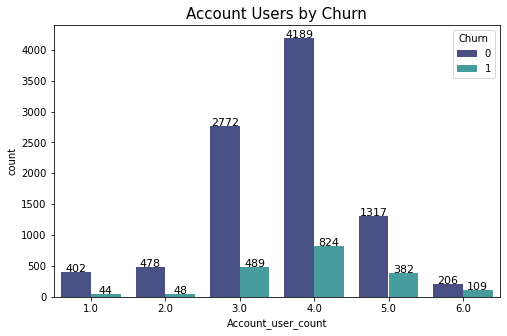

In [755]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Account_user_count'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Account Users by Churn', fontsize=15);

In [756]:
pd.DataFrame(df.groupby('Account_user_count')['Churn'].value_counts(1).round(2)*100)

Churn
Account_user_count Churn       
1.0                0       90.0
                   1       10.0
2.0                0       91.0
                   1        9.0
3.0                0       85.0
                   1       15.0
4.0                0       84.0
                   1       16.0
5.0                0       78.0
                   1       22.0
6.0                0       65.0
                   1       35.0

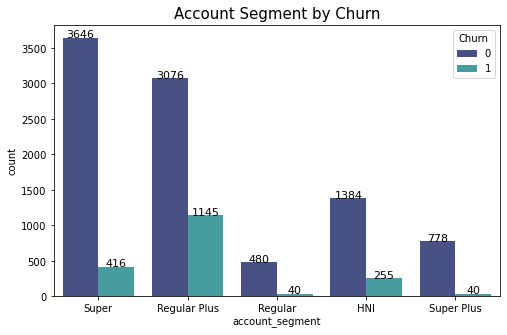

In [757]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['account_segment'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Account Segment by Churn', fontsize=15);

In [758]:
pd.DataFrame(df.groupby('account_segment')['Churn'].value_counts(1).round(2)*100)

Churn
account_segment Churn       
HNI             0       84.0
                1       16.0
Regular         0       92.0
                1        8.0
Regular Plus    0       73.0
                1       27.0
Super           0       90.0
                1       10.0
Super Plus      0       95.0
                1        5.0

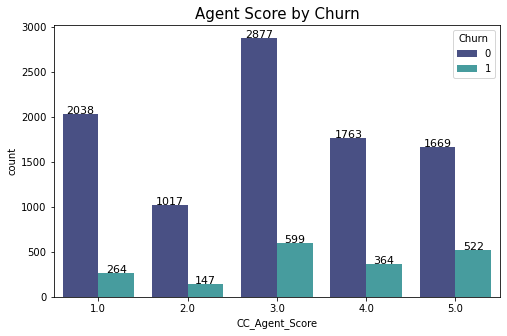

In [759]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['CC_Agent_Score'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Agent Score by Churn', fontsize=15);

In [760]:
pd.DataFrame(df.groupby('CC_Agent_Score')['Churn'].value_counts(1).round(2)*100)

Churn
CC_Agent_Score Churn       
1.0            0       89.0
               1       11.0
2.0            0       87.0
               1       13.0
3.0            0       83.0
               1       17.0
4.0            0       83.0
               1       17.0
5.0            0       76.0
               1       24.0

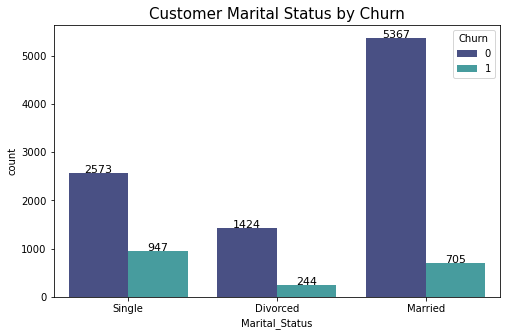

In [761]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Marital_Status'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Customer Marital Status by Churn', fontsize=15);

In [762]:
pd.DataFrame(df.groupby('Marital_Status')['Churn'].value_counts(1).round(2)*100)

Churn
Marital_Status Churn       
Divorced       0       85.0
               1       15.0
Married        0       88.0
               1       12.0
Single         0       73.0
               1       27.0

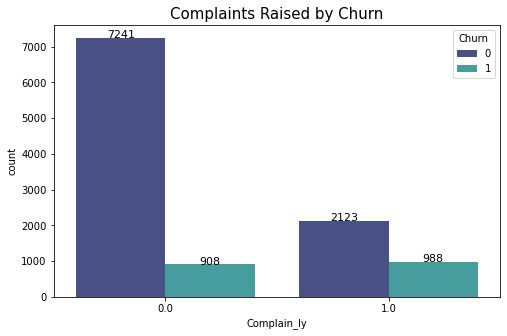

In [763]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Complain_ly'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Complaints Raised by Churn', fontsize=15);

In [764]:
pd.DataFrame(df.groupby('Complain_ly')['Churn'].value_counts(1).round(2)*100)

Churn
Complain_ly Churn       
0.0         0       89.0
            1       11.0
1.0         0       68.0
            1       32.0

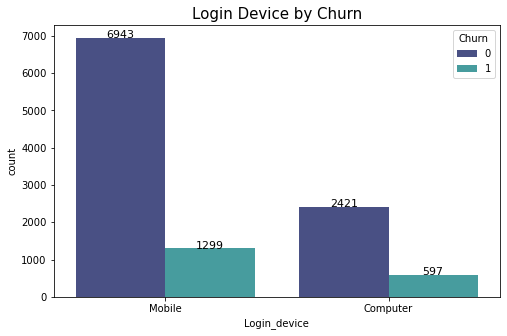

In [765]:
countplt, ax = plt.subplots(figsize=(8,5))
ax =sns.countplot(df['Login_device'], hue=df['Churn'], palette='mako');

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()/2,rect.get_height()+ 0.75, rect.get_height(), horizontalalignment='center', fontsize = 11)
countplt

plt.title('Login Device by Churn', fontsize=15);

In [766]:
pd.DataFrame(df.groupby('Login_device')['Churn'].value_counts(1).round(2)*100)

Churn
Login_device Churn       
Computer     0       80.0
             1       20.0
Mobile       0       84.0
             1       16.0

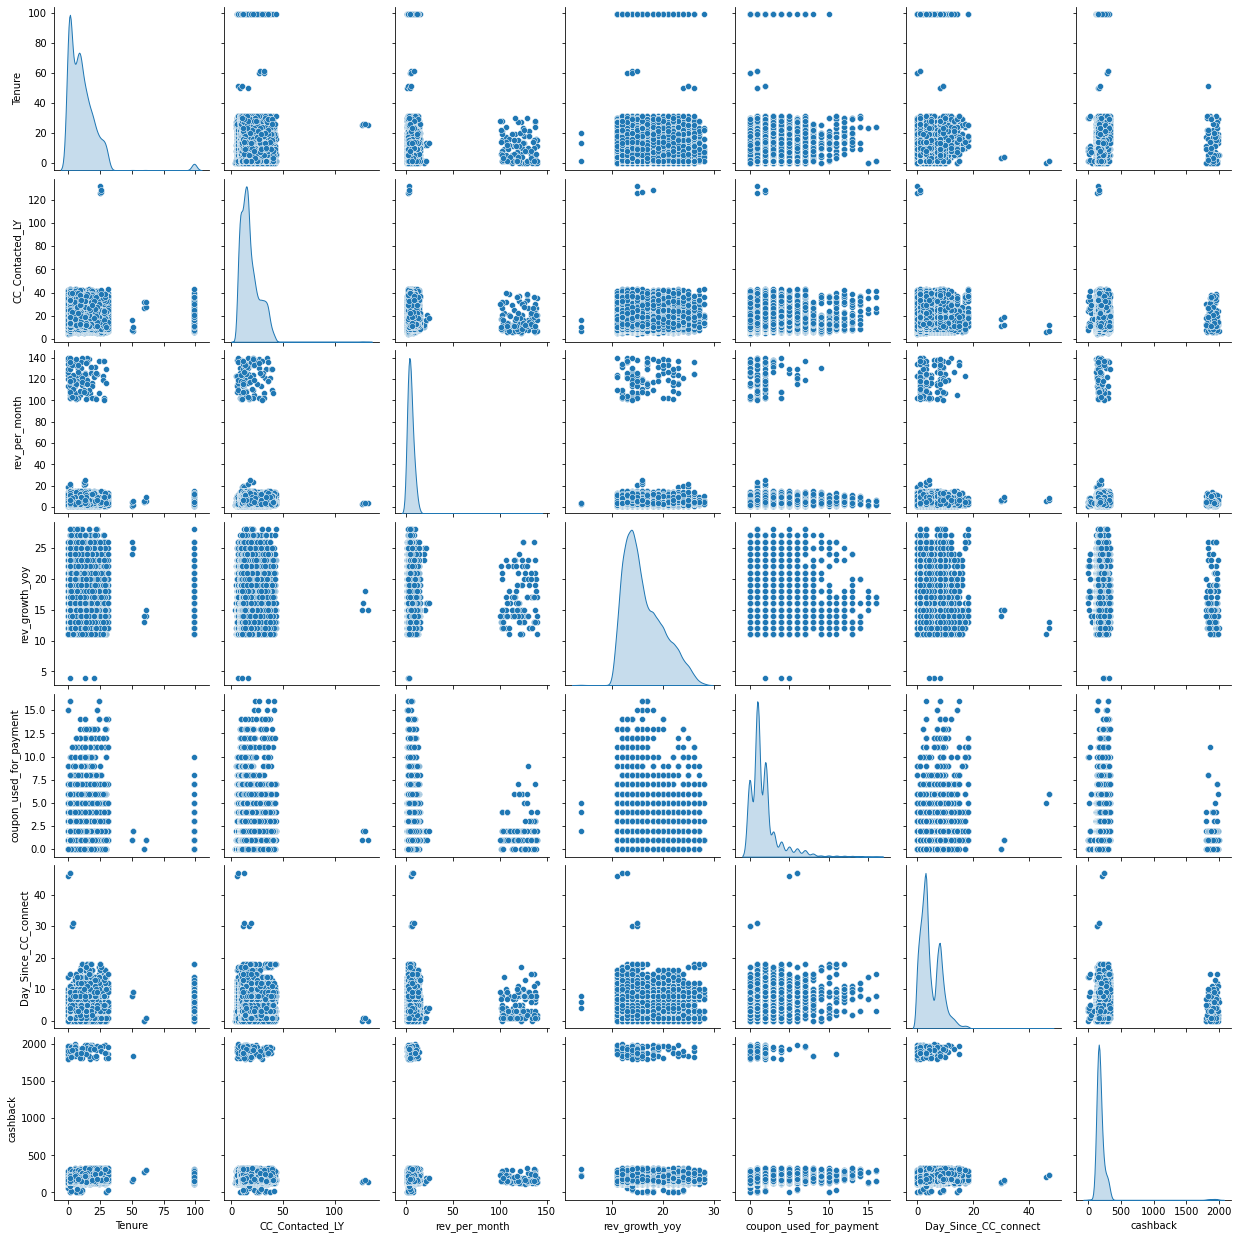

In [767]:
sns.pairplot(df_num, diag_kind='kde')  
plt.show()

In [768]:
churn_and_num = df.drop(['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score','Marital_Status', 'Complain_ly', 'Login_device'], axis=1)

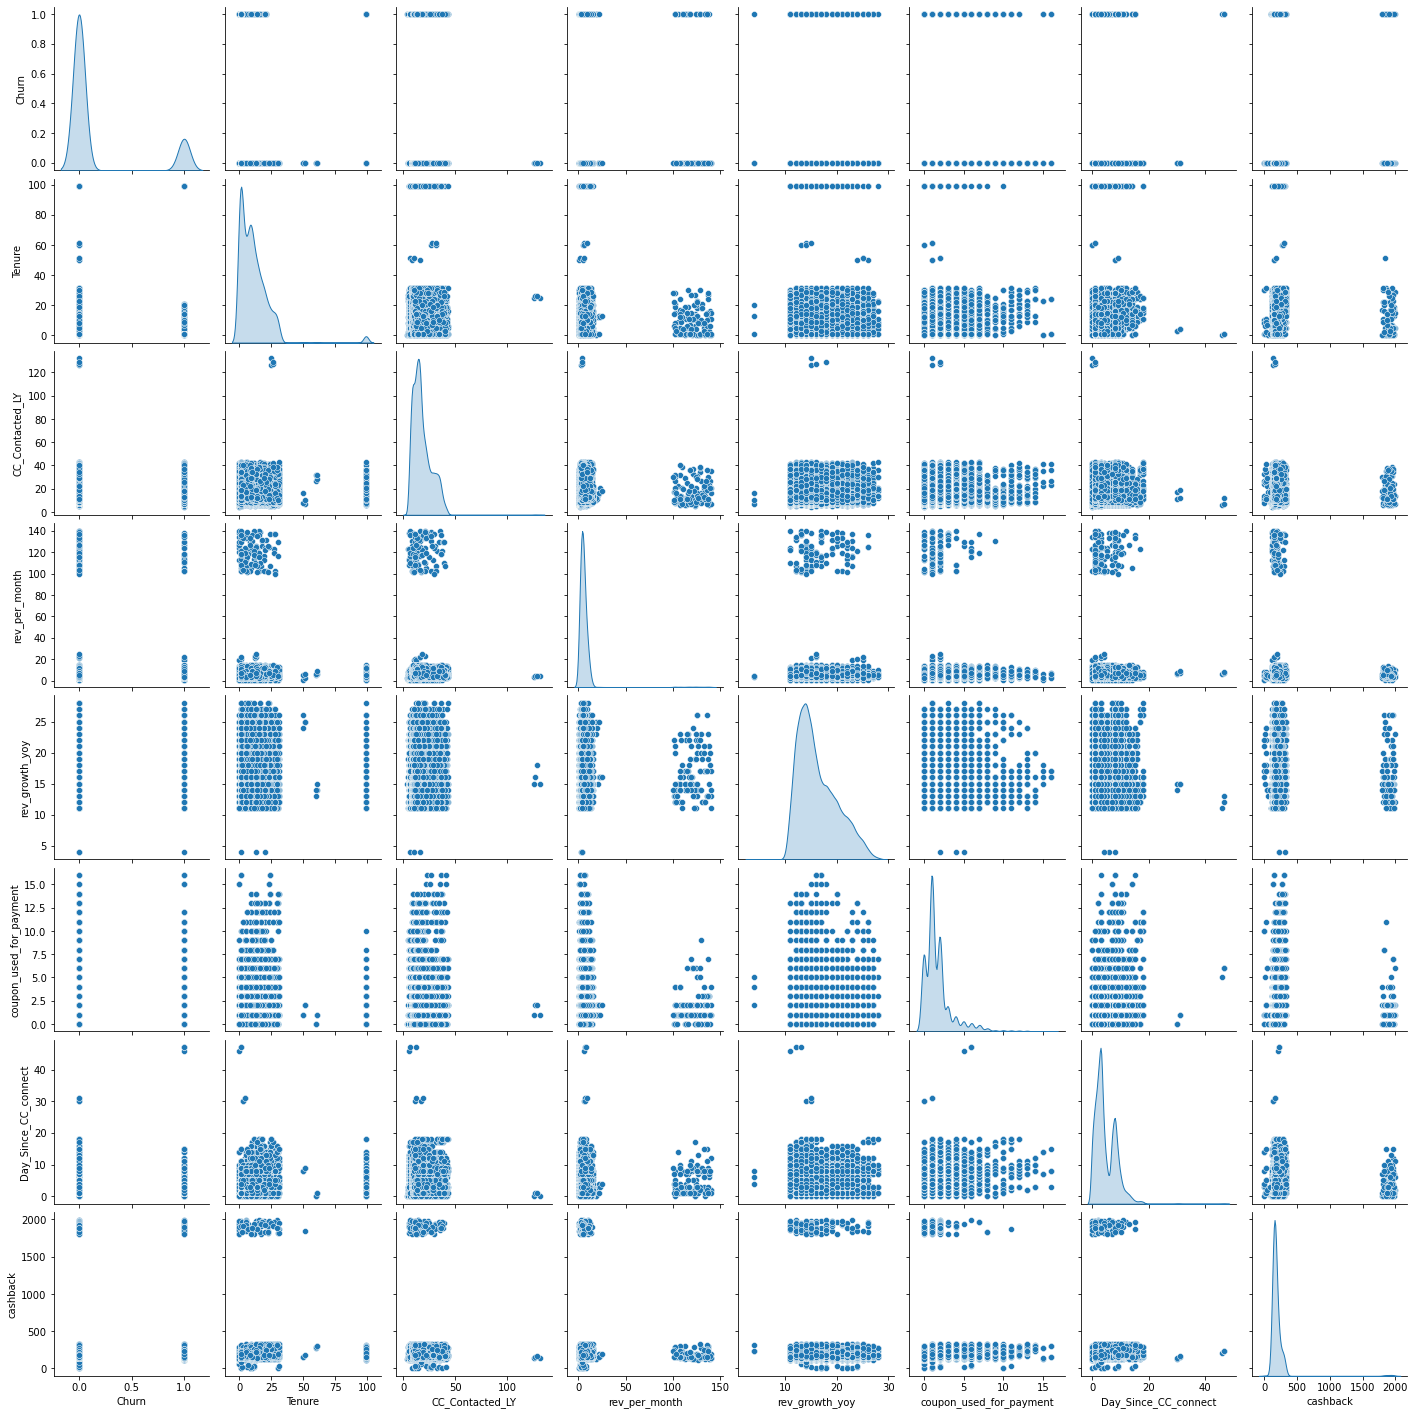

In [362]:
sns.pairplot(churn_and_num, diag_kind='kde')  
plt.show()

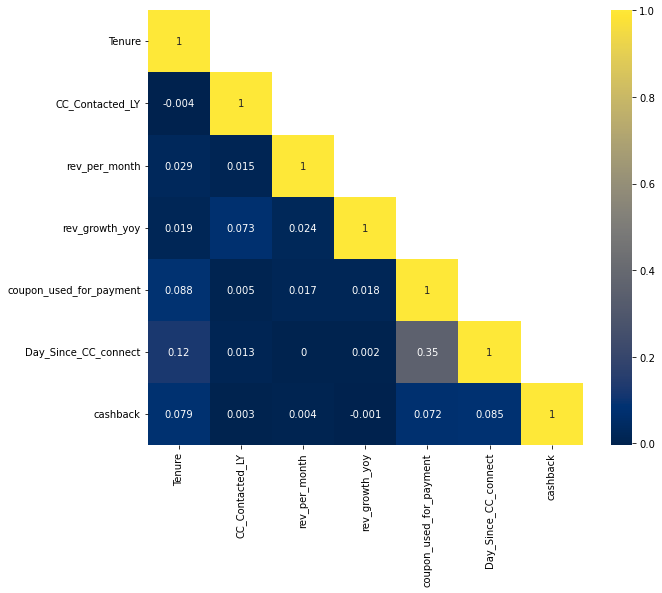

In [783]:
cor = df_num.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,8)
sns.heatmap(cor.round(3), mask=mask, vmax=1, square=True, annot=True, cmap = 'cividis')
plt.show()

### Outlier Treatment

In [364]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [365]:
proportion = ((( (df > UL) | (df <LL))).sum())/df.shape[0]*100

In [366]:
pd.DataFrame(proportion, columns=['Outlier Proportion (%)']).round(2)

Outlier Proportion (%)
Account_user_count                         6.76
CC_Agent_Score                             0.00
CC_Contacted_LY                            0.37
Churn                                     16.84
City_Tier                                  0.00
Complain_ly                                0.00
Day_Since_CC_connect                       1.15
Gender                                     0.00
Login_device                               0.00
Marital_Status                             0.00
Payment                                    0.00
Service_Score                              0.12
Tenure                                     1.23
account_segment                            0.00
cashback                                   8.76
coupon_used_for_payment                   12.26
rev_growth_yoy                             0.00
rev_per_month                              1.64

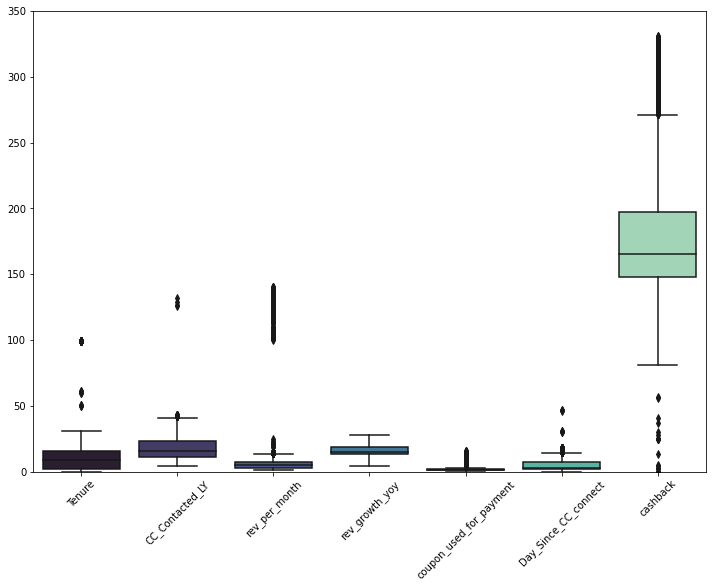

In [608]:
plt.figure(figsize = (10,7))
sns.boxplot(data = df_num, palette='mako', orient='v')
plt.ylim(0,350)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [623]:
def outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    
    IQR = Q3 - Q1
    up = Q3 + (1.5*IQR)
    lo = Q1 - (1.5*IQR)
    return up, lo

In [624]:
ur, lr = outlier(df_num.Tenure)
df_num['Tenure']=np.where(df_num['Tenure']>ur,ur,df_num['Tenure'])
df_num['Tenure']=np.where(df_num['Tenure']<lr,lr,df_num['Tenure'])

ur, lr = outlier(df_num.CC_Contacted_LY)
df_num['CC_Contacted_LY']=np.where(df_num['CC_Contacted_LY']>ur,ur,df_num['CC_Contacted_LY'])
df_num['CC_Contacted_LY']=np.where(df_num['CC_Contacted_LY']<lr,lr,df_num['CC_Contacted_LY'])

ur, lr = outlier(df_num.rev_per_month)
df_num['rev_per_month']=np.where(df_num['rev_per_month']>ur,ur,df_num['rev_per_month'])
df_num['rev_per_month']=np.where(df_num['rev_per_month']<lr,lr,df_num['rev_per_month'])

ur, lr = outlier(df_num.Day_Since_CC_connect)
df_num['Day_Since_CC_connect']=np.where(df_num['Day_Since_CC_connect']>ur,ur,df_num['Day_Since_CC_connect'])
df_num['Day_Since_CC_connect']=np.where(df_num['Day_Since_CC_connect']<lr,lr,df_num['Day_Since_CC_connect'])

ur, lr = outlier(df_num.cashback)
df_num['cashback']=np.where(df_num['cashback']>ur,ur,df_num['cashback'])
df_num['cashback']=np.where(df_num['cashback']<lr,lr,df_num['cashback'])

ur, lr = outlier(df_num.coupon_used_for_payment)
df_num['coupon_used_for_payment']=np.where(df_num['coupon_used_for_payment']>ur,ur,df_num['coupon_used_for_payment'])
df_num['coupon_used_for_payment']=np.where(df_num['coupon_used_for_payment']<lr,lr,df_num['coupon_used_for_payment'])

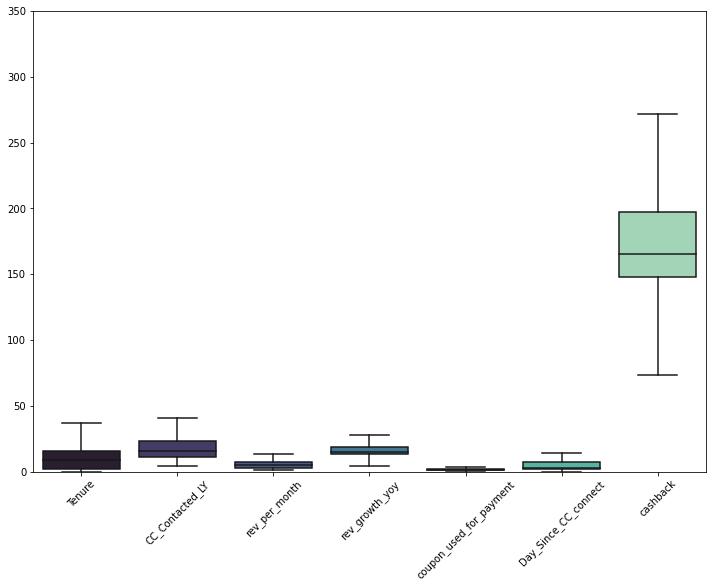

In [625]:
plt.figure(figsize = (10,7))
sns.boxplot(data = df_num, palette='mako', orient='v')
plt.ylim(0,350)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [368]:
def outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    
    IQR = Q3 - Q1
    up = Q3 + (1.5*IQR)
    lo = Q1 - (1.5*IQR)
    return up, lo

In [369]:
ur, lr = outlier(df.Tenure)
df['Tenure']=np.where(df['Tenure']>ur,ur,df['Tenure'])
df['Tenure']=np.where(df['Tenure']<lr,lr,df['Tenure'])

ur, lr = outlier(df.CC_Contacted_LY)
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']>ur,ur,df['CC_Contacted_LY'])
df['CC_Contacted_LY']=np.where(df['CC_Contacted_LY']<lr,lr,df['CC_Contacted_LY'])

ur, lr = outlier(df.rev_per_month)
df['rev_per_month']=np.where(df['rev_per_month']>ur,ur,df['rev_per_month'])
df['rev_per_month']=np.where(df['rev_per_month']<lr,lr,df['rev_per_month'])

ur, lr = outlier(df.Day_Since_CC_connect)
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']>ur,ur,df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=np.where(df['Day_Since_CC_connect']<lr,lr,df['Day_Since_CC_connect'])

ur, lr = outlier(df.cashback)
df['cashback']=np.where(df['cashback']>ur,ur,df['cashback'])
df['cashback']=np.where(df['cashback']<lr,lr,df['cashback'])

ur, lr = outlier(df.coupon_used_for_payment)
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment']>ur,ur,df['coupon_used_for_payment'])
df['coupon_used_for_payment']=np.where(df['coupon_used_for_payment']<lr,lr,df['coupon_used_for_payment'])

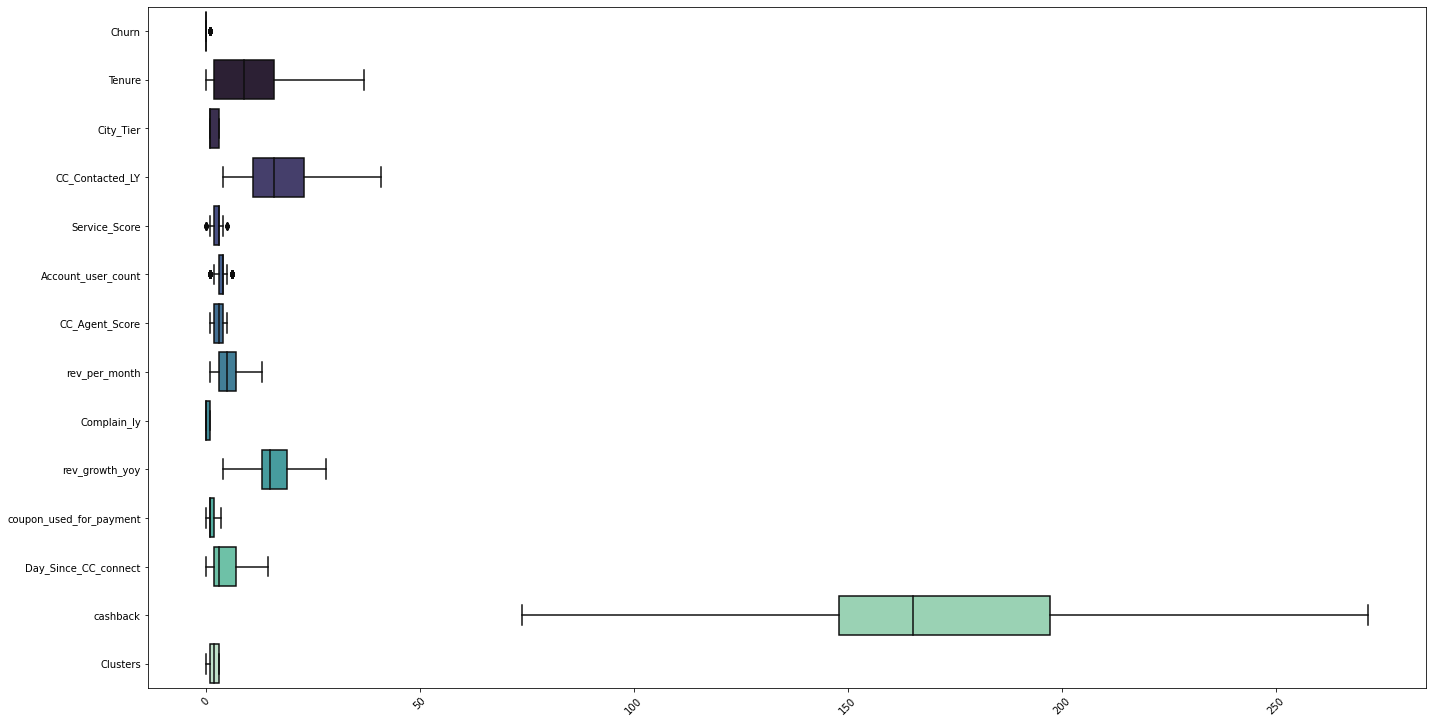

In [599]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df, orient='h', palette='mako')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

In [371]:
df.shape

(11260, 18)

### Chi Squared Test for Independence

#### Hypothesis:

##### Null hypothesis: There is no relationship between two categorical variables
##### Alternate hypothesis: There is a relationship between two categorical variables

###### Gender

In [828]:
gender_churn_ct = pd.crosstab(index = df['Gender'], columns = df['Churn'])
gender_churn_ct

Churn      0     1
Gender            
Female  3759   689
Male    5605  1207

In [829]:
gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values

(array([3759,  689], dtype=int64), array([5605, 1207], dtype=int64))

In [830]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [831]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   9.38597549200703
p-value    :   0.0021865167504896894
degree of freedom    :   1


In [832]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [833]:
op_table = pd.DataFrame(columns=['Variable','chi2','p-value','chi2_output']).round(2)

In [834]:
op_table.round()

Empty DataFrame
Columns: [Variable, chi2, p-value, chi2_output]
Index: []

In [835]:
dict = {'Variable':'Gender', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True).round(2)
op_table.round(2)

Variable      chi2   p-value            chi2_output
0   Gender  9.385975  0.002187  Reject Ho; Dependent.

###### Service_Score

In [836]:
SS_churn_ct = pd.crosstab(index = df['Service_Score'], columns = df['Churn'])
SS_churn_ct

Churn             0    1
Service_Score           
0.0               8    0
1.0              77    0
2.0            2701  550
3.0            4636  952
4.0            1937  394
5.0               5    0

In [837]:
(chi2, p, dof, _) = stats.chi2_contingency([SS_churn_ct.iloc[0].values, SS_churn_ct.iloc[1].values, SS_churn_ct.iloc[2].values, SS_churn_ct.iloc[3].values, SS_churn_ct.iloc[4].values, SS_churn_ct.iloc[5].values])

In [838]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   18.401197436863168
p-value    :   0.002483426695476192
degree of freedom    :   5


In [839]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [840]:
dict = {'Variable':'Service_Score', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}
op_table = op_table.append(dict, ignore_index=True)
op_table

Variable       chi2   p-value            chi2_output
0         Gender   9.385975  0.002187  Reject Ho; Dependent.
1  Service_Score  18.401197  0.002483  Reject Ho; Dependent.

###### City_Tier

In [841]:
CT_churn_ct = pd.crosstab(index = df['City_Tier'], columns = df['Churn'])
CT_churn_ct

Churn         0     1
City_Tier            
1.0        6302  1073
2.0         384    96
3.0        2678   727

In [842]:
(chi2, p, dof, _) = stats.chi2_contingency([CT_churn_ct.iloc[0].values, CT_churn_ct.iloc[1].values, CT_churn_ct.iloc[2].values])
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   80.5425974243912
p-value    :   3.238897394989702e-18
degree of freedom    :   2


In [843]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [844]:
dict = {'Variable':'City_Tier', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}

In [845]:
op_table = op_table.append(dict, ignore_index=True)
op_table

Variable       chi2   p-value            chi2_output
0         Gender   9.385975  0.002187  Reject Ho; Dependent.
1  Service_Score  18.401197  0.002483  Reject Ho; Dependent.
2      City_Tier  80.542597       0.0  Reject Ho; Dependent.

###### Payment

In [846]:
Payment_churn_ct = pd.crosstab(index = df['Payment'], columns = df['Churn'])
Payment_churn_ct

Churn                0    1
Payment                    
Cash on Delivery   760  254
Credit Card       3012  499
Debit Card        3972  724
E wallet           941  276
UPI                679  143

In [847]:
(chi2, p, dof, _) = stats.chi2_contingency([Payment_churn_ct.iloc[0].values, Payment_churn_ct.iloc[1].values, Payment_churn_ct.iloc[2].values, Payment_churn_ct.iloc[3].values,Payment_churn_ct.iloc[4].values])
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   102.70809669992555
p-value    :   2.6071765902519377e-21
degree of freedom    :   4


In [848]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [849]:
dict = {'Variable':'Payment', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}

In [850]:
op_table = op_table.append(dict, ignore_index=True)
op_table

Variable        chi2   p-value            chi2_output
0         Gender    9.385975  0.002187  Reject Ho; Dependent.
1  Service_Score   18.401197  0.002483  Reject Ho; Dependent.
2      City_Tier   80.542597       0.0  Reject Ho; Dependent.
3        Payment  102.708097       0.0  Reject Ho; Dependent.

##### account_segment

In [851]:
AS_churn_ct = pd.crosstab(index = df['account_segment'], columns = df['Churn'])
AS_churn_ct

Churn               0     1
account_segment            
HNI              1384   255
Regular           480    40
Regular Plus     3076  1145
Super            3646   416
Super Plus        778    40

In [852]:
(chi2, p, dof, _) = stats.chi2_contingency([AS_churn_ct.iloc[0].values, AS_churn_ct.iloc[1].values, AS_churn_ct.iloc[2].values, AS_churn_ct.iloc[3].values, AS_churn_ct.iloc[4].values])

In [853]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   561.6668779046871
p-value    :   3.059001211977884e-120
degree of freedom    :   4


In [854]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [855]:
dict = {'Variable':'account_segment', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}

In [856]:
op_table = op_table.append(dict, ignore_index=True)
op_table

Variable        chi2   p-value            chi2_output
0           Gender    9.385975  0.002187  Reject Ho; Dependent.
1    Service_Score   18.401197  0.002483  Reject Ho; Dependent.
2        City_Tier   80.542597       0.0  Reject Ho; Dependent.
3          Payment  102.708097       0.0  Reject Ho; Dependent.
4  account_segment  561.666878       0.0  Reject Ho; Dependent.

###### CC_Agent_Score

In [857]:
CCAS_churn_ct = pd.crosstab(index = df['CC_Agent_Score'], columns = df['Churn'])
CCAS_churn_ct

Churn              0    1
CC_Agent_Score           
1.0             2038  264
2.0             1017  147
3.0             2877  599
4.0             1763  364
5.0             1669  522

In [858]:
(chi2, p, dof, _) = stats.chi2_contingency([CCAS_churn_ct.iloc[0].values, CCAS_churn_ct.iloc[1].values, CCAS_churn_ct.iloc[2].values, CCAS_churn_ct.iloc[3].values, CCAS_churn_ct.iloc[4].values])

In [859]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   139.00704223518886
p-value    :   4.604846025313827e-29
degree of freedom    :   4


In [860]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [861]:
dict = {'Variable':'CC_Agent_Score', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}

In [862]:
op_table = op_table.append(dict, ignore_index=True)
op_table

Variable        chi2   p-value            chi2_output
0           Gender    9.385975  0.002187  Reject Ho; Dependent.
1    Service_Score   18.401197  0.002483  Reject Ho; Dependent.
2        City_Tier   80.542597       0.0  Reject Ho; Dependent.
3          Payment  102.708097       0.0  Reject Ho; Dependent.
4  account_segment  561.666878       0.0  Reject Ho; Dependent.
5   CC_Agent_Score  139.007042       0.0  Reject Ho; Dependent.

###### Marital_Status

In [863]:
MS_churn_ct = pd.crosstab(index = df['Marital_Status'], columns = df['Churn'])
MS_churn_ct

Churn              0    1
Marital_Status           
Divorced        1424  244
Married         5367  705
Single          2573  947

In [864]:
(chi2, p, dof, _) = stats.chi2_contingency([MS_churn_ct.iloc[0].values, MS_churn_ct.iloc[1].values, MS_churn_ct.iloc[2].values])

In [865]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   378.975370432003
p-value    :   5.087962737997856e-83
degree of freedom    :   2


In [866]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [867]:
dict = {'Variable':'Marital_Status', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}

In [868]:
op_table = op_table.append(dict, ignore_index=True)
op_table

Variable        chi2   p-value            chi2_output
0           Gender    9.385975  0.002187  Reject Ho; Dependent.
1    Service_Score   18.401197  0.002483  Reject Ho; Dependent.
2        City_Tier   80.542597       0.0  Reject Ho; Dependent.
3          Payment  102.708097       0.0  Reject Ho; Dependent.
4  account_segment  561.666878       0.0  Reject Ho; Dependent.
5   CC_Agent_Score  139.007042       0.0  Reject Ho; Dependent.
6   Marital_Status   378.97537       0.0  Reject Ho; Dependent.

###### Complain_ly

In [869]:
CL_churn_ct = pd.crosstab(index = df['Complain_ly'], columns = df['Churn'])
CL_churn_ct

Churn           0    1
Complain_ly           
0.0          7241  908
1.0          2123  988

In [870]:
(chi2, p, dof, _) = stats.chi2_contingency([CL_churn_ct.iloc[0].values, CL_churn_ct.iloc[1].values])

In [871]:
print("chi2     :  ", chi2)
print("p-value    :  ", p)
print("degree of freedom    :  ", dof)

chi2     :   681.8791925932455
p-value    :   2.6077527891178995e-150
degree of freedom    :   1


In [872]:
if p < 0.05:
    chi2_decision = 'Reject Ho; Dependent.'
else:
    chi2_decision = 'Fail to reject Ho; Independent'

In [873]:
dict = {'Variable':'Complain_LY', 'chi2' : chi2, 'p-value' : p, 'chi2_output': chi2_decision}

In [874]:
op_table = op_table.append(dict, ignore_index=True).round(2)
op_table

Variable        chi2   p-value            chi2_output
0           Gender    9.385975  0.002187  Reject Ho; Dependent.
1    Service_Score   18.401197  0.002483  Reject Ho; Dependent.
2        City_Tier   80.542597       0.0  Reject Ho; Dependent.
3          Payment  102.708097       0.0  Reject Ho; Dependent.
4  account_segment  561.666878       0.0  Reject Ho; Dependent.
5   CC_Agent_Score  139.007042       0.0  Reject Ho; Dependent.
6   Marital_Status   378.97537       0.0  Reject Ho; Dependent.
7      Complain_LY  681.879193       0.0  Reject Ho; Dependent.

In [419]:
df_new = df.copy()

### Onehot Encoding

In [420]:
df_new.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [421]:
for i in df_new.columns:
    if df_new[i].dtype == 'object':
        print(i, '\n', df_new[i].value_counts(), '\n')

Payment 
 Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64 

Gender 
 Male      6812
Female    4448
Name: Gender, dtype: int64 

account_segment 
 Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64 

Marital_Status 
 Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64 

Login_device 
 Mobile      8242
Computer    3018
Name: Login_device, dtype: int64 



In [422]:
encode_col = ['Payment', 'Gender', 'Marital_Status', 'Login_device']

df_new = pd.get_dummies(df_new, columns=encode_col, drop_first=True)

In [423]:
df_new['City_Tier'] = df_new['City_Tier'].replace('1','3')
df_new['City_Tier'] = df_new['City_Tier'].replace('2','2')
df_new['City_Tier'] = df_new['City_Tier'].replace('3','1')

df_new['account_segment'] = df_new['account_segment'].replace('Regular','1')
df_new['account_segment'] = df_new['account_segment'].replace('Regular Plus','2')
df_new['account_segment'] = df_new['account_segment'].replace('Super','3')
df_new['account_segment'] = df_new['account_segment'].replace('Super Plus','4')
df_new['account_segment'] = df_new['account_segment'].replace('HNI','5')

In [424]:
df_new['account_segment'] = df_new['account_segment'].astype('int64')

In [425]:
df_new.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0      1     4.0        3.0              6.0            3.0   
1      1     0.0        1.0              8.0            3.0   
2      1     0.0        1.0             30.0            2.0   
3      1     0.0        3.0             15.0            2.0   
4      1     0.0        1.0             12.0            2.0   

   Account_user_count  account_segment  CC_Agent_Score  rev_per_month  \
0                 3.0                3             2.0            9.0   
1                 4.0                2             3.0            7.0   
2                 4.0                2             3.0            6.0   
3                 4.0                3             5.0            8.0   
4                 3.0                2             5.0            3.0   

   Complain_ly  ...  Day_Since_CC_connect  cashback  Payment_Credit Card  \
0          1.0  ...                   5.0    159.93                    0   
1          1.0  ...                   0.0    120.90                    0   
2          1.0  ...                   3.0    165.25                    0   
3          0.0  ...                   3.0    134.07                    0   
4          0.0  ...                   3.0    129.60                    1   

   Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Male  \
0                   1                 0            0            0   
1                   0                 0            1            1   
2                   1                 0            0            1   
3                   1                 0            0            1   
4                   0                 0            0            1   

   Marital_Status_Married  Marital_Status_Single  Login_device_Mobile  
0                       0                      1                    1  
1                       0                      1                    1  
2                       0                      1                    1  
3                       0                      1                    1  
4                       0                      1                    1  

[5 rows x 22 columns]

In [426]:
df.shape

(11260, 18)

In [427]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Service_Score            11260 non-null  float64
 5   Account_user_count       11260 non-null  float64
 6   account_segment          11260 non-null  int64  
 7   CC_Agent_Score           11260 non-null  float64
 8   rev_per_month            11260 non-null  float64
 9   Complain_ly              11260 non-null  float64
 10  rev_growth_yoy           11260 non-null  float64
 11  coupon_used_for_payment  11260 non-null  float64
 12  Day_Since_CC_connect     11260 non-null  float64
 13  cashback                 11260 non-null  float64
 14  Payment_Credit Card   

### Scaling using MinMaX Scaler

In [428]:
df_new.Tenure = MinMaxScaler().fit_transform(df_new[['Tenure']])
df_new.CC_Contacted_LY = MinMaxScaler().fit_transform(df_new[['CC_Contacted_LY']])
df_new.rev_per_month = MinMaxScaler().fit_transform(df_new[['rev_per_month']])
df_new.Day_Since_CC_connect = MinMaxScaler().fit_transform(df_new[['Day_Since_CC_connect']])
df_new.cashback = MinMaxScaler().fit_transform(df_new[['cashback']])
df_new.Service_Score = MinMaxScaler().fit_transform(df_new[['Service_Score']])
df_new.Account_user_count = MinMaxScaler().fit_transform(df_new[['Account_user_count']])
df_new.CC_Agent_Score = MinMaxScaler().fit_transform(df_new[['CC_Agent_Score']])
df_new.coupon_used_for_payment = MinMaxScaler().fit_transform(df_new[['coupon_used_for_payment']])
df_new.rev_growth_yoy = MinMaxScaler().fit_transform(df_new[['rev_growth_yoy']])
df_new.account_segment = MinMaxScaler().fit_transform(df_new[['account_segment']])
df_new.City_Tier = MinMaxScaler().fit_transform(df_new[['City_Tier']])

In [429]:
df_new.head().round(2)

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0      1    0.11        1.0             0.05            0.6   
1      1    0.00        0.0             0.11            0.6   
2      1    0.00        0.0             0.70            0.4   
3      1    0.00        1.0             0.30            0.4   
4      1    0.00        0.0             0.22            0.4   

   Account_user_count  account_segment  CC_Agent_Score  rev_per_month  \
0                 0.4             0.50            0.25           0.67   
1                 0.6             0.25            0.50           0.50   
2                 0.6             0.25            0.50           0.42   
3                 0.6             0.50            1.00           0.58   
4                 0.4             0.25            1.00           0.17   

   Complain_ly  ...  Day_Since_CC_connect  cashback  Payment_Credit Card  \
0          1.0  ...                  0.34      0.44                    0   
1          1.0  ...                  0.00      0.24                    0   
2          1.0  ...                  0.21      0.46                    0   
3          0.0  ...                  0.21      0.31                    0   
4          0.0  ...                  0.21      0.28                    1   

   Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Male  \
0                   1                 0            0            0   
1                   0                 0            1            1   
2                   1                 0            0            1   
3                   1                 0            0            1   
4                   0                 0            0            1   

   Marital_Status_Married  Marital_Status_Single  Login_device_Mobile  
0                       0                      1                    1  
1                       0                      1                    1  
2                       0                      1                    1  
3                       0                      1                    1  
4                       0                      1                    1  

[5 rows x 22 columns]

In [430]:
df_new.shape

(11260, 22)

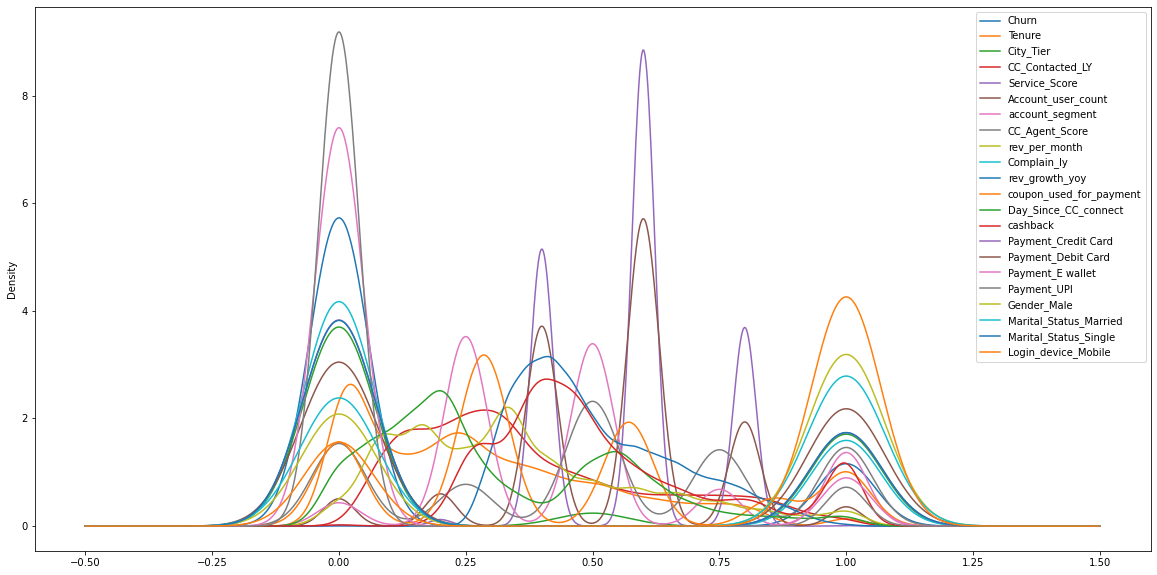

In [431]:
df_new.plot(kind = 'kde', figsize=(20,10))
plt.show()

### Bartlett's test of sphericity

In [432]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
chi_square_value,p_value=calculate_bartlett_sphericity(df_new)
p_value

0.0

### Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy

In [433]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
kmo_all,kmo_model=calculate_kmo(df_new)
kmo_model

0.44399470089227816

### Clustering

In [434]:
from sklearn.cluster import KMeans

In [435]:
wss = []

for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(df_new)
    wss.append(km.inertia_)

In [436]:
wss

[30648.770523515,
 26507.732494964166,
 24126.351116733236,
 22630.260699293383,
 21239.437767307732,
 20478.17128598327,
 19545.895779582752,
 19016.535424671412,
 18478.894692803246,
 18046.365558258178]

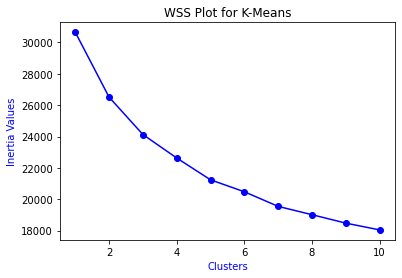

In [437]:
plt.plot(range(1,11), wss, marker = 'o', color = 'blue')
plt.title('WSS Plot for K-Means')
plt.ylabel('Inertia Values', color = 'blue')
plt.xlabel('Clusters', color = 'blue')
plt.show()

In [438]:
km.inertia_

18046.365558258178

In [439]:
k_means_2 = KMeans(n_clusters = 2,random_state=1)
k_means_2.fit(df_new)
k_means_2.inertia_

26507.732494964166

In [440]:
k_means_3 = KMeans(n_clusters = 3,random_state=1)
k_means_3.fit(df_new)
k_means_3.inertia_

24126.351116733236

In [441]:
k_means_4 = KMeans(n_clusters = 4,random_state=1)
k_means_4.fit(df_new)
k_means_4.inertia_

22449.07469479407

In [442]:
k_means_5 = KMeans(n_clusters = 5,random_state=1)
k_means_5.fit(df_new)
k_means_5.inertia_

21220.290377960013

In [443]:
k_means_6 = KMeans(n_clusters = 6,random_state=1)
k_means_6.fit(df_new)
k_means_6.inertia_

20262.698806733635

In [444]:
print('Silhoutte score with 2 Clusters is:', silhouette_score(df_new, labels=k_means_2.labels_, random_state=1).round(3))
print('Silhoutte score with 3 Clusters is:', silhouette_score(df_new, labels=k_means_3.labels_, random_state=1).round(3))
print('Silhoutte score with 4 Clusters is:', silhouette_score(df_new, labels=k_means_4.labels_, random_state=1).round(3))
print('Silhoutte score with 5 Clusters is:', silhouette_score(df_new, labels=k_means_5.labels_, random_state=1).round(3))
print('Silhoutte score with 6 Clusters is:', silhouette_score(df_new, labels=k_means_6.labels_, random_state=1).round(3))

Silhoutte score with 2 Clusters is: 0.135
Silhoutte score with 3 Clusters is: 0.122
Silhoutte score with 4 Clusters is: 0.139
Silhoutte score with 5 Clusters is: 0.142
Silhoutte score with 6 Clusters is: 0.15


In [445]:
df['Clusters'] = k_means_4.labels_
df.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  \
0                      1.0                   5.0    159.93       Mobile   
1                      0.0                   0.0    120.90       Mobile   
2                      0.0                   3.0    165.25       Mobile   
3                      0.0                   3.0    134.07       Mobile   
4                      1.0                   3.0    129.60       Mobile   

   Clusters  
0         3  
1         3  
2         3  
3         3  
4         3

In [446]:
clust_df = df.groupby('Clusters').mean()
clust_df['Freq'] = df.Clusters.value_counts()
clust_df.round(2)

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
Clusters                                                             
0          0.21   10.30       2.99            18.59           2.92   
1          0.10   10.85       1.49            17.54           2.93   
2          0.13   10.91       1.34            18.08           2.92   
3          0.25    8.92       1.54            17.45           2.86   

          Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
Clusters                                                                   
0                       3.75            3.14           5.14         0.30   
1                       3.67            3.04           5.20         0.26   
2                       3.65            3.10           5.38         0.29   
3                       3.77            3.02           5.21         0.27   

          rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Clusters                                                                  
0                  15.88                     1.53                  4.90   
1                  16.35                     1.51                  4.85   
2                  16.10                     1.48                  4.44   
3                  16.28                     1.41                  4.20   

          cashback  Freq  
Clusters                  
0           184.86  1429  
1           179.07  3161  
2           178.41  3486  
3           170.88  3184

# Project - II

In [447]:
print("Number of duplicate rows:",df_new.duplicated().sum())

Number of duplicate rows: 345


In [448]:
df_new = df_new.drop_duplicates(keep=False)

In [449]:
df_new.duplicated().sum()

0

In [450]:
df_new.head()

Churn    Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0      1  0.108108        1.0         0.054054            0.6   
2      1  0.000000        0.0         0.702703            0.4   
3      1  0.000000        1.0         0.297297            0.4   
4      1  0.000000        0.0         0.216216            0.4   
5      1  0.000000        0.0         0.486486            0.6   

   Account_user_count  account_segment  CC_Agent_Score  rev_per_month  \
0                 0.4             0.50            0.25       0.666667   
2                 0.6             0.25            0.50       0.416667   
3                 0.6             0.50            1.00       0.583333   
4                 0.4             0.25            1.00       0.166667   
5                 0.6             0.25            1.00       0.083333   

   Complain_ly  ...  Day_Since_CC_connect  cashback  Payment_Credit Card  \
0          1.0  ...              0.344828  0.435907                    0   
2          1.0  ...              0.206897  0.462819                    0   
3          0.0  ...              0.206897  0.305089                    0   
4          0.0  ...              0.206897  0.282477                    1   
5          1.0  ...              0.482759  0.330989                    0   

   Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Male  \
0                   1                 0            0            0   
2                   1                 0            0            1   
3                   1                 0            0            1   
4                   0                 0            0            1   
5                   1                 0            0            0   

   Marital_Status_Married  Marital_Status_Single  Login_device_Mobile  
0                       0                      1                    1  
2                       0                      1                    1  
3                       0                      1                    1  
4                       0                      1                    1  
5                       0                      1                    0  

[5 rows x 22 columns]

In [451]:
df_new.shape

(10570, 22)

In [221]:
df_new.to_excel('Customer Churn data.xlsx')

 ## Splitting Data into Train and Test

In [452]:
# splitting data into independent and dependent variables
X = df_new.drop('Churn' , axis=1)

y = df_new.pop("Churn")

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [454]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7399, 21)
X_test (3171, 21)
y_train (7399,)
y_test (3171,)


## Logistic Regression

In [455]:
def model_eval(model,xtrue,ytrue,ypred,probs):
    
    plot_roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');
    
    print('Accuracy : ', model.score(xtrue, ytrue))
    
    plot_confusion_matrix(model,xtrue,ytrue, colorbar=False);
    
    print(classification_report(ytrue, ypred));

    # # calculate AUC
    auc = roc_auc_score(ytrue, probs)
    print('AUC: %.3f' % auc);

In [456]:
LR = LogisticRegression(verbose=True,n_jobs=-1,random_state=123)
LR.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(n_jobs=-1, random_state=123, verbose=True)

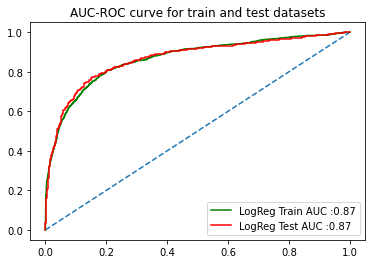

In [457]:
LR_ytrain_pred = LR.predict(X_train)
LR_ytest_pred = LR.predict(X_test)

## Predicting probabilities on train dataset
LR_trainprobs = LR.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LR_trainprobs = LR_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR_testprobs = LR.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LR_testprobs = LR_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR_testprobs),2)
train_label_LR = 'LogReg Train AUC :' + str(train_auc)
test_label_LR = 'LogReg Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR_trainprobs)
fpr_test_LR, tpr_test_LR, thresholds_test_LR = roc_curve(y_test, LR_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_LR)
plt.plot(fpr_test_LR, tpr_test_LR, color='red', label=test_label_LR)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8786322476010272
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.74      0.43      0.54      1246

    accuracy                           0.88      7399
   macro avg       0.82      0.70      0.74      7399
weighted avg       0.87      0.88      0.86      7399

AUC: 0.866


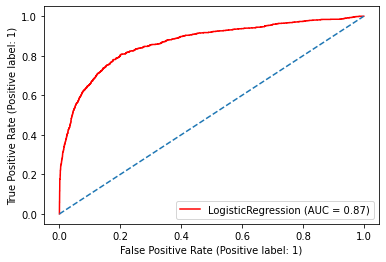

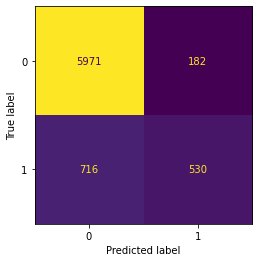

In [458]:
### Evaluation of training dataset

model_eval(LR, X_train, y_train, LR_ytrain_pred, LR_trainprobs)

Accuracy :  0.8789025543992431
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.75      0.43      0.54       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.86      3171

AUC: 0.868


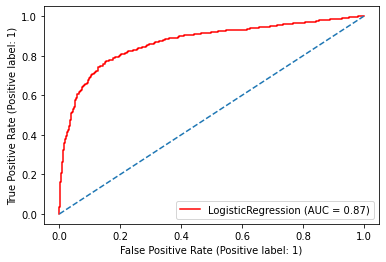

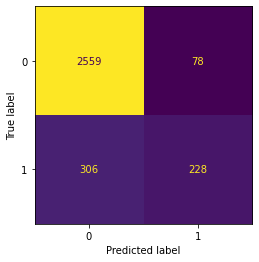

In [459]:
### Evaluation of test dataset

model_eval(LR, X_test, y_test, LR_ytest_pred, LR_testprobs)

## VIF Analysis

In [460]:
X_new = X.copy()

In [461]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_new.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [462]:
calc_vif(X_new).sort_values(by = 'VIF', ascending = False)

variables        VIF
3             Service_Score  17.793832
12                 cashback  10.620876
9            rev_growth_yoy  10.477080
4        Account_user_count   9.091932
5           account_segment   4.919275
14       Payment_Debit Card   4.866189
18   Marital_Status_Married   4.039783
13      Payment_Credit Card   3.940088
2           CC_Contacted_LY   3.638791
20      Login_device_Mobile   3.594056
10  coupon_used_for_payment   3.511902
7             rev_per_month   3.503845
11     Day_Since_CC_connect   3.455877
6            CC_Agent_Score   3.102960
0                    Tenure   2.965124
19    Marital_Status_Single   2.697821
15         Payment_E wallet   2.473847
17              Gender_Male   2.459193
1                 City_Tier   2.085212
16              Payment_UPI   1.668572
8               Complain_ly   1.380018

In [463]:
X_new = X_new.drop('Service_Score', axis = 1)
calc_vif(X_new).sort_values(by = 'VIF', ascending = False)

variables        VIF
11                 cashback  10.493814
8            rev_growth_yoy   9.904275
3        Account_user_count   7.896551
4           account_segment   4.915201
13       Payment_Debit Card   4.693756
17   Marital_Status_Married   3.978611
12      Payment_Credit Card   3.822727
2           CC_Contacted_LY   3.595278
19      Login_device_Mobile   3.546209
6             rev_per_month   3.448108
10     Day_Since_CC_connect   3.444816
9   coupon_used_for_payment   3.394702
5            CC_Agent_Score   3.051868
0                    Tenure   2.962540
18    Marital_Status_Single   2.677106
16              Gender_Male   2.446626
14         Payment_E wallet   2.446283
1                 City_Tier   2.083349
15              Payment_UPI   1.652471
7               Complain_ly   1.377124

In [464]:
X_new = X_new.drop('cashback', axis = 1)
calc_vif(X_new).sort_values(by = 'VIF', ascending = False)

variables       VIF
8            rev_growth_yoy  9.892856
3        Account_user_count  7.671964
12       Payment_Debit Card  4.653504
4           account_segment  4.389722
16   Marital_Status_Married  3.976007
11      Payment_Credit Card  3.783438
2           CC_Contacted_LY  3.595266
18      Login_device_Mobile  3.523123
6             rev_per_month  3.402936
9   coupon_used_for_payment  3.349605
10     Day_Since_CC_connect  3.258998
5            CC_Agent_Score  3.049963
17    Marital_Status_Single  2.677079
0                    Tenure  2.591030
15              Gender_Male  2.435308
13         Payment_E wallet  2.434638
1                 City_Tier  2.079435
14              Payment_UPI  1.644643
7               Complain_ly  1.375621

## Splitting the data again after VIF

In [465]:
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_new, y, test_size=0.30 , random_state=1, stratify=y)

### Hypertuning the model

### Model 1

In [466]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.001,0.0001,0.00001],
     'l1_ratio':[0.25,0.5,0.75]}

In [467]:
model = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1)

In [468]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [469]:
grid_search.fit(X_train_vif, y_train_vif)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'l1_ratio': [0.25, 0.5, 0.75],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [470]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'l1_ratio': 0.25, 'penalty': 'none', 'solver': 'saga', 'tol': 0.0001} 

LogisticRegression(l1_ratio=0.25, max_iter=1000, n_jobs=-1, penalty='none',
                   random_state=1, solver='saga')


In [471]:
LR1 = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1,
                               l1_ratio=0.25,penalty='none',
                               solver='sag', tol=0.001)

In [472]:
LR1 = LR1.fit(X_train_vif, y_train_vif)

In [473]:
### Predicting on train and test dataset

LR1_ytrain_pred = LR1.predict(X_train_vif)
LR1_ytest_pred = LR1.predict(X_test_vif)

## Predicting probabilities on train dataset
LR1_trainprobs = LR1.predict_proba(X_train_vif)
# # keep probabilities for the positive outcome only
LR1_trainprobs = LR1_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR1_testprobs = LR1.predict_proba(X_test_vif)
# # keep probabilities for the positive outcome only
LR1_testprobs = LR1_testprobs[:, 1]

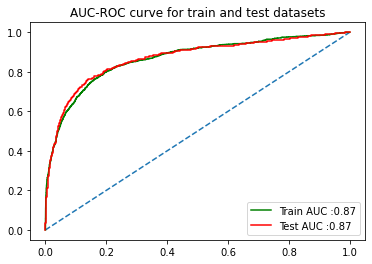

In [474]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train_vif, LR1_trainprobs),2)
test_auc = round(roc_auc_score(y_test_vif, LR1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_vif, LR1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_vif, LR1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8789025543992431
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.74      0.44      0.55      1246

    accuracy                           0.88      7399
   macro avg       0.82      0.70      0.74      7399
weighted avg       0.87      0.88      0.87      7399

AUC: 0.866


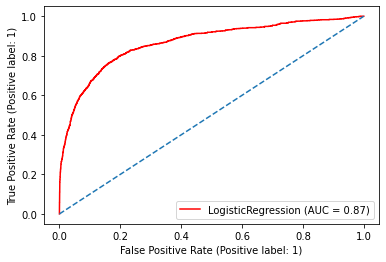

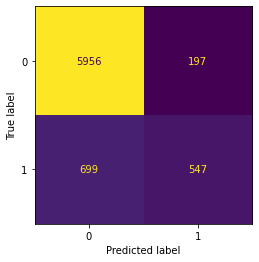

In [475]:
### model evaluation on train dataset
model_eval(LR1, X_train_vif, y_train_vif, LR1_ytrain_pred, LR1_trainprobs)

Accuracy :  0.8795332702617471
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2637
           1       0.74      0.44      0.55       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.869


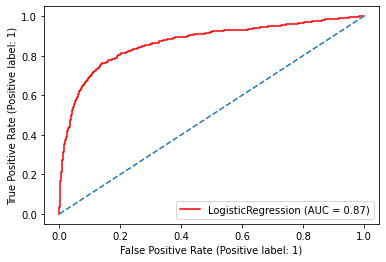

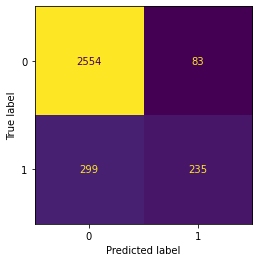

In [476]:
### model evaluation on test dataset
model_eval(LR1, X_test_vif, y_test_vif, LR1_ytest_pred, LR1_testprobs)

### Model 2

In [477]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.01, 0.001,0.0001],
     'l1_ratio':[0.15,0.2,0.25]}

In [478]:
model = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1)

In [479]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [480]:
grid_search.fit(X_train_vif, y_train_vif)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'l1_ratio': [0.15, 0.2, 0.25],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [481]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'l1_ratio': 0.15, 'penalty': 'none', 'solver': 'sag', 'tol': 0.01} 

LogisticRegression(l1_ratio=0.15, max_iter=1000, n_jobs=-1, penalty='none',
                   random_state=1, solver='sag', tol=0.01)


In [482]:
LR2 = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1,
                               l1_ratio=0.15,penalty='none',
                               solver='sag', tol=0.001)

In [483]:
LR2 = LR2.fit(X_train_vif, y_train_vif)

In [484]:
### Predicting on train and test dataset

LR2_ytrain_pred = LR2.predict(X_train_vif)
LR2_ytest_pred = LR2.predict(X_test_vif)

## Predicting probabilities on train dataset
LR2_trainprobs = LR2.predict_proba(X_train_vif)
# # keep probabilities for the positive outcome only
LR2_trainprobs = LR2_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR2_testprobs = LR2.predict_proba(X_test_vif)
# # keep probabilities for the positive outcome only
LR2_testprobs = LR2_testprobs[:, 1]

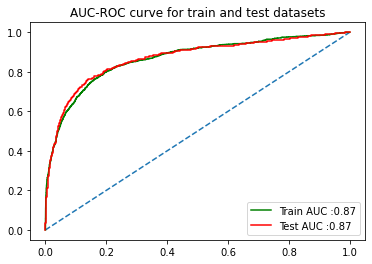

In [485]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train_vif, LR2_trainprobs),2)
test_auc = round(roc_auc_score(y_test_vif, LR2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_vif, LR2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_vif, LR2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8789025543992431
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.74      0.44      0.55      1246

    accuracy                           0.88      7399
   macro avg       0.82      0.70      0.74      7399
weighted avg       0.87      0.88      0.87      7399

AUC: 0.866


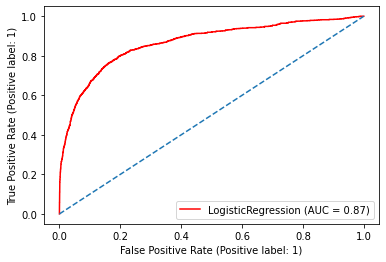

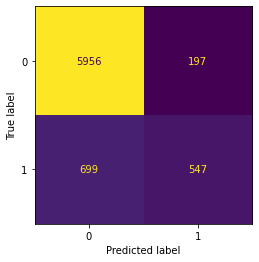

In [486]:
### model evaluation on train dataset
model_eval(LR2, X_train_vif, y_train_vif, LR2_ytrain_pred, LR2_trainprobs)

Accuracy :  0.8795332702617471
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2637
           1       0.74      0.44      0.55       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.869


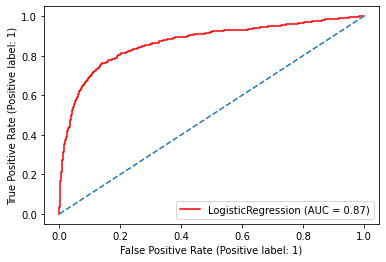

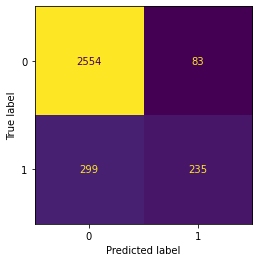

In [487]:
### model evaluation on test dataset
model_eval(LR2, X_test_vif, y_test_vif, LR2_ytest_pred, LR2_testprobs)

### Model 3

In [488]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.01, 0.001,0.0001],
     'l1_ratio':[0.15,0.2,0.25]}

In [489]:
model = LogisticRegression(max_iter=1500,n_jobs=-1,random_state=123)

In [490]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [491]:
grid_search.fit(X_train_vif, y_train_vif)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1500, n_jobs=-1,
                                          random_state=123),
             n_jobs=-1,
             param_grid={'l1_ratio': [0.15, 0.2, 0.25],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [492]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'l1_ratio': 0.15, 'penalty': 'none', 'solver': 'saga', 'tol': 0.01} 

LogisticRegression(l1_ratio=0.15, max_iter=1500, n_jobs=-1, penalty='none',
                   random_state=123, solver='saga', tol=0.01)


In [493]:
LR3 = LogisticRegression(max_iter=1500,n_jobs=-1,random_state=123,
                               l1_ratio=0.15,penalty='none',
                               solver='sag', tol=0.0001)

In [494]:
LR3 = LR3.fit(X_train_vif, y_train_vif)

In [495]:
### Predicting on train and test dataset

LR3_ytrain_pred = LR3.predict(X_train_vif)
LR3_ytest_pred = LR3.predict(X_test_vif)

## Predicting probabilities on train dataset
LR3_trainprobs = LR3.predict_proba(X_train_vif)
# # keep probabilities for the positive outcome only
LR3_trainprobs = LR3_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR3_testprobs = LR3.predict_proba(X_test_vif)
# # keep probabilities for the positive outcome only
LR3_testprobs = LR3_testprobs[:, 1]

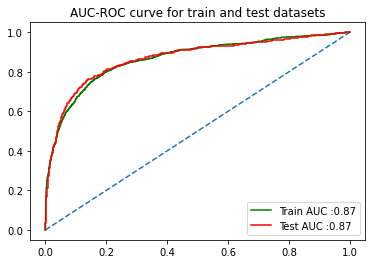

In [496]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train_vif, LR3_trainprobs),2)
test_auc = round(roc_auc_score(y_test_vif, LR3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_vif, LR3_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_vif, LR3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8789025543992431
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.74      0.44      0.55      1246

    accuracy                           0.88      7399
   macro avg       0.82      0.70      0.74      7399
weighted avg       0.87      0.88      0.87      7399

AUC: 0.866


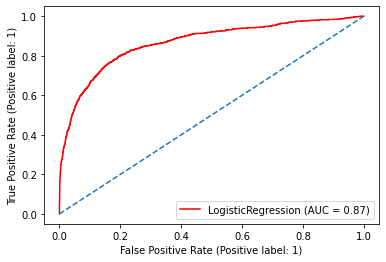

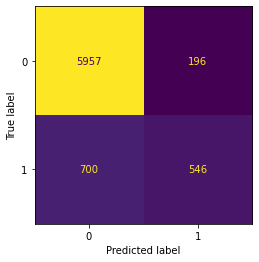

In [497]:
### model evaluation on train dataset
model_eval(LR3, X_train_vif, y_train_vif, LR3_ytrain_pred, LR3_trainprobs)

Accuracy :  0.8792179123304951
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.74      0.44      0.55       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.869


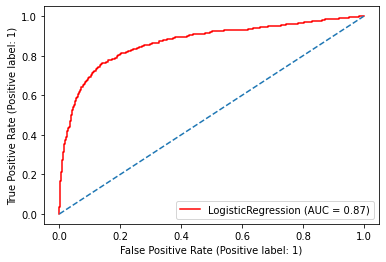

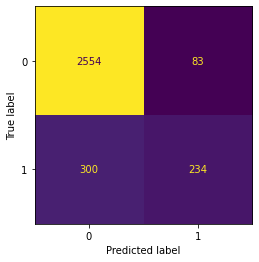

In [498]:
### model evaluation on test dataset
model_eval(LR3, X_test_vif, y_test_vif, LR3_ytest_pred, LR3_testprobs)

### Model 4

In [499]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.01, 0.001,0.0001],
     'l1_ratio':[0.15,0.2,0.25]}

In [500]:
model = LogisticRegression(max_iter=2000,n_jobs=-1,random_state=123)

In [501]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [502]:
grid_search.fit(X_train_vif, y_train_vif)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, n_jobs=-1,
                                          random_state=123),
             n_jobs=-1,
             param_grid={'l1_ratio': [0.15, 0.2, 0.25],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [503]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'l1_ratio': 0.15, 'penalty': 'none', 'solver': 'saga', 'tol': 0.01} 

LogisticRegression(l1_ratio=0.15, max_iter=2000, n_jobs=-1, penalty='none',
                   random_state=123, solver='saga', tol=0.01)


In [504]:
LR4 = LogisticRegression(max_iter=2000,n_jobs=-1,random_state=1,
                               l1_ratio=0.15,penalty='none',
                               solver='sag', tol=0.01)

In [505]:
LR4 = LR4.fit(X_train_vif, y_train_vif)

In [506]:
### Predicting on train and test dataset

LR4_ytrain_pred = LR4.predict(X_train_vif)
LR4_ytest_pred = LR4.predict(X_test_vif)

## Predicting probabilities on train dataset
LR4_trainprobs = LR4.predict_proba(X_train_vif)
# # keep probabilities for the positive outcome only
LR4_trainprobs = LR4_trainprobs[:, 1]

## Predicting probabilities on test dataset
LR4_testprobs = LR4.predict_proba(X_test_vif)
# # keep probabilities for the positive outcome only
LR4_testprobs = LR4_testprobs[:, 1]

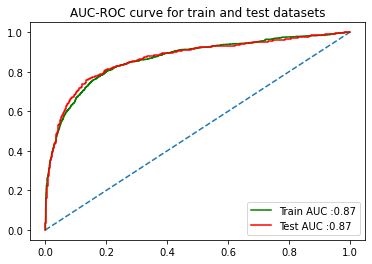

In [507]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train_vif, LR4_trainprobs),2)
test_auc = round(roc_auc_score(y_test_vif, LR4_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_vif, LR4_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_vif, LR4_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8793080145965672
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6153
           1       0.73      0.44      0.55      1246

    accuracy                           0.88      7399
   macro avg       0.81      0.71      0.74      7399
weighted avg       0.87      0.88      0.87      7399

AUC: 0.866


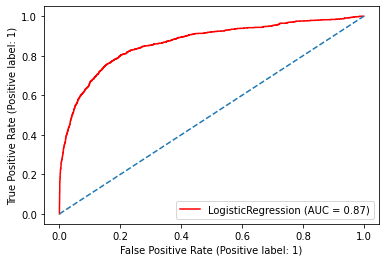

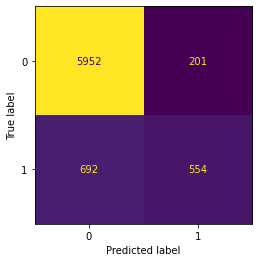

In [508]:
### model evaluation on train dataset
model_eval(LR4, X_train_vif, y_train_vif, LR4_ytrain_pred, LR4_trainprobs)

Accuracy :  0.8792179123304951
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.74      0.44      0.55       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.869


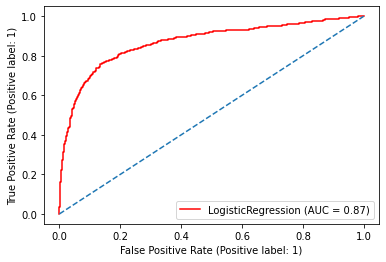

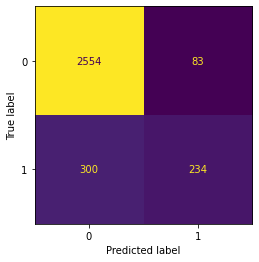

In [509]:
### model evaluation on test dataset
model_eval(LR4, X_test_vif, y_test_vif, LR4_ytest_pred, LR4_testprobs)

In [510]:
## 5-fold cross validation on full data
LR_cv = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1,
                               l1_ratio=0.25,penalty='none',
                               solver='sag', tol=0.001)
scores = cross_val_score(LR_cv, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.46613546, 0.53846154, 0.54861111, 0.58544839, 0.58320127]),
 0.544371553624763)

In [511]:
## 10-fold cross validation on full data
LR_cv = LogisticRegression(max_iter=1000,n_jobs=-1,random_state=1,
                               l1_ratio=0.25,penalty='none',
                               solver='sag', tol=0.001)
scores = cross_val_score(LR_cv, X, y, cv=10,scoring='f1')
scores, scores.mean()

(array([0.50387597, 0.45238095, 0.54945055, 0.52554745, 0.55363322,
        0.54982818, 0.55      , 0.62379421, 0.5875    , 0.56187291]),
 0.5457883434684108)

### Model 5 using Stats Model

In [512]:
## Statsmodel requires X and y variables to be part of the same dataset. Identification of y is done in the formula.
train_df = pd.concat([X_train_vif, y_train_vif], axis=1)
test_df = pd.concat([X_test_vif, y_test_vif], axis=1)

In [513]:
train_df['Churn']=train_df['Churn'].astype('int64')
test_df['Churn']=test_df['Churn'].astype('int64')

In [514]:
train_df.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_Male', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Mobile', 'Churn'],
      dtype='object')

In [515]:
train_df.rename(columns = {'Payment_Credit Card':'Payment_Credit_Card'}, inplace = True)
train_df.rename(columns = {'Payment_Debit Card':'Payment_Debit_Card'}, inplace = True)
train_df.rename(columns = {'Payment_E wallet':'Payment_E_wallet'}, inplace = True)

In [516]:
train_df.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'Payment_Credit_Card', 'Payment_Debit_Card', 'Payment_E_wallet',
       'Payment_UPI', 'Gender_Male', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Mobile', 'Churn'],
      dtype='object')

In [517]:
test_df.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_Male', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Mobile', 'Churn'],
      dtype='object')

In [518]:
test_df.rename(columns = {'Payment_Credit Card':'Payment_Credit_Card'}, inplace = True)
test_df.rename(columns = {'Payment_Debit Card':'Payment_Debit_Card'}, inplace = True)
test_df.rename(columns = {'Payment_E wallet':'Payment_E_wallet'}, inplace = True)

In [519]:
test_df.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'Payment_Credit_Card', 'Payment_Debit_Card', 'Payment_E_wallet',
       'Payment_UPI', 'Gender_Male', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Mobile', 'Churn'],
      dtype='object')

In [520]:
f_1 = 'Churn ~ Tenure + City_Tier + CC_Contacted_LY + Account_user_count +\
       account_segment + CC_Agent_Score + rev_per_month + Complain_ly +\
       rev_growth_yoy + coupon_used_for_payment + Day_Since_CC_connect +\
       Payment_Credit_Card + Payment_Debit_Card + Payment_E_wallet +\
       Payment_UPI + Gender_Male + Marital_Status_Married +\
       Marital_Status_Single + Login_device_Mobile'

In [521]:
LR5 = SM.logit(formula = f_1, data=train_df).fit()

Optimization terminated successfully.
         Current function value: 0.308102
         Iterations 8


In [522]:
LR5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7399
Model:                          Logit   Df Residuals:                     7379
Method:                           MLE   Df Model:                           19
Date:                Wed, 22 Feb 2023   Pseudo R-squ.:                  0.3204
Time:                        23:34:25   Log-Likelihood:                -2279.6
converged:                       True   LL-Null:                       -3354.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.2953      0.261     -8.799      0.000      -2.807      -1.784
Tenure                     -6.4058      0.280    -22.846      0.000      -6.955      -5.856
City_Tier                   0.4533      0.094      4.837      0.000       0.270       0.637
CC_Contacted_LY             0.8468      0.164      5.168      0.000       0.526       1.168
Account_user_count          1.7447      0.204      8.567      0.000       1.346       2.144
account_segment            -0.3576      0.175     -2.039      0.041      -0.701      -0.014
CC_Agent_Score              1.2018      0.115     10.482      0.000       0.977       1.426
rev_per_month               1.3133      0.158      8.324      0.000       1.004       1.623
Complain_ly                 1.6263      0.080     20.413      0.000       1.470       1.782
rev_growth_yoy             -0.7927      0.254     -3.125      0.002      -1.290      -0.296
coupon_used_for_payment     0.5944      0.140      4.244      0.000       0.320       0.869
Day_Since_CC_connect       -1.4300      0.210     -6.824      0.000      -1.841      -1.019
Payment_Credit_Card        -0.6270      0.136     -4.620      0.000      -0.893      -0.361
Payment_Debit_Card         -0.5069      0.130     -3.898      0.000      -0.762      -0.252
Payment_E_wallet           -0.1304      0.168     -0.775      0.438      -0.460       0.199
Payment_UPI                -0.7850      0.183     -4.293      0.000      -1.143      -0.427
Gender_Male                 0.2130      0.079      2.708      0.007       0.059       0.367
Marital_Status_Married     -0.3503      0.112     -3.118      0.002      -0.571      -0.130
Marital_Status_Single       0.5946      0.115      5.185      0.000       0.370       0.819
Login_device_Mobile        -0.4507      0.083     -5.440      0.000      -0.613      -0.288
===========================================================================================
"""

In [523]:
LR5_trainprobs = LR5.predict(train_df)
LR5_testprobs = LR5.predict(test_df)

In [524]:
## Getting the binary predictions for train dataset with threshold = 0.5
LR5_ytrain_pred =[]
for i in range(0,len(LR5_trainprobs)):
    if np.array(LR5_trainprobs)[i]>0.5:
        a=1
    else:
        a=0
    LR5_ytrain_pred.append(a)

In [525]:
## Getting the binary predictions for test dataset with threshold = 0.5
LR5_ytest_pred =[]
for i in range(0,len(LR5_testprobs)):
    if np.array(LR5_testprobs)[i]>0.5:
        a=1
    else:
        a=0
    LR5_ytest_pred.append(a)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.74      0.44      0.55      1246

    accuracy                           0.88      7399
   macro avg       0.82      0.70      0.74      7399
weighted avg       0.87      0.88      0.87      7399



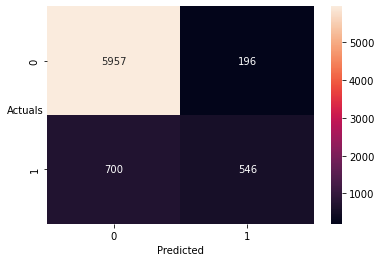

In [526]:
## Evaluating model performance on train dataset
print(classification_report(train_df['Churn'],LR5_ytrain_pred))

sns.heatmap((confusion_matrix(train_df['Churn'],LR5_ytrain_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.74      0.44      0.55       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171



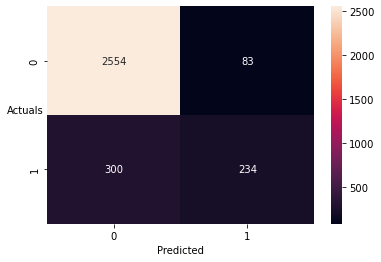

In [527]:
### Evaluating model performance on test dataset

print(classification_report(test_df['Churn'],LR5_ytest_pred))

sns.heatmap((confusion_matrix(test_df['Churn'],LR5_ytest_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

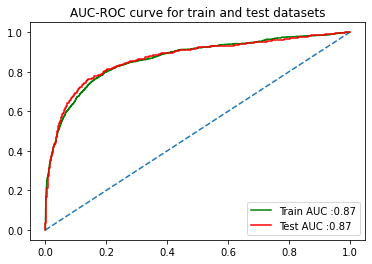

In [528]:
### ROC-AUC curve

# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR5_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR5_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR5_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR5_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

### Model 6 using Stats Model

In [588]:
LR6 = SM.logit(formula = f_1, data=train_df).fit()

Optimization terminated successfully.
         Current function value: 0.308102
         Iterations 8


In [589]:
LR6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7399
Model:                          Logit   Df Residuals:                     7379
Method:                           MLE   Df Model:                           19
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.3204
Time:                        00:19:41   Log-Likelihood:                -2279.6
converged:                       True   LL-Null:                       -3354.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.2953      0.261     -8.799      0.000      -2.807      -1.784
Tenure                     -6.4058      0.280    -22.846      0.000      -6.955      -5.856
City_Tier                   0.4533      0.094      4.837      0.000       0.270       0.637
CC_Contacted_LY             0.8468      0.164      5.168      0.000       0.526       1.168
Account_user_count          1.7447      0.204      8.567      0.000       1.346       2.144
account_segment            -0.3576      0.175     -2.039      0.041      -0.701      -0.014
CC_Agent_Score              1.2018      0.115     10.482      0.000       0.977       1.426
rev_per_month               1.3133      0.158      8.324      0.000       1.004       1.623
Complain_ly                 1.6263      0.080     20.413      0.000       1.470       1.782
rev_growth_yoy             -0.7927      0.254     -3.125      0.002      -1.290      -0.296
coupon_used_for_payment     0.5944      0.140      4.244      0.000       0.320       0.869
Day_Since_CC_connect       -1.4300      0.210     -6.824      0.000      -1.841      -1.019
Payment_Credit_Card        -0.6270      0.136     -4.620      0.000      -0.893      -0.361
Payment_Debit_Card         -0.5069      0.130     -3.898      0.000      -0.762      -0.252
Payment_E_wallet           -0.1304      0.168     -0.775      0.438      -0.460       0.199
Payment_UPI                -0.7850      0.183     -4.293      0.000      -1.143      -0.427
Gender_Male                 0.2130      0.079      2.708      0.007       0.059       0.367
Marital_Status_Married     -0.3503      0.112     -3.118      0.002      -0.571      -0.130
Marital_Status_Single       0.5946      0.115      5.185      0.000       0.370       0.819
Login_device_Mobile        -0.4507      0.083     -5.440      0.000      -0.613      -0.288
===========================================================================================
"""

In [591]:
LR6_trainprobs = LR6.predict(train_df)
LR6_testprobs = LR6.predict(test_df)

In [593]:
## Getting the binary predictions for train dataset with threshold = 0.5
LR6_ytrain_pred =[]
for i in range(0,len(LR6_trainprobs)):
    if np.array(LR6_trainprobs)[i]>0.4:
        a=1
    else:
        a=0
    LR6_ytrain_pred.append(a)

In [594]:
## Getting the binary predictions for test dataset with threshold = 0.5
LR6_ytest_pred =[]
for i in range(0,len(LR6_testprobs)):
    if np.array(LR6_testprobs)[i]>0.4:
        a=1
    else:
        a=0
    LR6_ytest_pred.append(a)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6153
           1       0.66      0.56      0.61      1246

    accuracy                           0.88      7399
   macro avg       0.79      0.75      0.77      7399
weighted avg       0.87      0.88      0.87      7399



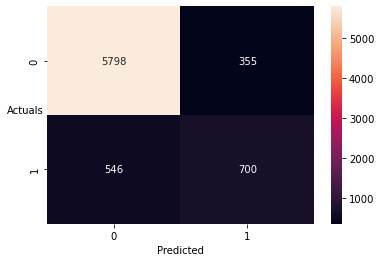

In [595]:
## Evaluating model performance on train dataset
print(classification_report(train_df['Churn'],LR6_ytrain_pred))

sns.heatmap((confusion_matrix(train_df['Churn'],LR6_ytrain_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2637
           1       0.68      0.58      0.63       534

    accuracy                           0.88      3171
   macro avg       0.80      0.76      0.78      3171
weighted avg       0.88      0.88      0.88      3171



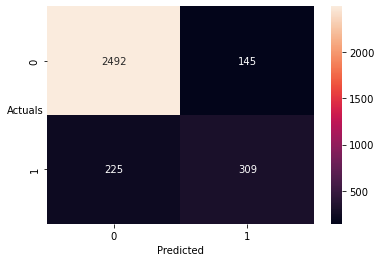

In [596]:
### Evaluating model performance on test dataset

print(classification_report(test_df['Churn'],LR6_ytest_pred))

sns.heatmap((confusion_matrix(test_df['Churn'],LR6_ytest_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

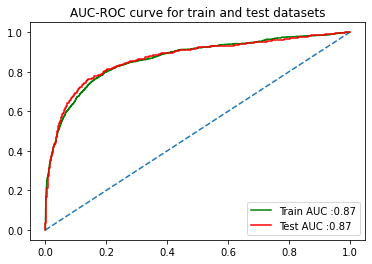

In [597]:
### ROC-AUC curve

# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LR6_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LR6_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LR6_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR6_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

## Linear Discriminant Analysis (LDA)

In [529]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

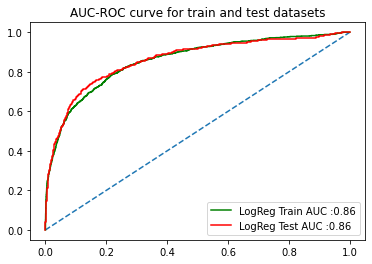

In [530]:
LDA_ytrain_pred = LDA.predict(X_train)
LDA_ytest_pred = LDA.predict(X_test)

## Predicting probabilities on train dataset
LDA_trainprobs = LDA.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA_trainprobs = LDA_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA_testprobs = LDA.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA_testprobs = LDA_testprobs[:, 1]


# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LDA_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA_testprobs),2)
train_label_LDA = 'LogReg Train AUC :' + str(train_auc)
test_label_LDA = 'LogReg Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA_trainprobs)
fpr_test_LDA, tpr_test_LDA, thresholds_test_LDA = roc_curve(y_test, LDA_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label_LDA)
plt.plot(fpr_test_LDA, tpr_test_LDA, color='red', label=test_label_LDA)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8734964184349236
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.72      0.41      0.52      1246

    accuracy                           0.87      7399
   macro avg       0.80      0.69      0.72      7399
weighted avg       0.86      0.87      0.86      7399

AUC: 0.857


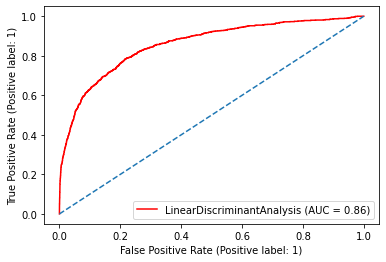

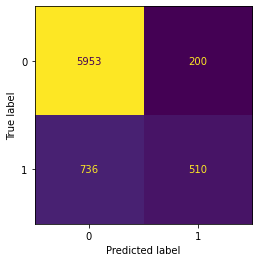

In [531]:
### Evaluation of training dataset

model_eval(LDA, X_train, y_train, LDA_ytrain_pred, LDA_trainprobs)

Accuracy :  0.8795332702617471
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.75      0.42      0.54       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.861


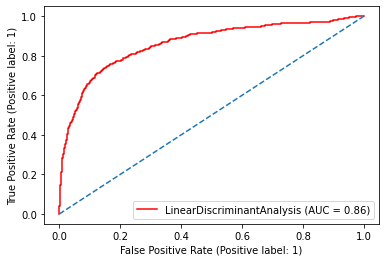

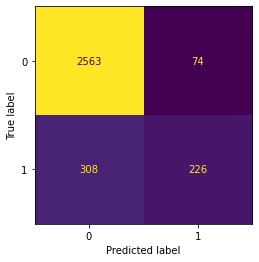

In [532]:
### Evaluation of test dataset

model_eval(LDA, X_test, y_test, LDA_ytest_pred, LDA_testprobs)

## Hypertuning the model

### Model 1

In [545]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.001, 0.0001,0.00001], 
     'shrinkage':['auto', float, 'None']}

In [546]:
model = LinearDiscriminantAnalysis()

In [547]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

In [548]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', <class 'float'>, 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [549]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [551]:
LDA1 = LinearDiscriminantAnalysis(shrinkage='auto', solver = 'lsqr', tol= 0.001)

In [552]:
LDA1 = LDA1.fit(X_train, y_train)

In [553]:
### Predicting on train and test dataset

LDA1_ytrain_pred = LDA1.predict(X_train)
LDA1_ytest_pred = LDA1.predict(X_test)

## Predicting probabilities on train dataset
LDA1_trainprobs = LDA1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA1_trainprobs = LDA1_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA1_testprobs = LDA1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA1_testprobs = LDA1_testprobs[:, 1]

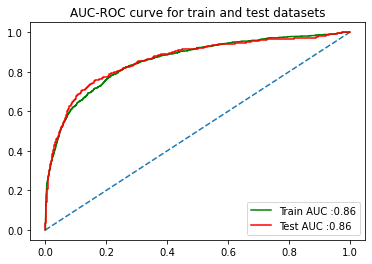

In [554]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LDA1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LDA1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8743073388295716
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.73      0.41      0.52      1246

    accuracy                           0.87      7399
   macro avg       0.81      0.69      0.72      7399
weighted avg       0.86      0.87      0.86      7399

AUC: 0.857


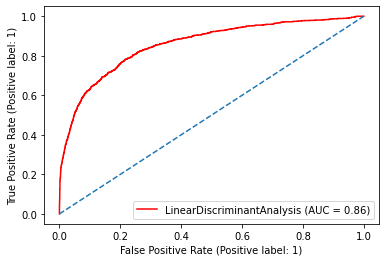

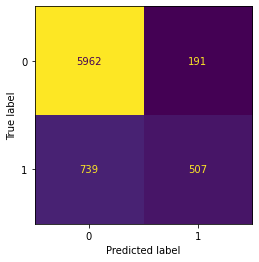

In [555]:
### model evaluation on train dataset
model_eval(LDA1, X_train, y_train, LDA1_ytrain_pred, LDA1_trainprobs)

Accuracy :  0.879848628192999
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.76      0.42      0.54       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.861


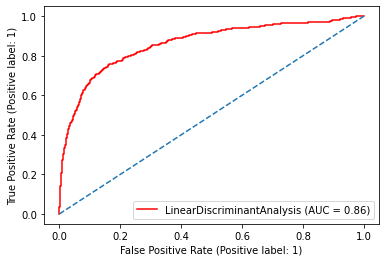

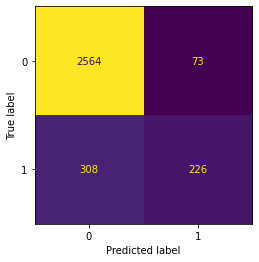

In [557]:
### model evaluation on test dataset
model_eval(LDA1, X_test, y_test, LDA1_ytest_pred, LDA1_testprobs)

### Model 2

In [564]:
grid={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.01], 
     'shrinkage':['auto', float, 'None']}

In [565]:
model = LinearDiscriminantAnalysis()

In [566]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

In [567]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', <class 'float'>, 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'], 'tol': [0.01]},
             scoring='f1')

In [568]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.01} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.01)


In [570]:
LDA2 = LinearDiscriminantAnalysis(shrinkage='auto', solver = 'lsqr', tol= 0.01)

In [571]:
LDA2 = LDA2.fit(X_train, y_train)

In [572]:
### Predicting on train and test dataset

LDA2_ytrain_pred = LDA2.predict(X_train)
LDA2_ytest_pred = LDA2.predict(X_test)

## Predicting probabilities on train dataset
LDA2_trainprobs = LDA2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA2_trainprobs = LDA2_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA2_testprobs = LDA2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA2_testprobs = LDA2_testprobs[:, 1]

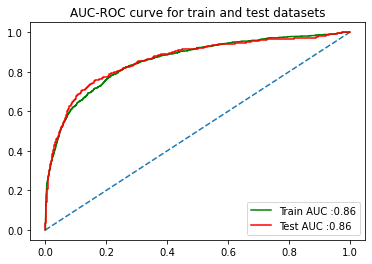

In [573]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LDA2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LDA2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8743073388295716
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.73      0.41      0.52      1246

    accuracy                           0.87      7399
   macro avg       0.81      0.69      0.72      7399
weighted avg       0.86      0.87      0.86      7399

AUC: 0.857


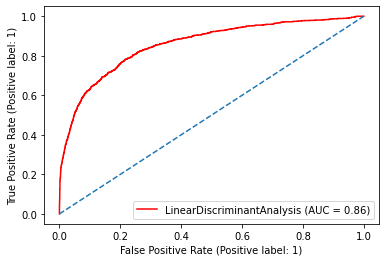

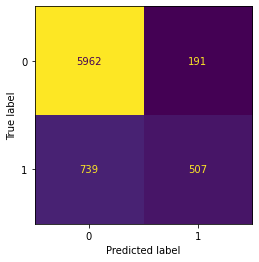

In [575]:
### model evaluation on train dataset
model_eval(LDA2, X_train, y_train, LDA2_ytrain_pred, LDA2_trainprobs)

Accuracy :  0.879848628192999
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.76      0.42      0.54       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.861


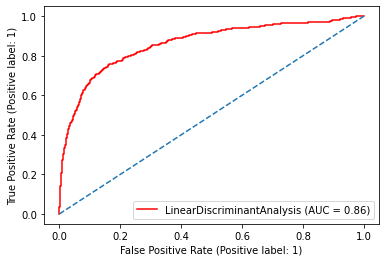

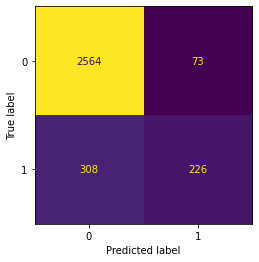

In [576]:
### model evaluation on test dataset
model_eval(LDA2, X_test, y_test, LDA2_ytest_pred, LDA2_testprobs)

### Model 3

In [577]:
grid={'solver':['eigen'],
      'tol':[0.001], 
     'shrinkage':['auto', float, 'None']}

In [578]:
model = LinearDiscriminantAnalysis()

In [579]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

In [580]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', <class 'float'>, 'None'],
                         'solver': ['eigen'], 'tol': [0.001]},
             scoring='f1')

In [581]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'eigen', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen', tol=0.001)


In [582]:
LDA3 = LinearDiscriminantAnalysis(shrinkage='auto', solver = 'eigen', tol= 0.001)

In [583]:
LDA3 = LDA3.fit(X_train, y_train)

In [584]:
### Predicting on train and test dataset

LDA3_ytrain_pred = LDA3.predict(X_train)
LDA3_ytest_pred = LDA3.predict(X_test)

## Predicting probabilities on train dataset
LDA3_trainprobs = LDA3.predict_proba(X_train)
# # keep probabilities for the positive outcome only
LDA3_trainprobs = LDA3_trainprobs[:, 1]

## Predicting probabilities on test dataset
LDA3_testprobs = LDA3.predict_proba(X_test)
# # keep probabilities for the positive outcome only
LDA3_testprobs = LDA3_testprobs[:, 1]

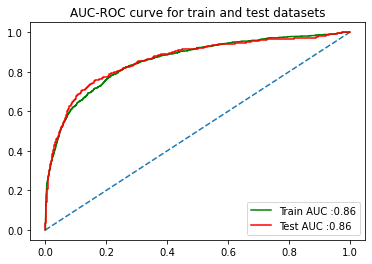

In [585]:
# # calculate roc curve
train_auc = round(roc_auc_score(y_train, LDA3_trainprobs),2)
test_auc = round(roc_auc_score(y_test, LDA3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, LDA3_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LDA3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8743073388295716
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6153
           1       0.73      0.41      0.52      1246

    accuracy                           0.87      7399
   macro avg       0.81      0.69      0.72      7399
weighted avg       0.86      0.87      0.86      7399

AUC: 0.857


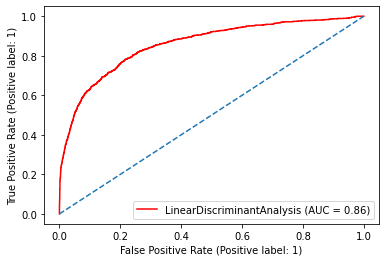

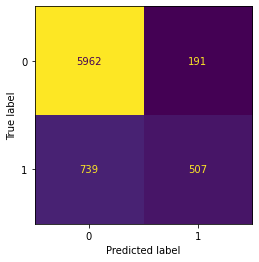

In [586]:
### model evaluation on train dataset
model_eval(LDA3, X_train, y_train, LDA3_ytrain_pred, LDA3_trainprobs)

Accuracy :  0.879848628192999
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2637
           1       0.76      0.42      0.54       534

    accuracy                           0.88      3171
   macro avg       0.82      0.70      0.74      3171
weighted avg       0.87      0.88      0.87      3171

AUC: 0.861


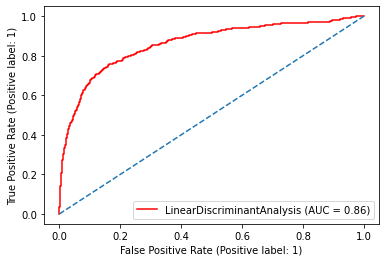

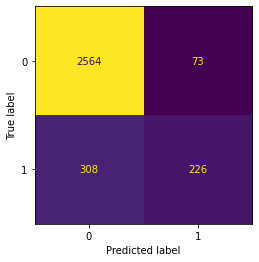

In [587]:
### model evaluation on test dataset
model_eval(LDA3, X_test, y_test, LDA3_ytest_pred, LDA3_testprobs)

In [558]:
## 5-fold cross validation on full data
LDA_cv = LinearDiscriminantAnalysis(shrinkage='auto', solver = 'lsqr', tol= 0.001)
scores = cross_val_score(LDA_cv, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.45213849, 0.49253731, 0.54419411, 0.57632933, 0.56351792]),
 0.5257434320225249)

In [559]:
## 10-fold cross validation on full data
LDA_cv = LinearDiscriminantAnalysis(shrinkage='auto', solver = 'lsqr', tol= 0.001)
scores = cross_val_score(LDA_cv, X, y, cv=10,scoring='f1')
scores, scores.mean()

(array([0.48031496, 0.45528455, 0.50187266, 0.48148148, 0.5467128 ,
        0.54166667, 0.54676259, 0.59210526, 0.57594937, 0.54035088]),
 0.5262501220935337)

## Artificial Neural Network (ANN)

### ANN - Model 1

In [248]:
ANN = MLPClassifier(verbose=True, random_state=123, max_iter=1000)

In [249]:
ANN.fit(X_train, y_train)

Iteration 1, loss = 0.45131843
Iteration 2, loss = 0.40269224
Iteration 3, loss = 0.36926458
Iteration 4, loss = 0.34617154
Iteration 5, loss = 0.33230493
Iteration 6, loss = 0.32341988
Iteration 7, loss = 0.31748489
Iteration 8, loss = 0.31305282
Iteration 9, loss = 0.31058607
Iteration 10, loss = 0.30789877
Iteration 11, loss = 0.30495801
Iteration 12, loss = 0.30309798
Iteration 13, loss = 0.30122252
Iteration 14, loss = 0.29960003
Iteration 15, loss = 0.29862646
Iteration 16, loss = 0.29652522
Iteration 17, loss = 0.29577895
Iteration 18, loss = 0.29308440
Iteration 19, loss = 0.29359221
Iteration 20, loss = 0.29143963
Iteration 21, loss = 0.28856185
Iteration 22, loss = 0.28738032
Iteration 23, loss = 0.28576261
Iteration 24, loss = 0.28433556
Iteration 25, loss = 0.28304670
Iteration 26, loss = 0.28154669
Iteration 27, loss = 0.27999150
Iteration 28, loss = 0.27787328
Iteration 29, loss = 0.27723836
Iteration 30, loss = 0.27532932
Iteration 31, loss = 0.27388658
Iteration 32, los

MLPClassifier(max_iter=1000, random_state=123, verbose=True)

In [250]:
### Predicting on train and test dataset
ANN_ytrain_pred = ANN.predict(X_train)
ANN_ytest_pred = ANN.predict(X_test)

In [251]:
## Predicting probabilities on train dataset
ANN_trainprobs = ANN.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ANN_trainprobs = ANN_trainprobs[:, 1]

## Predicting probabilities on test dataset
ANN_testprobs = ANN.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ANN_testprobs = ANN_testprobs[:, 1]

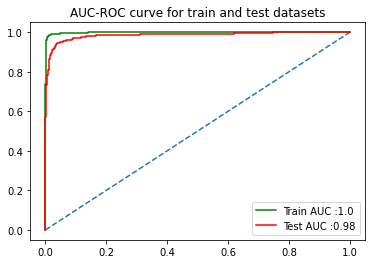

In [252]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ANN_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ANN_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ANN_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ANN_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.989458034869577
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6153
           1       0.98      0.95      0.97      1246

    accuracy                           0.99      7399
   macro avg       0.99      0.97      0.98      7399
weighted avg       0.99      0.99      0.99      7399

AUC: 0.999


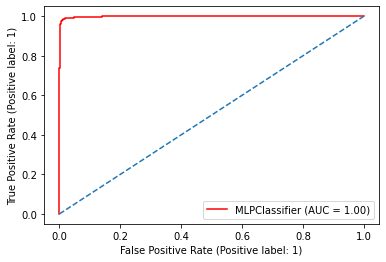

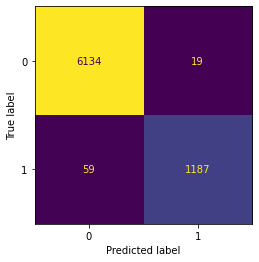

In [253]:
### Evaluation of training dataset
model_eval(ANN, X_train, y_train, ANN_ytrain_pred, ANN_trainprobs)

Accuracy :  0.9662567013560391
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2637
           1       0.93      0.86      0.90       534

    accuracy                           0.97      3171
   macro avg       0.95      0.92      0.94      3171
weighted avg       0.97      0.97      0.97      3171

AUC: 0.985


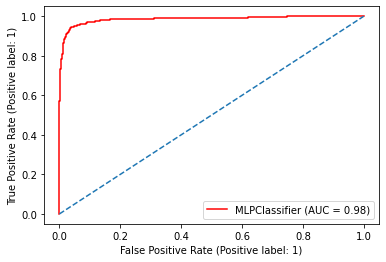

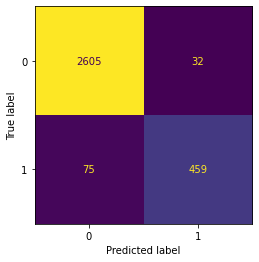

In [254]:
### Evaluation of test dataset
model_eval(ANN, X_test, y_test, ANN_ytest_pred, ANN_testprobs)

### Hypertuning the model

### ANN - Model 2

In [255]:
param_grid = {
    'hidden_layer_sizes': [100, 150],
    'max_iter': [1500],
    'solver': ['sgd','adam','lbfgs'],
    'tol': [0.01,0.001,0.0001],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001,0.001,0.01]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 5, scoring='f1')

In [256]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [100, 150], 'max_iter': [1500],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [257]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': 150,
 'max_iter': 1500,
 'solver': 'adam',
 'tol': 0.0001}

In [495]:
ANN2 = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=150, solver='adam', tol=0.0001, random_state=123, max_iter=1500)

ANN2.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=150, max_iter=1500,
              random_state=123)

In [496]:
ANN2_ytrain_pred = ANN2.predict(X_train)
ANN2_ytest_pred = ANN2.predict(X_test)

In [497]:
## Predicting probabilities on train dataset
ANN2_trainprobs = ANN2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ANN2_trainprobs = ANN2_trainprobs[:, 1]

## Predicting probabilities on test dataset
ANN2_testprobs = ANN2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ANN2_testprobs = ANN2_testprobs[:, 1]

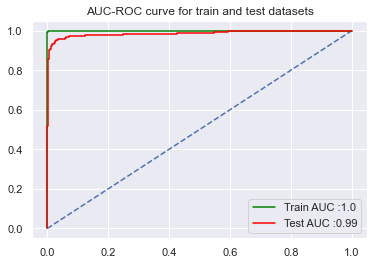

In [498]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ANN2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ANN2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ANN2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ANN2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9974320854169483
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      0.99      0.99      1246

    accuracy                           1.00      7399
   macro avg       1.00      0.99      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


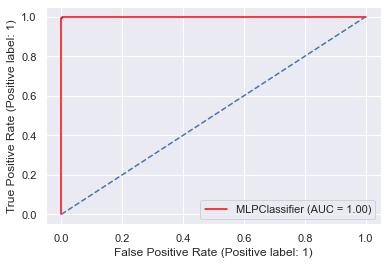

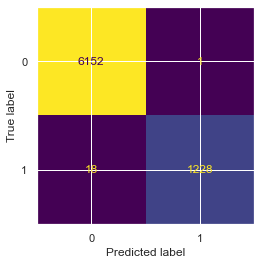

In [499]:
### Evaluation of training dataset
model_eval(ANN2, X_train, y_train, ANN2_ytrain_pred, ANN2_trainprobs)

Accuracy :  0.9760327972248503
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2637
           1       0.96      0.89      0.93       534

    accuracy                           0.98      3171
   macro avg       0.97      0.94      0.96      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.986


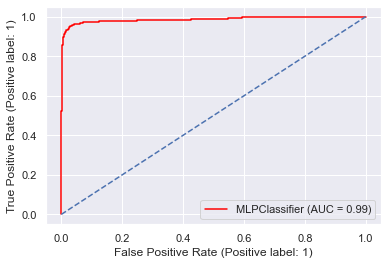

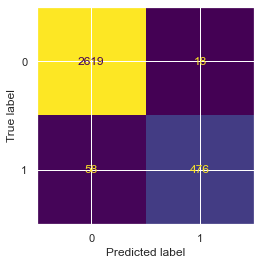

In [500]:
### Evaluation of test dataset
model_eval(ANN2, X_test, y_test, ANN2_ytest_pred, ANN2_testprobs)

### ANN - Model 3

In [264]:
param_grid = {
    'hidden_layer_sizes': [90,100,150],
    'max_iter': [2000, 2500],
    'solver': ['sgd','adam','lbfgs'],
    'tol': [0.01,0.001,0.0001],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001,0.001,0.01]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 5, scoring='f1')

In [265]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [90, 100, 150],
                         'max_iter': [2000, 2500],
                         'solver': ['sgd', 'adam', 'lbfgs'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='f1')

In [266]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': 150,
 'max_iter': 2000,
 'solver': 'adam',
 'tol': 0.0001}

In [267]:
ANN3 = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=90, solver='adam', tol=0.0001, random_state=123, max_iter=2000)

ANN3.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=90, max_iter=2000,
              random_state=123)

In [268]:
ANN3_ytrain_pred = ANN3.predict(X_train)
ANN3_ytest_pred = ANN3.predict(X_test)

In [269]:
## Predicting probabilities on train dataset
ANN3_trainprobs = ANN3.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ANN3_trainprobs = ANN3_trainprobs[:, 1]

## Predicting probabilities on test dataset
ANN3_testprobs = ANN3.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ANN3_testprobs = ANN3_testprobs[:, 1]

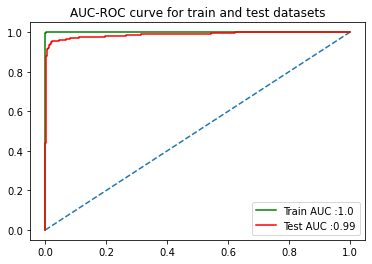

In [270]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ANN3_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ANN3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ANN3_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ANN3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9997296932017841
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


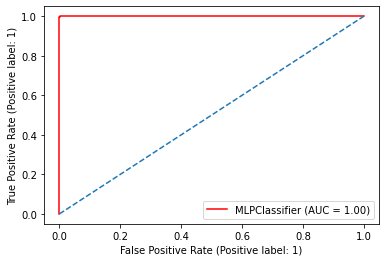

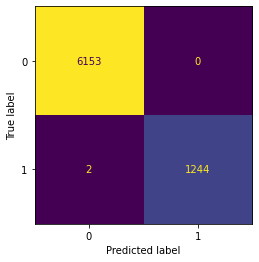

In [271]:
### Evaluation of training dataset
model_eval(ANN3, X_train, y_train, ANN3_ytrain_pred, ANN3_trainprobs)

Accuracy :  0.9801324503311258
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2637
           1       0.97      0.91      0.94       534

    accuracy                           0.98      3171
   macro avg       0.98      0.95      0.96      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.988


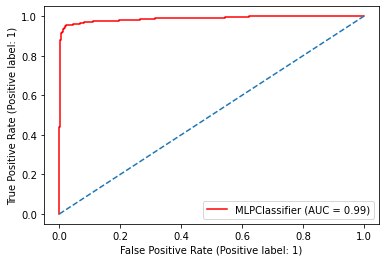

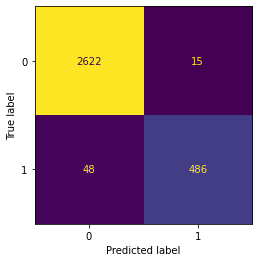

In [272]:
### Evaluation of test dataset
model_eval(ANN3, X_test, y_test, ANN3_ytest_pred, ANN3_testprobs)

### ANN - Model 4

In [273]:
param_grid = {
    'hidden_layer_sizes': [80],
    'max_iter': [1000],
    'solver': ['sgd','adam','lbfgs'],
    'tol': [0.01,0.001],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.001,0.01]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 5, scoring='f1')

In [274]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.01], 'hidden_layer_sizes': [80],
                         'max_iter': [1000], 'solver': ['sgd', 'adam', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [275]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': 80,
 'max_iter': 1000,
 'solver': 'lbfgs',
 'tol': 0.001}

In [276]:
ANN4 = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=80, solver='adam', tol=0.0001, random_state=123, max_iter=1000)

ANN4.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=80,
              max_iter=1000, random_state=123)

In [277]:
ANN4_ytrain_pred = ANN4.predict(X_train)
ANN4_ytest_pred = ANN4.predict(X_test)

In [278]:
## Predicting probabilities on train dataset
ANN4_trainprobs = ANN4.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ANN4_trainprobs = ANN4_trainprobs[:, 1]

## Predicting probabilities on test dataset
ANN4_testprobs = ANN4.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ANN4_testprobs = ANN4_testprobs[:, 1]

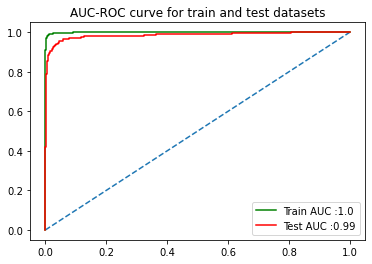

In [279]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ANN4_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ANN4_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ANN4_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ANN4_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9912150290579808
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6153
           1       1.00      0.95      0.97      1246

    accuracy                           0.99      7399
   macro avg       0.99      0.98      0.98      7399
weighted avg       0.99      0.99      0.99      7399

AUC: 0.999


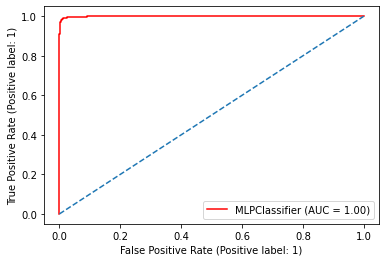

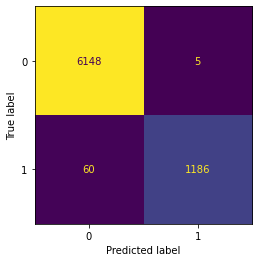

In [280]:
### Evaluation of training dataset
model_eval(ANN4, X_train, y_train, ANN4_ytrain_pred, ANN4_trainprobs)

Accuracy :  0.9713024282560706
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2637
           1       0.95      0.87      0.91       534

    accuracy                           0.97      3171
   macro avg       0.96      0.93      0.95      3171
weighted avg       0.97      0.97      0.97      3171

AUC: 0.985


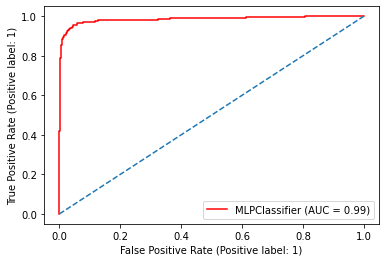

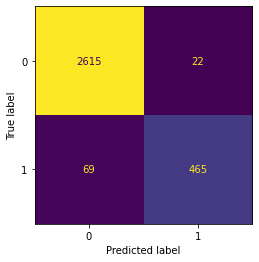

In [281]:
### Evaluation of test dataset
model_eval(ANN4, X_test, y_test, ANN4_ytest_pred, ANN4_testprobs)

In [282]:
## 5-fold cross validation on full data
ANN_cv = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=90, solver='adam', tol=0.0001, random_state=123, max_iter=2000)
scores = cross_val_score(ANN_cv, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.93390805, 0.93255132, 0.94476744, 0.92669433, 0.92264416]),
 0.9321130599640037)

In [283]:
## 10-fold cross validation on full data
ANN_cv = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=90, solver='adam', tol=0.0001, random_state=123, max_iter=2000)
scores = cross_val_score(ANN_cv, X, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.95072464, 0.95480226, 0.93036212, 0.93255132, 0.93714286,
        0.96398892, 0.94586895, 0.93820225, 0.95677233, 0.9226361 ]),
 0.9433051741524118)

In [284]:
imps = permutation_importance(ANN3, X_test, y_test)

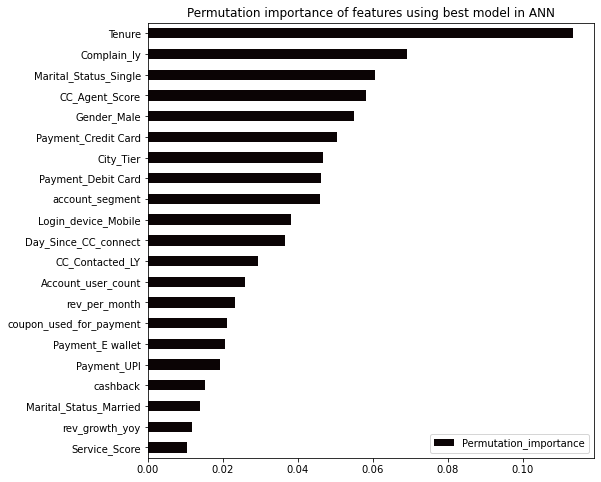

In [285]:
imp_df = pd.DataFrame(imps.importances_mean, columns=['Permutation_importance'], index = X.columns)
## plotting graph
imp_df = imp_df.sort_values(by='Permutation_importance')
imp_df.plot(kind='barh', cmap='mako', figsize=(8,8))
plt.title("Permutation importance of features using best model in ANN")
plt.show();

## K-Nearest Neighbour

In [286]:
KNN=KNeighborsClassifier() # number of neighbours by default is 5
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [287]:
### Predicting on train and test dataset
KNN_ytrain_pred = KNN.predict(X_train)
KNN_ytest_pred = KNN.predict(X_test)

## Predicting probabilities on train dataset
KNN_trainprobs = KNN.predict_proba(X_train)
# # keep probabilities for the positive outcome only
KNN_trainprobs = KNN_trainprobs[:, 1]

## Predicting probabilities on test dataset
KNN_testprobs = KNN.predict_proba(X_test)
# # keep probabilities for the positive outcome only
KNN_testprobs = KNN_testprobs[:, 1]

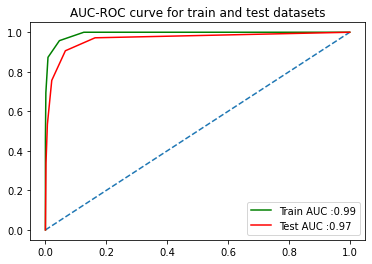

In [288]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, KNN_trainprobs),2)
test_auc = round(roc_auc_score(y_test, KNN_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, KNN_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, KNN_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9716177861873226
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6153
           1       0.95      0.87      0.91      1246

    accuracy                           0.97      7399
   macro avg       0.96      0.93      0.95      7399
weighted avg       0.97      0.97      0.97      7399

AUC: 0.993


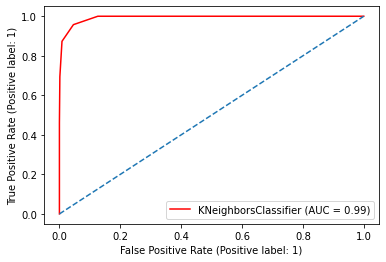

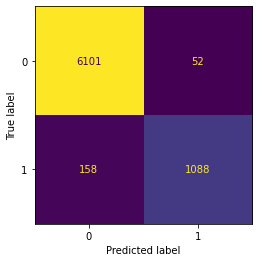

In [289]:
### Evaluation of training dataset
model_eval(KNN, X_train, y_train, KNN_ytrain_pred, KNN_trainprobs)

Accuracy :  0.9416587827183853
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2637
           1       0.88      0.76      0.81       534

    accuracy                           0.94      3171
   macro avg       0.92      0.87      0.89      3171
weighted avg       0.94      0.94      0.94      3171

AUC: 0.966


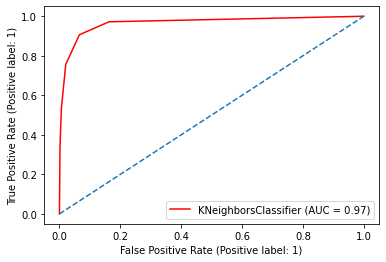

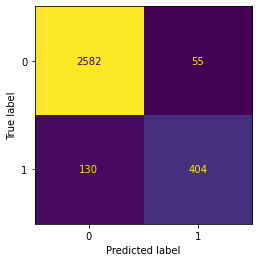

In [290]:
### Evaluation of test dataset
model_eval(KNN, X_test, y_test, KNN_ytest_pred, KNN_testprobs)

### Tuning with different values of K

In [291]:
ac_f1scores = []
ac_scores = []

# perform accuracy metrics for values from 1,3,5....25
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_ytest_pred = knn.predict(X_test)
    # evaluate test f1_score, accuracy
    f1scores = f1_score(y_test, knn_ytest_pred)
    scores = knn.score(X_test, y_test)
    ac_f1scores.append(f1scores)
    ac_scores.append(scores)

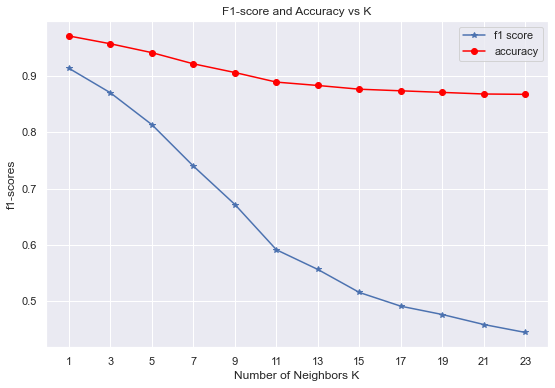

In [292]:
sns.set()
plt.figure(figsize=(9,6))
plt.plot(range(1,25,2), ac_f1scores, marker='*', label='f1 score')
plt.plot(range(1,25,2), ac_scores, marker='o', color='red', label='accuracy')
plt.xlabel('Number of Neighbors K')
plt.xticks(range(1,25,2))
plt.ylabel('f1-scores')
plt.legend()
plt.title("F1-score and Accuracy vs K");

### Hyptertuning the model

In [293]:
param_grid = {
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
    'metric': ['minkowski','chebyshev']
}

KNN = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 3, scoring='f1') 

In [294]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'chebyshev'], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [295]:
grid_search.best_params_

{'algorithm': 'auto', 'metric': 'minkowski', 'p': 1, 'weights': 'distance'}

In [296]:
KNN_best = KNeighborsClassifier(algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance') ##default n_neighbours=5

In [297]:
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [298]:
### Predicting on train and test dataset
KNN_best_ytrain_pred = KNN_best.predict(X_train)
KNN_best_ytest_pred = KNN_best.predict(X_test)

## Predicting probabilities on train dataset
KNN_best_trainprobs = KNN_best.predict_proba(X_train)
# # keep probabilities for the positive outcome only
KNN_best_trainprobs = KNN_best_trainprobs[:, 1]

## Predicting probabilities on test dataset
KNN_best_testprobs = KNN_best.predict_proba(X_test)
# # keep probabilities for the positive outcome only
KNN_best_testprobs = KNN_best_testprobs[:, 1]


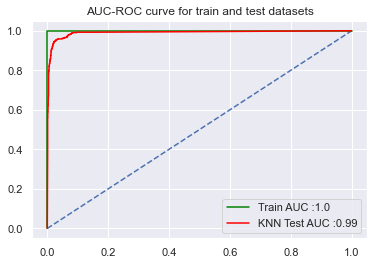

In [299]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, KNN_best_trainprobs),2)
test_auc = round(roc_auc_score(y_test, KNN_best_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_knn = 'KNN Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, KNN_best_trainprobs)
fpr_test_knn, tpr_test_knn, thresholds_test_knn = roc_curve(y_test, KNN_best_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_knn, tpr_test_knn, color='red', label=test_label_knn)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


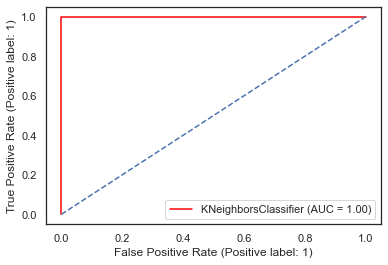

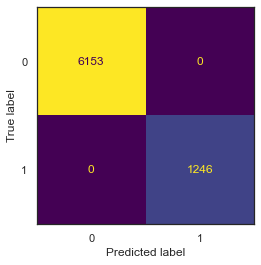

In [300]:
### Evaluation of training dataset
sns.set_style("white")
model_eval(KNN_best, X_train, y_train, KNN_best_ytrain_pred, KNN_best_trainprobs)

Accuracy :  0.9697256385998108
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2637
           1       0.94      0.88      0.91       534

    accuracy                           0.97      3171
   macro avg       0.96      0.93      0.94      3171
weighted avg       0.97      0.97      0.97      3171

AUC: 0.990


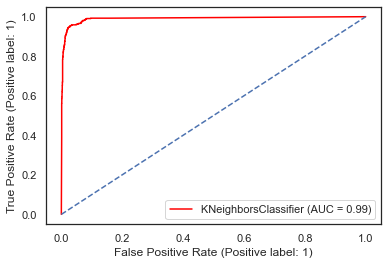

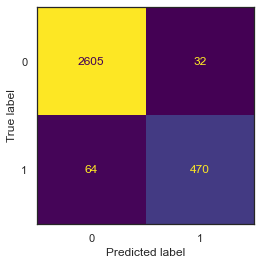

In [301]:
### Evaluation of test dataset
model_eval(KNN_best, X_test, y_test, KNN_best_ytest_pred, KNN_best_testprobs)

In [302]:
## 5-fold cross validation on train data
clf = KNeighborsClassifier(n_neighbors=5,algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
scores, scores.mean()

(array([0.87866109, 0.85287846, 0.88412017, 0.90759754, 0.88935282]),
 0.8825220157329182)

In [303]:
## 5-fold cross validation on full data
clf = KNeighborsClassifier(n_neighbors=5,algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance')
scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.96022727, 0.95375723, 0.96590909, 0.96875   , 0.92682927]),
 0.9550945714725145)

In [304]:
## 10-fold cross validation on full data
clf = KNeighborsClassifier(n_neighbors=5,algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance')
scores = cross_val_score(clf, X, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.97175141, 0.96590909, 0.95428571, 0.95652174, 0.96296296,
        0.97159091, 0.96022727, 0.96067416, 0.98005698, 0.91860465]),
 0.9602584890058907)

## Random Forest

In [305]:
RF = RandomForestClassifier(random_state=123, oob_score=True)

In [306]:
RF.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123)

In [307]:
### Predicting on train and test dataset
RF_ytrain_pred = RF.predict(X_train)
RF_ytest_pred = RF.predict(X_test)

In [308]:
## Predicting probabilities on train dataset
RF_trainprobs = RF.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF_trainprobs = RF_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF_testprobs = RF.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF_testprobs = RF_testprobs[:, 1]

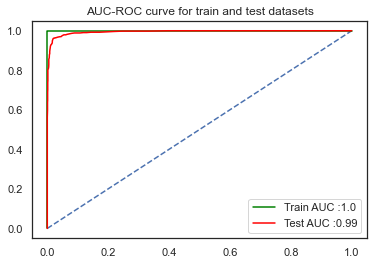

In [309]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


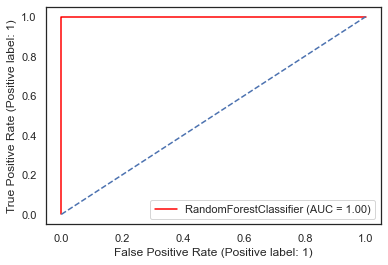

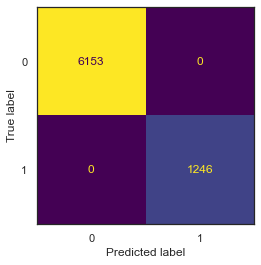

In [310]:
### Evaluation of training dataset
model_eval(RF, X_train, y_train, RF_ytrain_pred, RF_trainprobs)

Accuracy :  0.967202775149795
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2637
           1       0.97      0.83      0.89       534

    accuracy                           0.97      3171
   macro avg       0.97      0.91      0.94      3171
weighted avg       0.97      0.97      0.97      3171

AUC: 0.995


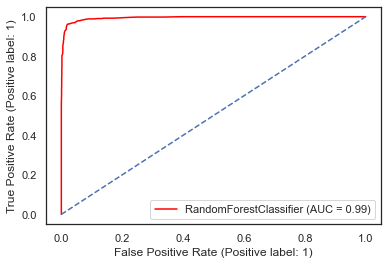

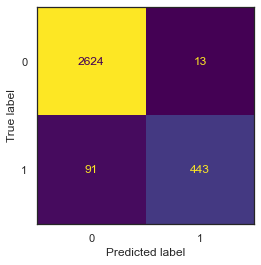

In [311]:
### Evaluation of test dataset
model_eval(RF, X_test, y_test, RF_ytest_pred, RF_testprobs)

In [312]:
RF.oob_score_

0.9593188268684958

In [313]:
pd.DataFrame(RF.feature_importances_, index = X.columns, columns=['Feature importance'])

Feature importance
Tenure                             0.243421
City_Tier                          0.025843
CC_Contacted_LY                    0.071804
Service_Score                      0.021656
Account_user_count                 0.040026
account_segment                    0.039863
CC_Agent_Score                     0.056665
rev_per_month                      0.056706
Complain_ly                        0.062109
rev_growth_yoy                     0.063743
coupon_used_for_payment            0.030217
Day_Since_CC_connect               0.066970
cashback                           0.087420
Payment_Credit Card                0.018272
Payment_Debit Card                 0.015756
Payment_E wallet                   0.012513
Payment_UPI                        0.006731
Gender_Male                        0.019300
Marital_Status_Married             0.014723
Marital_Status_Single              0.025664
Login_device_Mobile                0.020597

### Hypertuning the model

In [314]:
param_grid1 = {
    'max_depth': [5,7,10],
    'max_features': [4,5,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [101,201,301]
}
  
param_grid2 = {
    'max_depth': [11],
    'max_features': [8,9,10],
    'min_samples_leaf': [4],
    'min_samples_split': [40],
    'n_estimators': [101,151]
}

param_grid3 = {
    'max_depth': [13,14,15],
    'max_features': [15,16],
    'min_samples_leaf': [3],
    'min_samples_split': [30,20],
    'n_estimators': [101]
}

param_grid4 = {
    'max_depth': [15,16,17],
    'max_features': [16,17],
    'min_samples_leaf': [3],
    'min_samples_split': [20,10],
    'n_estimators': [101]
}

param_grid5 = {
    'max_depth': [17,18,19],
    'max_features': [16,17],
    'min_samples_leaf': [2,3],
    'min_samples_split': [8,7,6],
    'n_estimators': [101,151]
}

param_grid6 = {
    'max_depth': [19,20,21],
    'max_features': [16],
    'min_samples_leaf': [2],
    'min_samples_split': [6],
    'n_estimators': [121,151,171]
}

param_grid7 = {
    'max_depth': [19,20],
    'max_features': [16,17],
    'min_samples_leaf': [2],
    'min_samples_split': [2,3,4,5],
    'n_estimators': [121]
}

param_grid8 = {
    'max_depth': [20,21,22],
    'max_features': [16,17,18],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3],
    'n_estimators': [121,151]
}

### Random Forest - Model 1

In [315]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid1, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [101, 201, 301]},
             scoring='f1')

In [316]:
grid_search.best_score_

0.6777895130836308

In [317]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 101}

In [318]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=101, random_state=0)

In [319]:
RF1 = RandomForestClassifier(random_state=123,max_depth= 10, max_features= 6, min_samples_leaf= 5, min_samples_split= 50, n_estimators= 201)
RF1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=201,
                       random_state=123)

In [320]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 101}

In [321]:
### Predicting on train and test dataset
RF1_ytrain_pred = RF1.predict(X_train)
RF1_ytest_pred = RF1.predict(X_test)

## Predicting probabilities on train dataset
RF1_trainprobs = RF1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF1_trainprobs = RF1_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF1_testprobs = RF1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF1_testprobs = RF1_testprobs[:, 1]

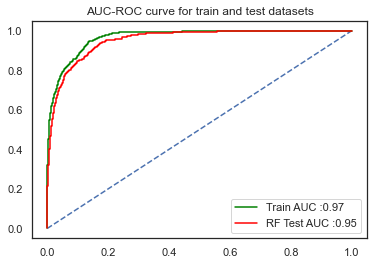

In [322]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF1_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [323]:
## Predicting probabilities on train dataset
RF1_trainprobs = RF1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF1_trainprobs = RF1_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF1_testprobs = RF1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF1_testprobs = RF1_testprobs[:, 1]

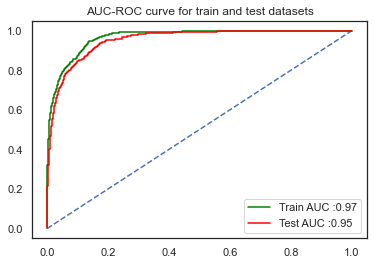

In [324]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9245844032977429
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6153
           1       0.91      0.62      0.73      1246

    accuracy                           0.92      7399
   macro avg       0.92      0.80      0.84      7399
weighted avg       0.92      0.92      0.92      7399

AUC: 0.967


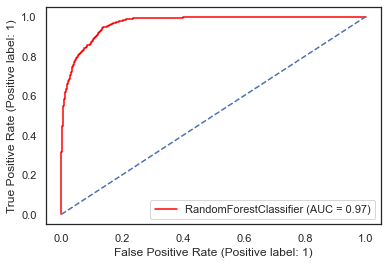

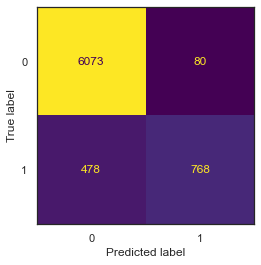

In [325]:
### Evaluation of training dataset
model_eval(RF1, X_train, y_train, RF1_ytrain_pred, RF1_trainprobs)

Accuracy :  0.9151687164932198
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2637
           1       0.85      0.60      0.70       534

    accuracy                           0.92      3171
   macro avg       0.89      0.79      0.83      3171
weighted avg       0.91      0.92      0.91      3171

AUC: 0.953


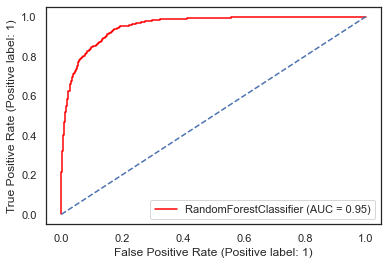

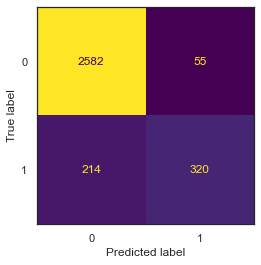

In [326]:
### Evaluation of test dataset
model_eval(RF1, X_test, y_test, RF1_ytest_pred, RF1_testprobs)

### Random Forest - Model 2

In [327]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid2, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [11], 'max_features': [8, 9, 10],
                         'min_samples_leaf': [4], 'min_samples_split': [40],
                         'n_estimators': [101, 151]},
             scoring='f1')

In [328]:
grid_search.best_score_

0.6946008412199023

In [329]:
grid_search.best_params_

{'max_depth': 11,
 'max_features': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 40,
 'n_estimators': 151}

In [330]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, max_features=9, min_samples_leaf=4,
                       min_samples_split=40, n_estimators=151, random_state=0)

In [331]:
RF2 = RandomForestClassifier(random_state=123,max_depth= 11, max_features= 9, min_samples_leaf= 4, min_samples_split= 40, n_estimators= 151)
RF2.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=9, min_samples_leaf=4,
                       min_samples_split=40, n_estimators=151,
                       random_state=123)

In [332]:
grid_search.best_params_

{'max_depth': 11,
 'max_features': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 40,
 'n_estimators': 151}

In [333]:
### Predicting on train and test dataset
RF2_ytrain_pred = RF2.predict(X_train)
RF2_ytest_pred = RF2.predict(X_test)

## Predicting probabilities on train dataset
RF2_trainprobs = RF2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF2_trainprobs = RF2_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF2_testprobs = RF2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF2_testprobs = RF2_testprobs[:, 1]

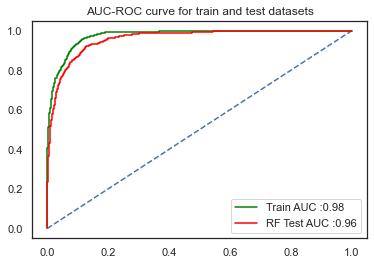

In [334]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF2_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [335]:
## Predicting probabilities on train dataset
RF2_trainprobs = RF2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF2_trainprobs = RF2_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF2_testprobs = RF2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF2_testprobs = RF2_testprobs[:, 1]

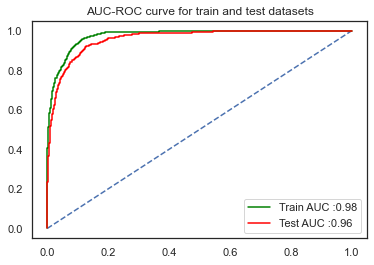

In [336]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9324233004460062
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6153
           1       0.90      0.67      0.77      1246

    accuracy                           0.93      7399
   macro avg       0.92      0.83      0.87      7399
weighted avg       0.93      0.93      0.93      7399

AUC: 0.976


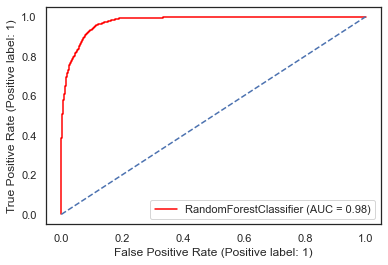

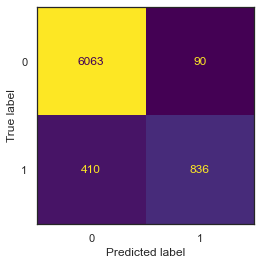

In [337]:
### Evaluation of training dataset
model_eval(RF2, X_train, y_train, RF2_ytrain_pred, RF2_trainprobs)

Accuracy :  0.9183222958057395
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2637
           1       0.84      0.63      0.72       534

    accuracy                           0.92      3171
   macro avg       0.89      0.81      0.84      3171
weighted avg       0.91      0.92      0.91      3171

AUC: 0.959


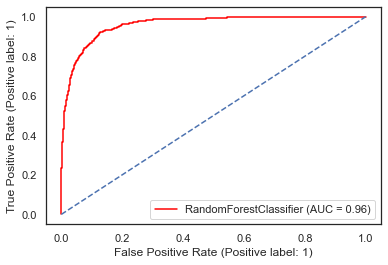

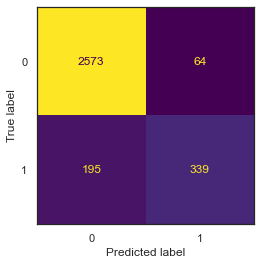

In [338]:
### Evaluation of test dataset
model_eval(RF2, X_test, y_test, RF2_ytest_pred, RF2_testprobs)

### Random Forest - Model 3

In [339]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid3, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [13, 14, 15], 'max_features': [15, 16],
                         'min_samples_leaf': [3], 'min_samples_split': [30, 20],
                         'n_estimators': [101]},
             scoring='f1')

In [340]:
grid_search.best_score_

0.7524302625975988

In [341]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'n_estimators': 101}

In [342]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=16, min_samples_leaf=3,
                       min_samples_split=20, n_estimators=101, random_state=0)

In [343]:
RF3 = RandomForestClassifier(random_state=123,max_depth= 14, max_features= 16, min_samples_leaf= 3, min_samples_split= 20, n_estimators= 101)
RF3.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, max_features=16, min_samples_leaf=3,
                       min_samples_split=20, n_estimators=101,
                       random_state=123)

In [344]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'n_estimators': 101}

In [345]:
### Predicting on train and test dataset
RF3_ytrain_pred = RF3.predict(X_train)
RF3_ytest_pred = RF3.predict(X_test)

## Predicting probabilities on train dataset
RF3_trainprobs = RF3.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF3_trainprobs = RF3_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF3_testprobs = RF3.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF3_testprobs = RF3_testprobs[:, 1]

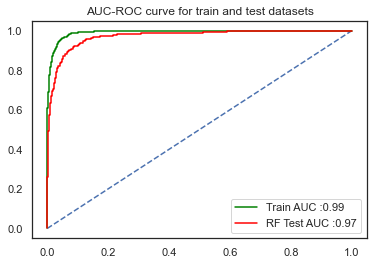

In [346]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF3_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF3_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [347]:
## Predicting probabilities on train dataset
RF3_trainprobs = RF3.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF3_trainprobs = RF3_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF3_testprobs = RF3.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF3_testprobs = RF3_testprobs[:, 1]

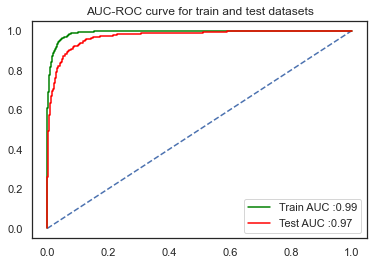

In [348]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF3_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF3_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9583727530747398
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6153
           1       0.95      0.79      0.87      1246

    accuracy                           0.96      7399
   macro avg       0.95      0.89      0.92      7399
weighted avg       0.96      0.96      0.96      7399

AUC: 0.992


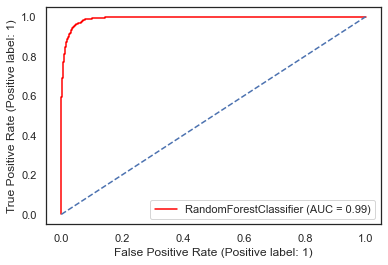

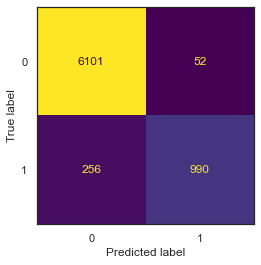

In [349]:
### Evaluation of training dataset
model_eval(RF3, X_train, y_train, RF3_ytrain_pred, RF3_trainprobs)

Accuracy :  0.934090192368338
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2637
           1       0.88      0.71      0.78       534

    accuracy                           0.93      3171
   macro avg       0.91      0.84      0.87      3171
weighted avg       0.93      0.93      0.93      3171

AUC: 0.972


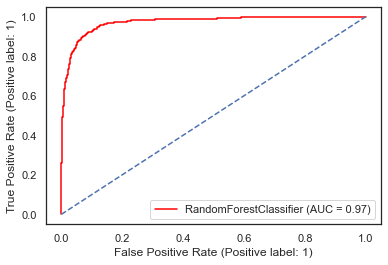

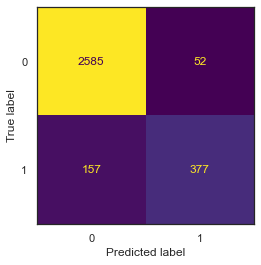

In [350]:
### Evaluation of test dataset
model_eval(RF3, X_test, y_test, RF3_ytest_pred, RF3_testprobs)

### Random Forest - Model 4

In [351]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid4, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [15, 16, 17], 'max_features': [16, 17],
                         'min_samples_leaf': [3], 'min_samples_split': [20, 10],
                         'n_estimators': [101]},
             scoring='f1')

In [352]:
grid_search.best_score_

0.7917860559804931

In [353]:
grid_search.best_params_

{'max_depth': 17,
 'max_features': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 101}

In [354]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=17, max_features=16, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=101, random_state=0)

In [355]:
RF4 = RandomForestClassifier(random_state=123,max_depth= 16, max_features= 17, min_samples_leaf= 3, min_samples_split= 10, n_estimators= 101)
RF4.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, max_features=17, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=101,
                       random_state=123)

In [356]:
grid_search.best_params_

{'max_depth': 17,
 'max_features': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 101}

In [357]:
### Predicting on train and test dataset
RF4_ytrain_pred = RF4.predict(X_train)
RF4_ytest_pred = RF4.predict(X_test)

## Predicting probabilities on train dataset
RF4_trainprobs = RF4.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF4_trainprobs = RF4_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF4_testprobs = RF4.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF4_testprobs = RF4_testprobs[:, 1]

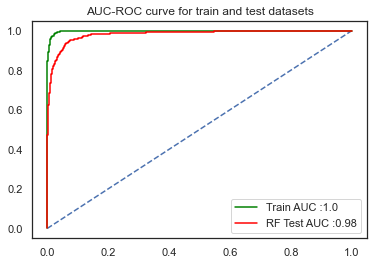

In [358]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF4_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF4_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF4_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF4_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [359]:
## Predicting probabilities on train dataset
RF4_trainprobs = RF4.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF4_trainprobs = RF4_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF4_testprobs = RF4.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF4_testprobs = RF4_testprobs[:, 1]

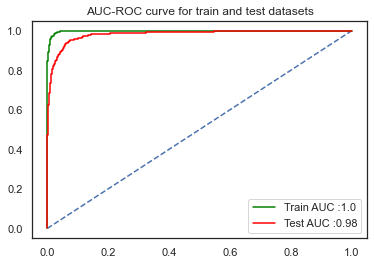

In [360]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF4_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF4_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF4_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF4_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9789160697391539
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6153
           1       0.98      0.89      0.93      1246

    accuracy                           0.98      7399
   macro avg       0.98      0.95      0.96      7399
weighted avg       0.98      0.98      0.98      7399

AUC: 0.998


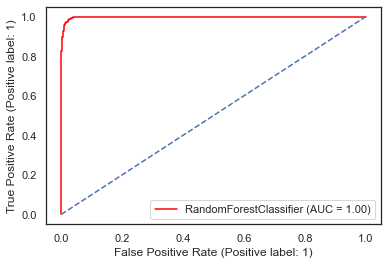

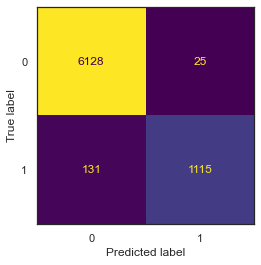

In [361]:
### Evaluation of training dataset
model_eval(RF4, X_train, y_train, RF4_ytrain_pred, RF4_trainprobs)

Accuracy :  0.9523809523809523
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2637
           1       0.92      0.78      0.85       534

    accuracy                           0.95      3171
   macro avg       0.94      0.88      0.91      3171
weighted avg       0.95      0.95      0.95      3171

AUC: 0.982


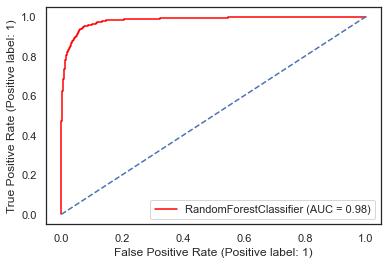

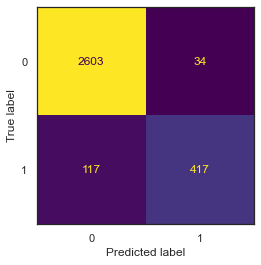

In [362]:
### Evaluation of test dataset
model_eval(RF4, X_test, y_test, RF4_ytest_pred, RF4_testprobs)

### Random Forest - Model 5

In [363]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid5, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [17, 18, 19], 'max_features': [16, 17],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [8, 7, 6],
                         'n_estimators': [101, 151]},
             scoring='f1')

In [364]:
grid_search.best_score_

0.8159111183458055

In [365]:
grid_search.best_params_

{'max_depth': 19,
 'max_features': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 151}

In [366]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=19, max_features=17, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=151, random_state=0)

In [367]:
RF5 = RandomForestClassifier(random_state=123,max_depth= 17, max_features= 16, min_samples_leaf= 2, min_samples_split= 6, n_estimators= 101)
RF5.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, max_features=16, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=101, random_state=123)

In [368]:
grid_search.best_params_

{'max_depth': 19,
 'max_features': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 151}

In [369]:
### Predicting on train and test dataset
RF5_ytrain_pred = RF5.predict(X_train)
RF5_ytest_pred = RF5.predict(X_test)

## Predicting probabilities on train dataset
RF5_trainprobs = RF5.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF5_trainprobs = RF5_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF5_testprobs = RF5.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF5_testprobs = RF5_testprobs[:, 1]

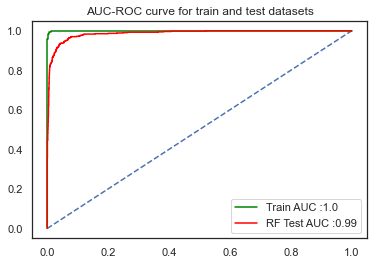

In [370]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF5_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF5_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF5_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF5_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [371]:
## Predicting probabilities on train dataset
RF5_trainprobs = RF5.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF5_trainprobs = RF5_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF5_testprobs = RF5.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF5_testprobs = RF5_testprobs[:, 1]

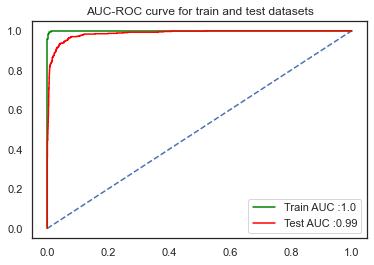

In [372]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF5_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF5_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF5_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF5_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9920259494526288
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6153
           1       1.00      0.95      0.98      1246

    accuracy                           0.99      7399
   macro avg       0.99      0.98      0.99      7399
weighted avg       0.99      0.99      0.99      7399

AUC: 1.000


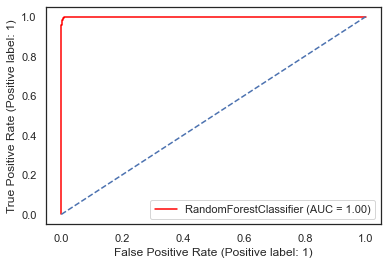

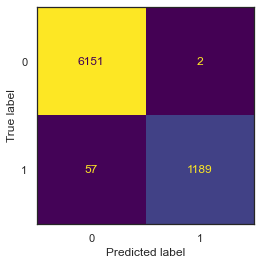

In [373]:
### Evaluation of training dataset
model_eval(RF5, X_train, y_train, RF5_ytrain_pred, RF5_trainprobs)

Accuracy :  0.9624724061810155
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2637
           1       0.95      0.82      0.88       534

    accuracy                           0.96      3171
   macro avg       0.96      0.91      0.93      3171
weighted avg       0.96      0.96      0.96      3171

AUC: 0.987


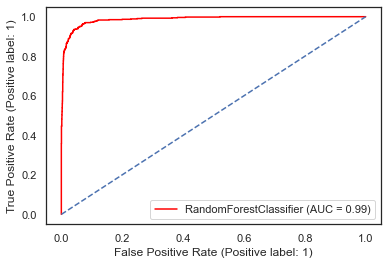

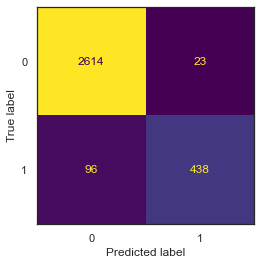

In [374]:
### Evaluation of test dataset
model_eval(RF5, X_test, y_test, RF5_ytest_pred, RF5_testprobs)

### Random Forest - Model 6

In [375]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid6, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [19, 20, 21], 'max_features': [16],
                         'min_samples_leaf': [2], 'min_samples_split': [6],
                         'n_estimators': [121, 151, 171]},
             scoring='f1')

In [376]:
grid_search.best_score_

0.814090850785092

In [377]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 171}

In [378]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=16, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=171, random_state=0)

In [379]:
RF6 = RandomForestClassifier(random_state=123,max_depth= 19, max_features= 16, min_samples_leaf= 2, min_samples_split= 6, n_estimators= 121)
RF6.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=16, min_samples_leaf=2,
                       min_samples_split=6, n_estimators=121, random_state=123)

In [380]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 171}

In [381]:
### Predicting on train and test dataset
RF6_ytrain_pred = RF6.predict(X_train)
RF6_ytest_pred = RF6.predict(X_test)

## Predicting probabilities on train dataset
RF6_trainprobs = RF6.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF6_trainprobs = RF6_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF6_testprobs = RF6.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF6_testprobs = RF6_testprobs[:, 1]

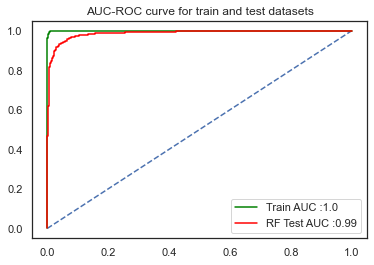

In [382]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF6_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF6_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF6_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF6_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [383]:
## Predicting probabilities on train dataset
RF6_trainprobs = RF6.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF6_trainprobs = RF6_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF6_testprobs = RF6.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF6_testprobs = RF6_testprobs[:, 1]

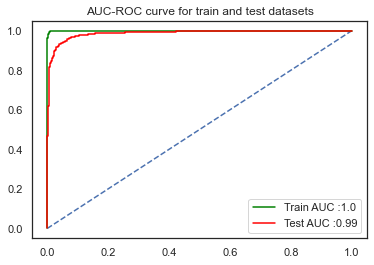

In [384]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF6_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF6_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF6_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF6_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9918907960535207
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6153
           1       1.00      0.96      0.98      1246

    accuracy                           0.99      7399
   macro avg       0.99      0.98      0.99      7399
weighted avg       0.99      0.99      0.99      7399

AUC: 1.000


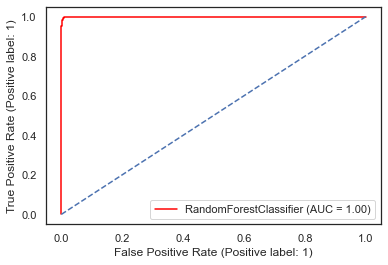

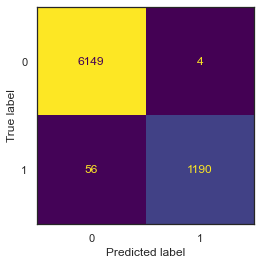

In [385]:
### Evaluation of training dataset
model_eval(RF6, X_train, y_train, RF6_ytrain_pred, RF6_trainprobs)

Accuracy :  0.9637338379060233
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2637
           1       0.95      0.83      0.88       534

    accuracy                           0.96      3171
   macro avg       0.96      0.91      0.93      3171
weighted avg       0.96      0.96      0.96      3171

AUC: 0.987


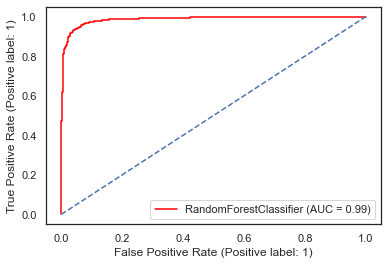

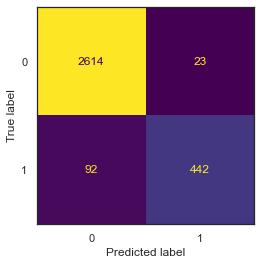

In [386]:
### Evaluation of test dataset
model_eval(RF6, X_test, y_test, RF6_ytest_pred, RF6_testprobs)

### Random Forest - Model 7

In [387]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid7, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [19, 20], 'max_features': [16, 17],
                         'min_samples_leaf': [2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [121]},
             scoring='f1')

In [388]:
grid_search.best_score_

0.8308329660877039

In [389]:
grid_search.best_params_

{'max_depth': 19,
 'max_features': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 121}

In [390]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=19, max_features=16, min_samples_leaf=2,
                       n_estimators=121, random_state=0)

In [391]:
RF7 = RandomForestClassifier(random_state=123,max_depth= 19, max_features= 17, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 121)
RF7.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=17, min_samples_leaf=2,
                       n_estimators=121, random_state=123)

In [392]:
grid_search.best_params_

{'max_depth': 19,
 'max_features': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 121}

In [393]:
### Predicting on train and test dataset
RF7_ytrain_pred = RF7.predict(X_train)
RF7_ytest_pred = RF7.predict(X_test)

## Predicting probabilities on train dataset
RF7_trainprobs = RF7.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF7_trainprobs = RF7_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF7_testprobs = RF7.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF7_testprobs = RF7_testprobs[:, 1]

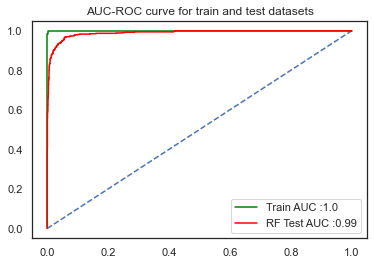

In [394]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF7_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF7_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF7_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF7_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [395]:
## Predicting probabilities on train dataset
RF7_trainprobs = RF7.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF7_trainprobs = RF7_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF7_testprobs = RF7.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF7_testprobs = RF7_testprobs[:, 1]

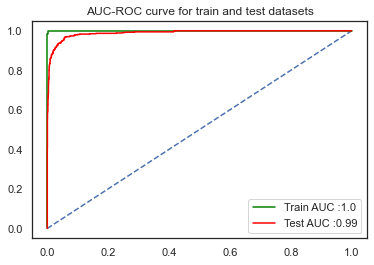

In [396]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF7_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF7_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF7_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF7_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9959453980267604
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      0.98      0.99      1246

    accuracy                           1.00      7399
   macro avg       1.00      0.99      0.99      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


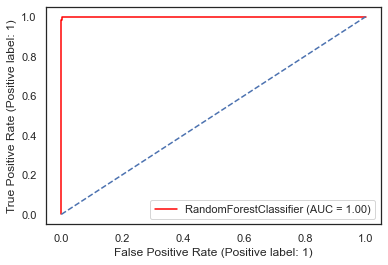

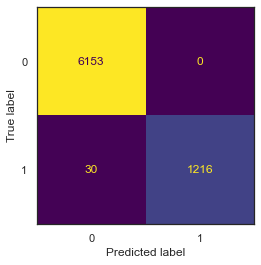

In [397]:
### Evaluation of training dataset
model_eval(RF7, X_train, y_train, RF7_ytrain_pred, RF7_trainprobs)

Accuracy :  0.9653106275622831
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2637
           1       0.95      0.84      0.89       534

    accuracy                           0.97      3171
   macro avg       0.96      0.91      0.93      3171
weighted avg       0.96      0.97      0.96      3171

AUC: 0.989


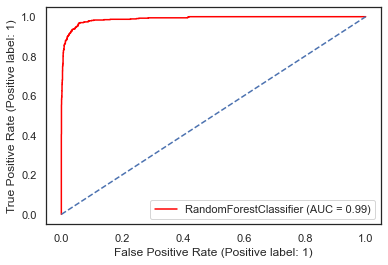

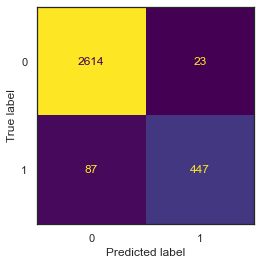

In [398]:
### Evaluation of test dataset
model_eval(RF7, X_test, y_test, RF7_ytest_pred, RF7_testprobs)

### Random Forest - Model 8

In [399]:
rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid8, cv = 5, scoring='f1')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [20, 21, 22],
                         'max_features': [16, 17, 18],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [121, 151]},
             scoring='f1')

In [400]:
grid_search.best_score_

0.8528860923933916

In [401]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 121}

In [402]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=17, n_estimators=121,
                       random_state=0)

In [403]:
RF8 = RandomForestClassifier(random_state=123,max_depth= 22, max_features= 16, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 151)
RF8.fit(X_train, y_train)

RandomForestClassifier(max_depth=22, max_features=16, n_estimators=151,
                       random_state=123)

In [404]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 121}

In [405]:
### Predicting on train and test dataset
RF8_ytrain_pred = RF8.predict(X_train)
RF8_ytest_pred = RF8.predict(X_test)

## Predicting probabilities on train dataset
RF8_trainprobs = RF8.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF8_trainprobs = RF8_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF8_testprobs = RF8.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF8_testprobs = RF8_testprobs[:, 1]

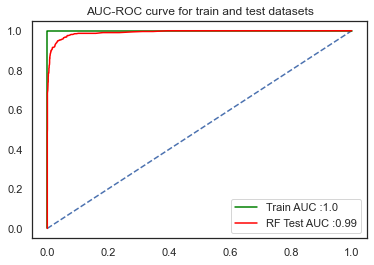

In [406]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF8_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF8_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF8_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF8_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

In [407]:
## Predicting probabilities on train dataset
RF8_trainprobs = RF8.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF8_trainprobs = RF8_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF8_testprobs = RF8.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF8_testprobs = RF8_testprobs[:, 1]

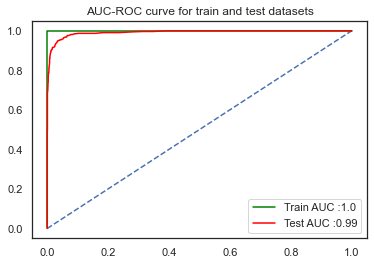

In [408]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF8_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF8_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF8_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF8_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


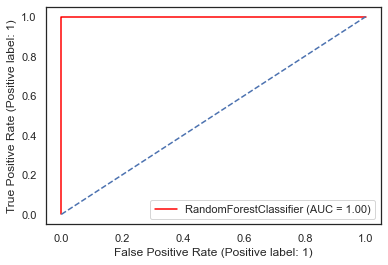

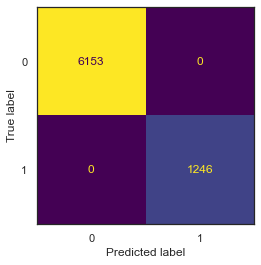

In [409]:
### Evaluation of training dataset
model_eval(RF8, X_train, y_train, RF8_ytrain_pred, RF8_trainprobs)

Accuracy :  0.9687795648060549
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2637
           1       0.96      0.85      0.90       534

    accuracy                           0.97      3171
   macro avg       0.96      0.92      0.94      3171
weighted avg       0.97      0.97      0.97      3171

AUC: 0.992


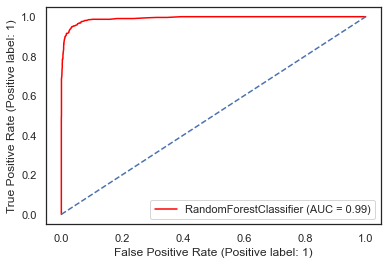

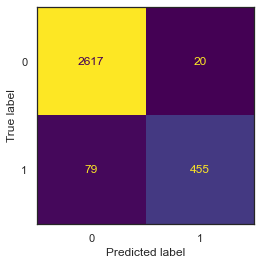

In [410]:
### Evaluation of test dataset
model_eval(RF8, X_test, y_test, RF8_ytest_pred, RF8_testprobs)

In [411]:
## 5-fold cross validation on full data
RF_cv = RandomForestClassifier(random_state=123,max_depth= 22, max_features= 16, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 151)
scores = cross_val_score(RF_cv, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.90690691, 0.91940299, 0.9352518 , 0.91631206, 0.85034965]),
 0.9056446795259848)

In [412]:
## 10-fold cross validation on full data
RF_cv = RandomForestClassifier(random_state=123,max_depth= 22, max_features= 16, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 151)
scores = cross_val_score(RF_cv, X, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.93913043, 0.95402299, 0.96551724, 0.91616766, 0.9271137 ,
        0.95184136, 0.93063584, 0.90857143, 0.89772727, 0.90697674]),
 0.9297704675370639)

In [413]:
imp_df = pd.DataFrame(RF8.feature_importances_, index=X.columns, columns=['Feature Importance'])
imp_df

Feature Importance
Tenure                             0.297540
City_Tier                          0.028955
CC_Contacted_LY                    0.065341
Service_Score                      0.015012
Account_user_count                 0.034769
account_segment                    0.034741
CC_Agent_Score                     0.061147
rev_per_month                      0.054342
Complain_ly                        0.055549
rev_growth_yoy                     0.057856
coupon_used_for_payment            0.023716
Day_Since_CC_connect               0.065616
cashback                           0.078610
Payment_Credit Card                0.017080
Payment_Debit Card                 0.013925
Payment_E wallet                   0.013042
Payment_UPI                        0.006053
Gender_Male                        0.015919
Marital_Status_Married             0.013062
Marital_Status_Single              0.025144
Login_device_Mobile                0.022579

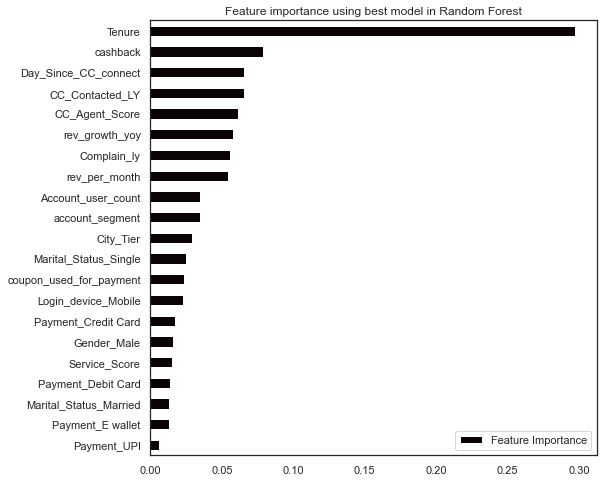

In [414]:
## plotting graph
imp_df = imp_df.sort_values(by='Feature Importance')
imp_df.plot(kind='barh', cmap='mako', figsize=(8,8))
plt.title("Feature importance using best model in Random Forest")
plt.show();

## Gradient Boosting

In [415]:
GB = GradientBoostingClassifier(n_estimators = 51,random_state=1)
GB = GB.fit(X_train, y_train)

In [416]:
### Predicting on train and test dataset
GB_ytrain_pred = GB.predict(X_train)
GB_ytest_pred = GB.predict(X_test)

## Predicting probabilities on train dataset
GB_trainprobs = GB.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB_trainprobs = GB_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB_testprobs = GB.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB_testprobs = GB_testprobs[:, 1]

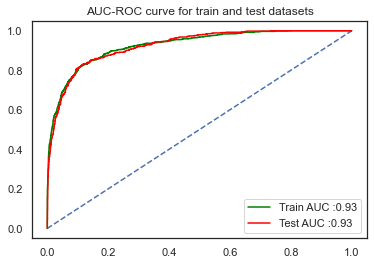

In [417]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, GB_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9085011488038924
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6153
           1       0.83      0.57      0.68      1246

    accuracy                           0.91      7399
   macro avg       0.88      0.77      0.81      7399
weighted avg       0.90      0.91      0.90      7399

AUC: 0.927


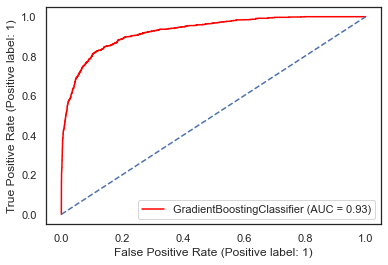

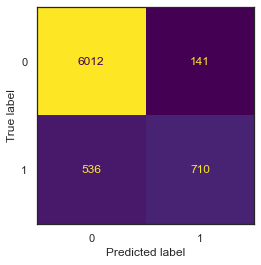

In [418]:
### Evaluation of training dataset
model_eval(GB, X_train, y_train, GB_ytrain_pred, GB_trainprobs)

Accuracy :  0.9016083254493851
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2637
           1       0.79      0.57      0.66       534

    accuracy                           0.90      3171
   macro avg       0.85      0.77      0.80      3171
weighted avg       0.90      0.90      0.90      3171

AUC: 0.925


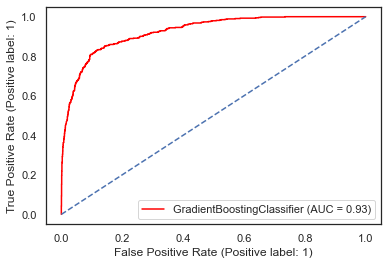

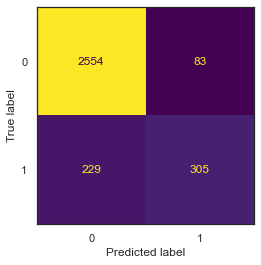

In [419]:
### Evaluation of test dataset
model_eval(GB, X_test, y_test, GB_ytest_pred, GB_testprobs)

### Hypertuning the model

In [420]:
param_grid1 = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.1,0.5],
    'n_estimators': [51,101,151],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_samples_split': [20,60,100],
    'min_samples_leaf': [2,6,10],
    'max_depth':[3,6,9],
    'max_features':[7,10]
}

param_grid2 = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.5],
    'n_estimators': [101],
    'criterion': ['mse'], #
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[10]
}

param_grid4 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [101,151,201],
    'criterion': ['mse'], 
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[10]
}

param_grid5 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [201,401,601],
    'criterion': ['mse'], 
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[10]
}

param_grid6 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [201],
    'criterion': ['mse'], 
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9,12,15],
    'max_features':[10,11,12]
}

param_grid7 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [201],
    'criterion': ['mse'], 
    'min_samples_split': [20,15],
    'min_samples_leaf': [4,6],
    'max_depth':[9,11],
    'max_features':[10,11]
}  

param_grid8 = {
    'loss': ['deviance'],  
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [201],
    'criterion': ['mse'], 
    'min_samples_split': [15],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[11]
}

### Gradient Boosting - Model 1

In [421]:
GB1 = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = GB1, param_grid = param_grid1, cv = 3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 6, 9], 'max_features': [7, 10],
                         'min_samples_leaf': [2, 6, 10],
                         'min_samples_split': [20, 60, 100],
                         'n_estimators': [51, 101, 151]},
             scoring='f1')

In [422]:
grid_search.best_score_

0.8771465279712704

In [423]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, loss='deviance',
                           max_depth=9, max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=151,
                           random_state=0)

In [424]:
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'n_estimators': 151}

In [425]:
GB1 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=7, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=101,
                           random_state=0)

In [426]:
GB1.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=7, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=101,
                           random_state=0)

In [427]:
### Predicting on train and test dataset
GB1_ytrain_pred = GB1.predict(X_train)
GB1_ytest_pred = GB1.predict(X_test)

## Predicting probabilities on train dataset
GB1_trainprobs = GB1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB1_trainprobs = GB1_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB1_testprobs = GB1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB1_testprobs = GB1_testprobs[:, 1]

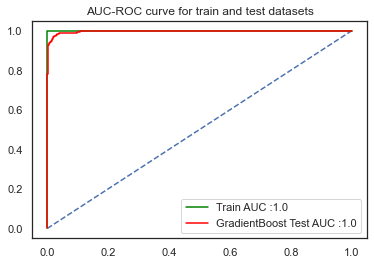

In [428]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB1_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


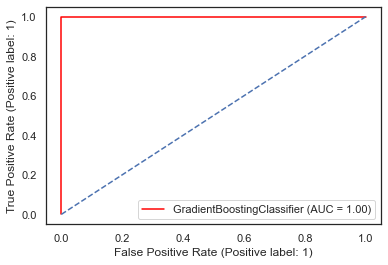

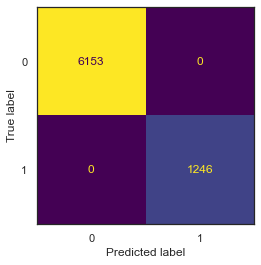

In [429]:
### Evaluation of training dataset
model_eval(GB1, X_train, y_train, GB1_ytrain_pred, GB1_trainprobs)

Accuracy :  0.9817092399873857
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2637
           1       0.98      0.91      0.94       534

    accuracy                           0.98      3171
   macro avg       0.98      0.95      0.97      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.997


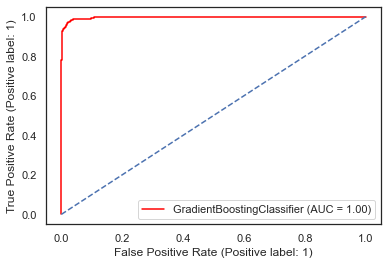

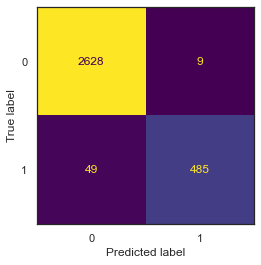

In [430]:
### Evaluation of test dataset
model_eval(GB1, X_test, y_test, GB1_ytest_pred, GB1_testprobs)

### Gradient Boosting - Model 2

In [431]:
GB2 = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = GB2, param_grid = param_grid2, cv = 3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.5],
                         'loss': ['deviance', 'exponential'], 'max_depth': [9],
                         'max_features': [10], 'min_samples_leaf': [6],
                         'min_samples_split': [20], 'n_estimators': [101]},
             scoring='f1')

In [432]:
grid_search.best_score_

0.8757035863608142

In [433]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, loss='deviance',
                           max_depth=9, max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=101,
                           random_state=0)

In [434]:
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'n_estimators': 101}

In [435]:
GB2 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=101,
                           random_state=0)

In [436]:
GB2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=101,
                           random_state=0)

In [437]:
### Predicting on train and test dataset
GB2_ytrain_pred = GB2.predict(X_train)
GB2_ytest_pred = GB2.predict(X_test)

## Predicting probabilities on train dataset
GB2_trainprobs = GB2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB2_trainprobs = GB2_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB2_testprobs = GB2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB2_testprobs = GB2_testprobs[:, 1]

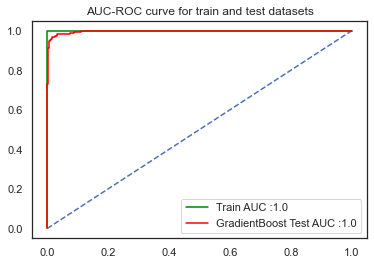

In [438]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB2_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


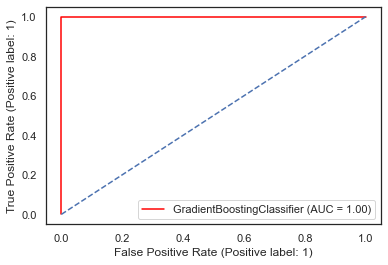

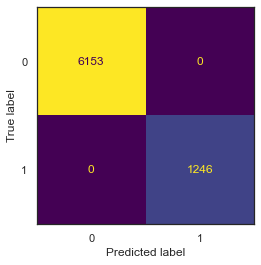

In [439]:
### Evaluation of training dataset
model_eval(GB2, X_train, y_train, GB2_ytrain_pred, GB2_trainprobs)

Accuracy :  0.9842321034374014
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2637
           1       0.98      0.93      0.95       534

    accuracy                           0.98      3171
   macro avg       0.98      0.96      0.97      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.997


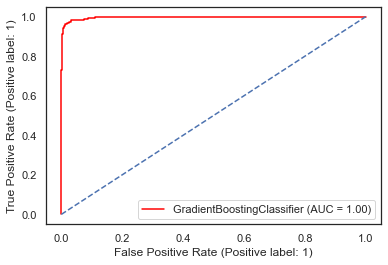

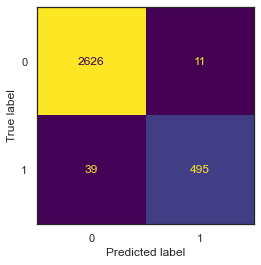

In [440]:
### Evaluation of test dataset
model_eval(GB2, X_test, y_test, GB2_ytest_pred, GB2_testprobs)

### Gradient Boosting - Model 3

In [441]:
GB4 = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = GB4, param_grid = param_grid4, cv = 3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.5],
                         'loss': ['deviance'], 'max_depth': [9],
                         'max_features': [10], 'min_samples_leaf': [6],
                         'min_samples_split': [20],
                         'n_estimators': [101, 151, 201]},
             scoring='f1')

In [442]:
grid_search.best_score_

0.8771465279712704

In [443]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, loss='deviance',
                           max_depth=9, max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=151,
                           random_state=0)

In [444]:
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'n_estimators': 151}

In [445]:
GB4 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=151,
                           random_state=0)

In [446]:
GB4.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=151,
                           random_state=0)

In [447]:
### Predicting on train and test dataset
GB4_ytrain_pred = GB4.predict(X_train)
GB4_ytest_pred = GB4.predict(X_test)

## Predicting probabilities on train dataset
GB4_trainprobs = GB4.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB4_trainprobs = GB4_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB4_testprobs = GB4.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB4_testprobs = GB4_testprobs[:, 1]

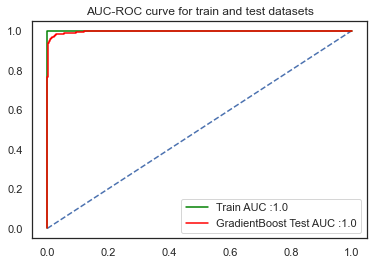

In [448]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB4_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB4_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB4_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB4_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


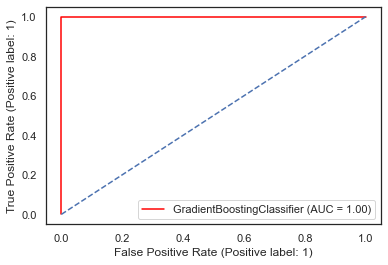

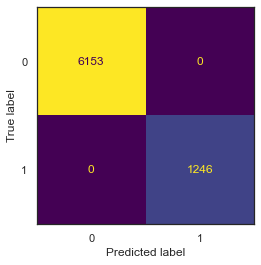

In [449]:
### Evaluation of training dataset
model_eval(GB4, X_train, y_train, GB4_ytrain_pred, GB4_trainprobs)

Accuracy :  0.9851781772311574
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2637
           1       0.98      0.93      0.95       534

    accuracy                           0.99      3171
   macro avg       0.98      0.96      0.97      3171
weighted avg       0.99      0.99      0.99      3171

AUC: 0.997


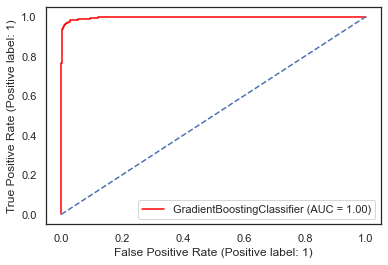

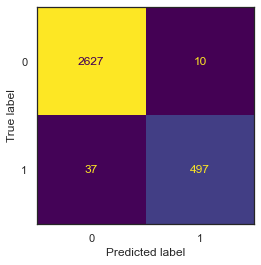

In [450]:
### Evaluation of test dataset
model_eval(GB4, X_test, y_test, GB4_ytest_pred, GB4_testprobs)

### Gradient Boosting - Model 4

In [451]:
GB5 = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = GB5, param_grid = param_grid5, cv = 3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.5],
                         'loss': ['deviance'], 'max_depth': [9],
                         'max_features': [10], 'min_samples_leaf': [6],
                         'min_samples_split': [20],
                         'n_estimators': [201, 401, 601]},
             scoring='f1')

In [452]:
grid_search.best_score_

0.8771465279712704

In [453]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, loss='deviance',
                           max_depth=9, max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [454]:
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'n_estimators': 201}

In [455]:
GB5 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [456]:
GB5.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [457]:
### Predicting on train and test dataset
GB5_ytrain_pred = GB5.predict(X_train)
GB5_ytest_pred = GB5.predict(X_test)

## Predicting probabilities on train dataset
GB5_trainprobs = GB5.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB5_trainprobs = GB5_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB5_testprobs = GB5.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB5_testprobs = GB5_testprobs[:, 1]

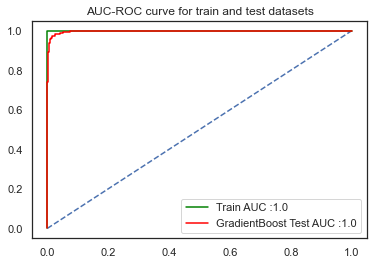

In [458]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB5_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB5_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB5_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB5_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


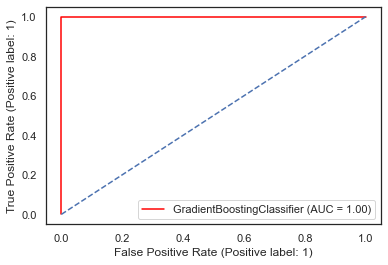

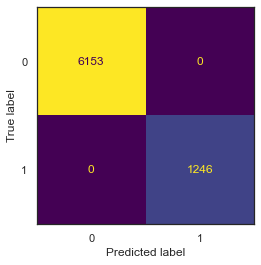

In [459]:
### Evaluation of training dataset
model_eval(GB5, X_train, y_train, GB5_ytrain_pred, GB5_trainprobs)

Accuracy :  0.9820245979186376
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2637
           1       0.97      0.92      0.95       534

    accuracy                           0.98      3171
   macro avg       0.98      0.96      0.97      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.998


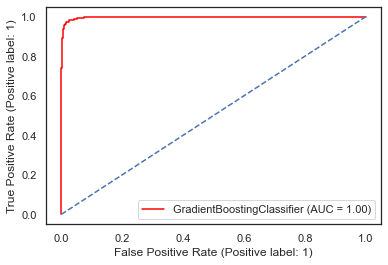

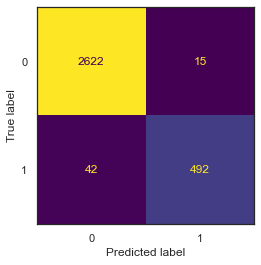

In [460]:
### Evaluation of test dataset
model_eval(GB5, X_test, y_test, GB5_ytest_pred, GB5_testprobs)

### Gradient Boosting - Model 5

In [461]:
GB6 = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = GB6, param_grid = param_grid6, cv = 3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.5],
                         'loss': ['deviance'], 'max_depth': [9, 12, 15],
                         'max_features': [10, 11, 12], 'min_samples_leaf': [6],
                         'min_samples_split': [20], 'n_estimators': [201]},
             scoring='f1')

In [462]:
grid_search.best_score_

0.8771465279712704

In [463]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, loss='deviance',
                           max_depth=9, max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [464]:
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'n_estimators': 201}

In [465]:
GB6 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=12, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [466]:
GB6.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=12, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [467]:
### Predicting on train and test dataset
GB6_ytrain_pred = GB6.predict(X_train)
GB6_ytest_pred = GB6.predict(X_test)

## Predicting probabilities on train dataset
GB6_trainprobs = GB6.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB6_trainprobs = GB6_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB6_testprobs = GB6.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB6_testprobs = GB6_testprobs[:, 1]

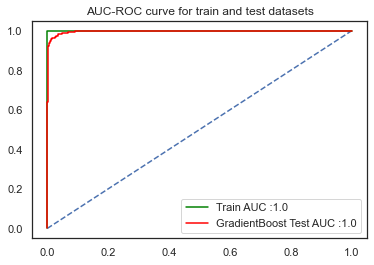

In [468]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB6_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB6_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB6_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB6_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


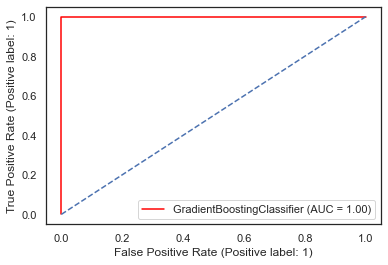

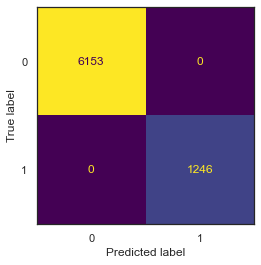

In [469]:
### Evaluation of training dataset
model_eval(GB6, X_train, y_train, GB6_ytrain_pred, GB6_trainprobs)

Accuracy :  0.9836013875748975
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2637
           1       0.98      0.92      0.95       534

    accuracy                           0.98      3171
   macro avg       0.98      0.96      0.97      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.997


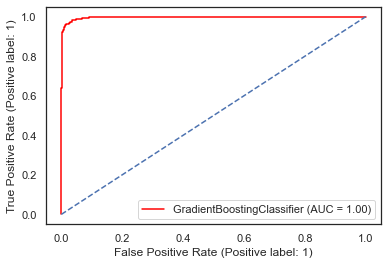

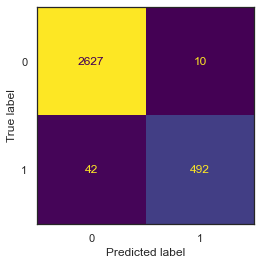

In [470]:
### Evaluation of test dataset
model_eval(GB6, X_test, y_test, GB6_ytest_pred, GB6_testprobs)

### Gradient Boosting - Model 6

In [471]:
GB7 = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = GB7, param_grid = param_grid7, cv = 3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.5],
                         'loss': ['deviance'], 'max_depth': [9, 11],
                         'max_features': [10, 11], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [20, 15], 'n_estimators': [201]},
             scoring='f1')

In [472]:
grid_search.best_score_

0.8771465279712704

In [473]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, loss='deviance',
                           max_depth=9, max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [474]:
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'n_estimators': 201}

In [475]:
GB7 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=11,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [476]:
GB7.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=11,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=201,
                           random_state=0)

In [477]:
### Predicting on train and test dataset
GB7_ytrain_pred = GB7.predict(X_train)
GB7_ytest_pred = GB7.predict(X_test)

## Predicting probabilities on train dataset
GB7_trainprobs = GB7.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB7_trainprobs = GB7_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB7_testprobs = GB7.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB7_testprobs = GB7_testprobs[:, 1]

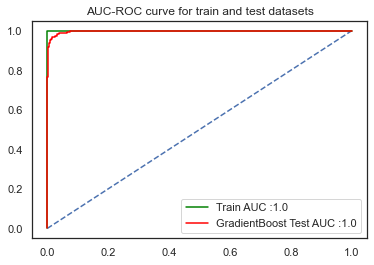

In [478]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB7_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB7_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB7_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB7_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


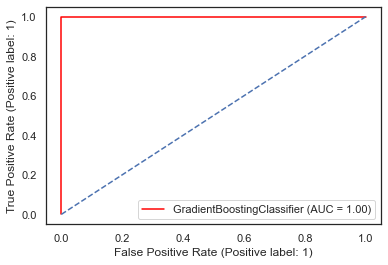

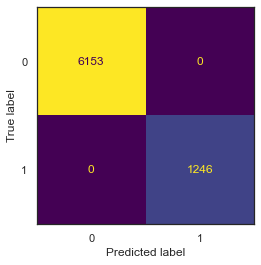

In [479]:
### Evaluation of training dataset
model_eval(GB7, X_train, y_train, GB7_ytrain_pred, GB7_trainprobs)

Accuracy :  0.9832860296436455
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2637
           1       0.98      0.92      0.95       534

    accuracy                           0.98      3171
   macro avg       0.98      0.96      0.97      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.998


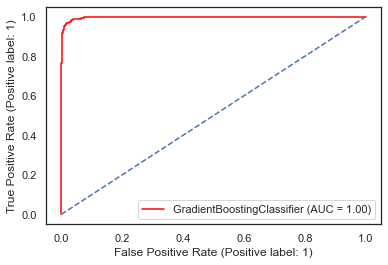

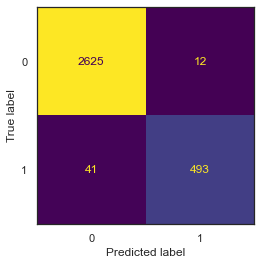

In [480]:
### Evaluation of test dataset
model_eval(GB7, X_test, y_test, GB7_ytest_pred, GB7_testprobs)

### Gradient Boosting - Model 7

In [481]:
GB8 = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(estimator = GB8, param_grid = param_grid8, cv = 3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1, 0.5, 1],
                         'loss': ['deviance'], 'max_depth': [9],
                         'max_features': [11], 'min_samples_leaf': [6],
                         'min_samples_split': [15], 'n_estimators': [201]},
             scoring='f1')

In [482]:
grid_search.best_score_

0.8647687012855552

In [483]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='mse', loss='deviance', max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)

In [484]:
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 9,
 'max_features': 11,
 'min_samples_leaf': 6,
 'min_samples_split': 15,
 'n_estimators': 201}

In [485]:
GB8 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)

In [486]:
GB8.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)

In [487]:
### Predicting on train and test dataset
GB8_ytrain_pred = GB8.predict(X_train)
GB8_ytest_pred = GB8.predict(X_test)

## Predicting probabilities on train dataset
GB8_trainprobs = GB8.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB8_trainprobs = GB8_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB8_testprobs = GB8.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB8_testprobs = GB8_testprobs[:, 1]

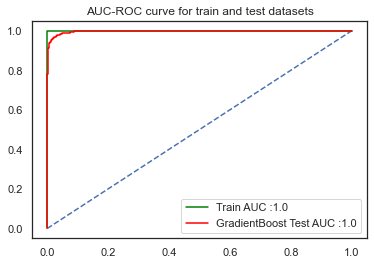

In [488]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB8_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB8_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB8_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB8_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6153
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      7399
   macro avg       1.00      1.00      1.00      7399
weighted avg       1.00      1.00      1.00      7399

AUC: 1.000


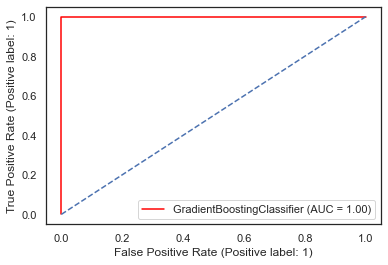

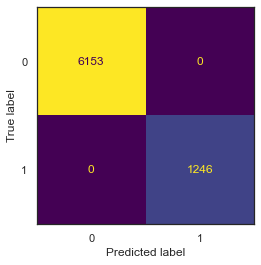

In [489]:
### Evaluation of training dataset
model_eval(GB8, X_train, y_train, GB8_ytrain_pred, GB8_trainprobs)

Accuracy :  0.9810785241248817
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2637
           1       0.98      0.91      0.94       534

    accuracy                           0.98      3171
   macro avg       0.98      0.95      0.97      3171
weighted avg       0.98      0.98      0.98      3171

AUC: 0.997


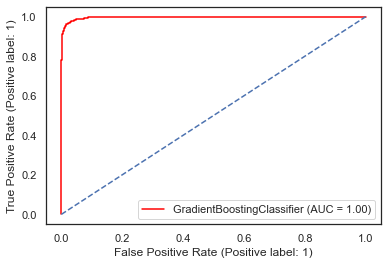

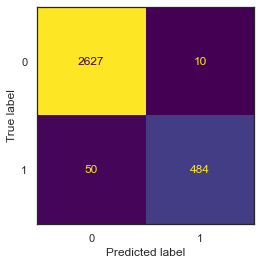

In [490]:
### Evaluation of test dataset
model_eval(GB8, X_test, y_test, GB8_ytest_pred, GB8_testprobs)

#### Cross validating on entire dataset to verify the scores

In [501]:
##5-fold cross validation on full data
GB_cv = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=151,
                           random_state=0)
scores = cross_val_score(GB_cv, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.9394387 , 0.94736842, 0.97428571, 0.96115108, 0.89665211]),
 0.9437792050497313)

In [502]:
## 10-fold cross validation on full data
GB_cv = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=10, min_samples_leaf=6,
                           min_samples_split=20, n_estimators=151,
                           random_state=0)
scores = cross_val_score(GB_cv, X, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.97421203, 0.97421203, 0.97701149, 0.94736842, 0.95930233,
        0.98016997, 0.96571429, 0.94767442, 0.95428571, 0.95953757]),
 0.9639488272185183)

In [493]:
GB_importance = pd.DataFrame(GB4.feature_importances_, index=X.columns, columns=['importance'])
GB_importance.sort_values('importance', axis=0, ascending=False, inplace=True)
GB_importance

importance
Tenure                     0.277573
account_segment            0.070482
Complain_ly                0.065553
Day_Since_CC_connect       0.061621
CC_Contacted_LY            0.061232
rev_growth_yoy             0.057713
CC_Agent_Score             0.057630
cashback                   0.055381
rev_per_month              0.054191
City_Tier                  0.035733
Account_user_count         0.033901
Login_device_Mobile        0.026697
Marital_Status_Single      0.025183
Gender_Male                0.021796
Payment_Credit Card        0.020110
coupon_used_for_payment    0.017183
Marital_Status_Married     0.014897
Payment_Debit Card         0.014814
Service_Score              0.013672
Payment_E wallet           0.010198
Payment_UPI                0.004437

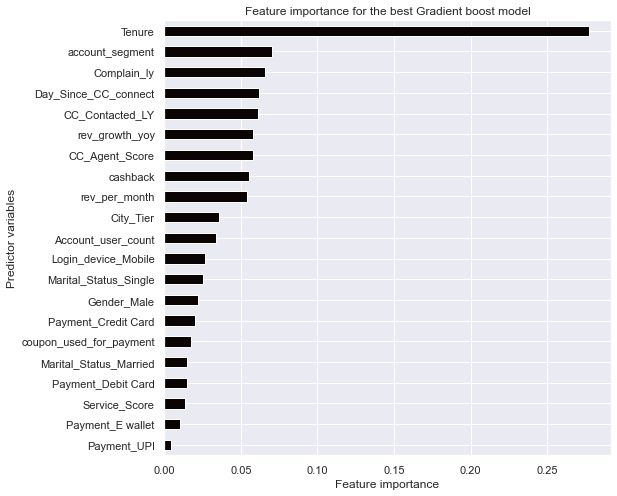

In [494]:
## plotting graph
sns.set()
GB_importance = GB_importance.sort_values(by='importance')
GB_importance.plot(kind='barh', cmap = 'mako', figsize=(8,8), legend=None)
plt.title("Feature importance for the best Gradient boost model")
plt.xlabel("Feature importance")
plt.ylabel("Predictor variables")
plt.show();

### To Be Continued on 2nd Notebook